In [18]:
import numpy as np
import matplotlib.pyplot as plt
from gridworld_env import get_task1_gridworld, get_task2_gridworld, get_task3_gridworld
from utils import paint_gridworld

## A Look Around GridWorld

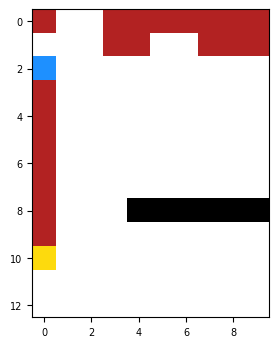

In [19]:
# Initiating the Environment. The method get_task1_gridworld
# initialises the environment for the task 1. Similarly there are methods to initialise the environment 
# for the other tasks
env1 = get_task1_gridworld()

# This is how the environment looks like
paint_gridworld(env1, figsize=(4,4), ticksize=7)

## Example of running a simulation

In [20]:
reward_lst = []

# Initialise the environment
# An arbitary gamma value is used here. You may need to change this!
env1 = get_task1_gridworld()

# Reset the environment to start from the starting location. 
# The reset() method returns the state, reward, and whether the episode is done or not
# More information can be found under the definition of the method
_, state, reward, done = env1.reset()
reward_lst.append(reward)

# While the trial is not done, i.e. the agent has not fallen into lava,
# the maximum length of the episode has not been exceeded, and the target has not been reached
while not done:
    
    # Take a step using the step() function and passing in one of the available actions [0, 1, 2, 3] 
    # corresponding to ['N', 'S', 'E', 'W']
    # More information can be found under the definition of the method
    # In this very simple example for each step we choose a random action
    _, state, reward, done = env1.step(np.random.choice(4))
    reward_lst.append(reward)

print(f'Collected rewards of an episode: {reward_lst}')

Collected rewards of an episode: [0, -10.0]


## Q-Algorithm with Epsilon-Greedy

In [132]:
class Q_agent():
    def __init__(self):
        self.q_table = None

    def solve(self, env, n_episodes, gamma, alpha, epsilon):
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        
        # Initialize Q-table with zeros
        self.q_table = np.zeros((state_size, action_size))
        
        total_rewards = []
        total_steps = []
        episode_sequences = []
        
        for episode in range(n_episodes):
            state = env.reset()[1]
            total_reward = 0
            steps = 0
            sequence = [(state, self.choose_action(state, epsilon))]
            
            while True:
                action = self.choose_action(state, epsilon)
                t, next_state, reward, done = env.step(action)
                
                q_current = self.q_table[state, action]
                q_next = np.max(self.q_table[next_state])
                self.q_table[state, action] = q_current + alpha * (reward + gamma * q_next - q_current)
                
                state = next_state
                sequence.append((state, action))
                total_reward += reward
                steps += 1
                
                if done:
                    break
            
            total_rewards.append(total_reward)
            total_steps.append(steps)
            episode_sequences.append(sequence)
        
        policy = np.argmax(self.q_table, axis=1)
        return policy, total_rewards, total_steps, episode_sequences

    def choose_action(self, state, epsilon):
        if np.random.uniform(0, 1) < epsilon:
            return np.random.choice(4)
        else:
            return np.argmax(self.q_table[state])

## SARSA Algorithm with Epsilon-Greedy

In [22]:
class SARSA_agent():
    def __init__(self):
        self.q_table = None

    def solve(self, env, n_episodes, gamma, alpha, epsilon):
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        
        # Initialize Q-table with zeros
        self.q_table = np.zeros((state_size, action_size))
        
        total_rewards = []
        total_steps = []
        episode_sequences = []
        
        for episode in range(n_episodes):
            state = env.reset()[1]
            action = self.choose_action(state, epsilon)
            total_reward = 0
            steps = 0
            sequence = [(state, action)]
            
            while True:
                t, next_state, reward, done = env.step(action)
                next_action = self.choose_action(next_state, epsilon)
                
                q_current = self.q_table[state, action]
                q_next = self.q_table[next_state, next_action]
                self.q_table[state, action] = q_current + alpha * (reward + gamma * q_next - q_current)
                
                state, action = next_state, next_action
                sequence.append((state, action))
                total_reward += reward
                steps += 1
                
                if done:
                    break
            
            total_rewards.append(total_reward)
            total_steps.append(steps)
            episode_sequences.append(sequence)
        
        policy = np.argmax(self.q_table, axis=1)
        return policy, total_rewards, total_steps, episode_sequences

    def choose_action(self, state, epsilon):
        if np.random.uniform(0, 1) < epsilon:
            return np.random.choice(4)
        else:
            return np.argmax(self.q_table[state])

## Q-Algorithm with SoftMax

In [109]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return e_x / e_x.sum(axis=0)

class Q_agent():
    def __init__(self):
        self.q_table = None

    def solve(self, env, n_episodes=500, gamma=0.3, alpha=0.7, tau=1.0):
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        
        # Initialize Q-table with zeros
        self.q_table = np.zeros((state_size, action_size))
        
        total_rewards = []
        total_steps = []
        episode_sequences = []
        
        for episode in range(n_episodes):
            state = env.reset()[1]
            total_reward = 0
            steps = 0
            sequence = [(state, self.choose_action(state, tau))]
            
            while True:
                action = self.choose_action(state, tau)
                t, next_state, reward, done = env.step(action)
                
                q_current = self.q_table[state, action]
                q_next = np.max(self.q_table[next_state])
                self.q_table[state, action] = q_current + alpha * (reward + gamma * q_next - q_current)
                
                state = next_state
                sequence.append((state, action))
                total_reward += reward
                steps += 1
                
                if done:
                    break
            
            total_rewards.append(total_reward)
            total_steps.append(steps)
            episode_sequences.append(sequence)
        
        policy = np.argmax(self.q_table, axis=1)
        return policy, total_rewards, total_steps, episode_sequences

    def choose_action(self, state, tau):
        action_probabilities = softmax(self.q_table[state] / tau)
        return np.random.choice(len(action_probabilities), p=action_probabilities)

## SARSA Algorithm with SoftMax

In [110]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return e_x / e_x.sum(axis=0)

class SARSA_agent():
    def __init__(self):
        self.q_table = None

    def solve(self, env, n_episodes=500, gamma=0.7, alpha=0.1, tau=1.0):
        state_size = env.get_state_size()
        action_size = env.get_action_size()
        
        # Initialize Q-table with zeros
        self.q_table = np.zeros((state_size, action_size))
        
        total_rewards = []
        total_steps = []
        episode_sequences = []
        
        for episode in range(n_episodes):
            state = env.reset()[1]
            action = self.choose_action(state, tau)
            total_reward = 0
            steps = 0
            sequence = [(state, action)]
            
            while True:
                t, next_state, reward, done = env.step(action)
                next_action = self.choose_action(next_state, tau)
                
                q_current = self.q_table[state, action]
                q_next = self.q_table[next_state, next_action]
                self.q_table[state, action] = q_current + alpha * (reward + gamma * q_next - q_current)
                
                state, action = next_state, next_action
                sequence.append((state, action))
                total_reward += reward
                steps += 1
                
                if done:
                    break
            
            total_rewards.append(total_reward)
            total_steps.append(steps)
            episode_sequences.append(sequence)
        
        policy = np.argmax(self.q_table, axis=1)
        return policy, total_rewards, total_steps, episode_sequences

    def choose_action(self, state, tau):
        action_probabilities = softmax(self.q_table[state] / tau)
        return np.random.choice(len(action_probabilities), p=action_probabilities)

## Tuning Hyperparameters 

In [111]:
def tune_hyperparameters(agent_class, env, n_episodes, gamma_values, alpha_values, tau_values):
    best_params = None
    best_performance = float('-inf')
    performances = []
    
    for gamma in gamma_values:
        for alpha in alpha_values:
            for tau in tau_values:
                agent = agent_class()
                policy, rewards, steps, episode_sequences = agent.solve(env, n_episodes, gamma, alpha, tau)
                success_count = sum(1 for reward in rewards if reward > 20)  # Count successful episodes
                performances.append((gamma, alpha, tau, rewards, steps, success_count))
                if success_count > best_performance:
                    best_performance = success_count
                    best_params = (gamma, alpha, tau)
                    
    return best_params, performances



## Plotting Learning Curves

In [112]:
def plot_learning_curves(performances, algorithm_name):
    for gamma, alpha, tau, rewards, steps, _ in performances:
        # Calculate the cumulative sum of rewards and steps
        cumulative_rewards = np.cumsum(rewards)
        cumulative_steps = np.cumsum(steps)
        ratio = cumulative_rewards / cumulative_steps
        
        # Plot the learning curve
        plt.figure(figsize=(12, 6))
        plt.plot(ratio, label=f'{algorithm_name}')
        plt.xlabel('Episodes')
        plt.ylabel('Cumulative Reward / Cumulative Steps')
        plt.title(f'Learning Curve: {algorithm_name} - gamma={gamma}, alpha={alpha}, tau={tau}')
        plt.legend()
        plt.show()


## Time to Converge Function

In [113]:
# Time to converge
def time_to_converge(rewards, threshold=0.95):
    cumulative_rewards = np.cumsum(rewards)
    target_reward = threshold * np.sum(rewards)
    for episode, cumulative_reward in enumerate(cumulative_rewards):
        if cumulative_reward >= target_reward:
            return episode + 1
    return len(rewards)

## Plotting Success Rates

In [114]:
def plot_success_table(performances, algorithm_name):
    intervals = ['0-25%', '25-50%', '50-75%', '75-100%', 'Overall']
    table_data = []

    for gamma, alpha, tau, rewards, steps, _ in performances:
        success_rates = []
        episode_count = len(rewards)
        interval_size = episode_count // 4
        
        for i in range(4):
            start = i * interval_size
            end = (i + 1) * interval_size if i < 3 else episode_count
            success_rate = sum(1 for reward in rewards[start:end] if reward > 0) / (end - start)
            success_rates.append(success_rate)
        
        overall_success_rate = sum(1 for reward in rewards if reward > 0) / episode_count
        success_rates.append(overall_success_rate)
        
        table_data.append([gamma, alpha, tau] + success_rates)
    
    # Sort table data by overall success rate
    table_data.sort(key=lambda x: x[-1], reverse=True)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=table_data, colLabels=['Gamma', 'Alpha', 'Tau'] + intervals, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    
    plt.title(f'Success Rates: {algorithm_name}')
    plt.show()

## Plotting Episode Sequences

In [115]:
def plot_episode_sequence(env, sequence, episode_num):
    grid_shape = env.get_gridshape()
    directions = ['↑', '→', '↓', '←']
    
    plt.figure(figsize=(10, 10))
    plt.imshow(np.ones(grid_shape), cmap='gray_r', extent=[0, grid_shape[1], grid_shape[0], 0])
    
    # Draw the environment features
    lava_locs = env.get_lava_loc()
    for lava in lava_locs:
        plt.gca().add_patch(plt.Rectangle((lava[1], lava[0]), 1, 1, color='red'))
    
    goal_locs = env.get_goal_loc()
    for goal in goal_locs:
        plt.gca().add_patch(plt.Rectangle((goal[1], goal[0]), 1, 1, color='blue'))
    
    start_loc = env.get_starting_loc()
    plt.gca().add_patch(plt.Rectangle((start_loc[1], start_loc[0]), 1, 1, color='yellow'))
    
    walls = env.get_walls_loc()
    for wall in walls:
        plt.gca().add_patch(plt.Rectangle((wall[1], wall[0]), 1, 1, color='black'))
    
    # Draw the path
    for i in range(len(sequence) - 1):
        state, action = sequence[i]
        next_state, next_action = sequence[i + 1]
        loc = env.get_loc_from_state(state)
        next_loc = env.get_loc_from_state(next_state)
        
        # Draw the arrow
        plt.text(loc[1] + 0.5, loc[0] + 0.5, directions[action], ha='center', va='center', color='black', fontsize=15)
        
        # Draw the connecting line
        plt.plot([loc[1] + 0.5, next_loc[1] + 0.5], [loc[0] + 0.5, next_loc[0] + 0.5], 'k-', lw=2)
    
    # Draw the final state action
    final_state, final_action = sequence[-1]
    final_loc = env.get_loc_from_state(final_state)
    plt.text(final_loc[1] + 0.5, final_loc[0] + 0.5, directions[final_action], ha='center', va='center', color='black', fontsize=15)
    
    plt.title(f'Episode {episode_num}')
    plt.gca().invert_yaxis()
    plt.show()

## Task 1 - Single Target, Deterministic Rewards:

In [127]:
# Hyperparameters
n_episodes = 500
gamma_values = [0.7, 0.9]
alpha_values = [0.7, 0.9]
tau_values = [0.1, 0.3, 0.5, 0.7, 0.9]

In [128]:
env1 = get_task1_gridworld()

## SARSA

In [37]:
# Tune hyperparameters for SARSA
best_params_sarsa, performances_sarsa = tune_hyperparameters(SARSA_agent, env1, n_episodes, gamma_values, alpha_values, tau_values)
print(f'Best parameters for SARSA: gamma={best_params_sarsa[0]}, alpha={best_params_sarsa[1]}, tau={best_params_sarsa[2]}')

# Plot learning curves for SARSA
plot_learning_curves(performances_sarsa, 'SARSA')

# Initialize agents with best parameters
sarsa_agent = SARSA_agent()
policy_sarsa, rewards_sarsa, steps_sarsa, episode_sequences_sarsa = sarsa_agent.solve(env1, n_episodes, *best_params_sarsa)

# Average rewards
average_rewards_sarsa = np.average(rewards_sarsa)
print(f'Average rewards for SARSA: {average_rewards_sarsa}')

# Time to converge
convergence_sarsa = time_to_converge(rewards_sarsa)
print(f'Time to converge for SARSA: {convergence_sarsa} episodes')

# Stability
stability_sarsa = np.var(rewards_sarsa[-100:])  # Variance of the last 100 episodes
print(f'Stability for SARSA: {stability_sarsa}')



KeyboardInterrupt: 

## SARSA episode sequences

Sarsa Episode 0


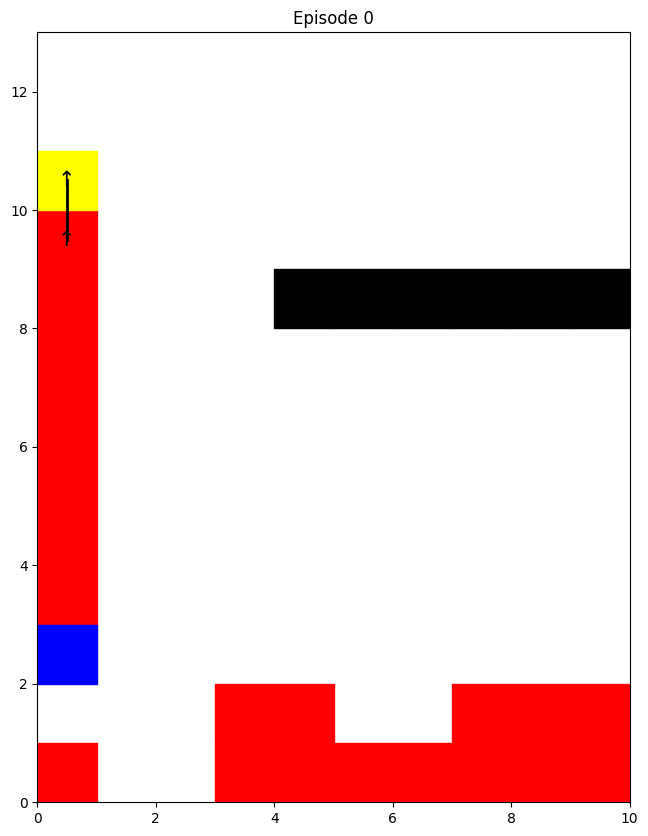

Sarsa Episode 40


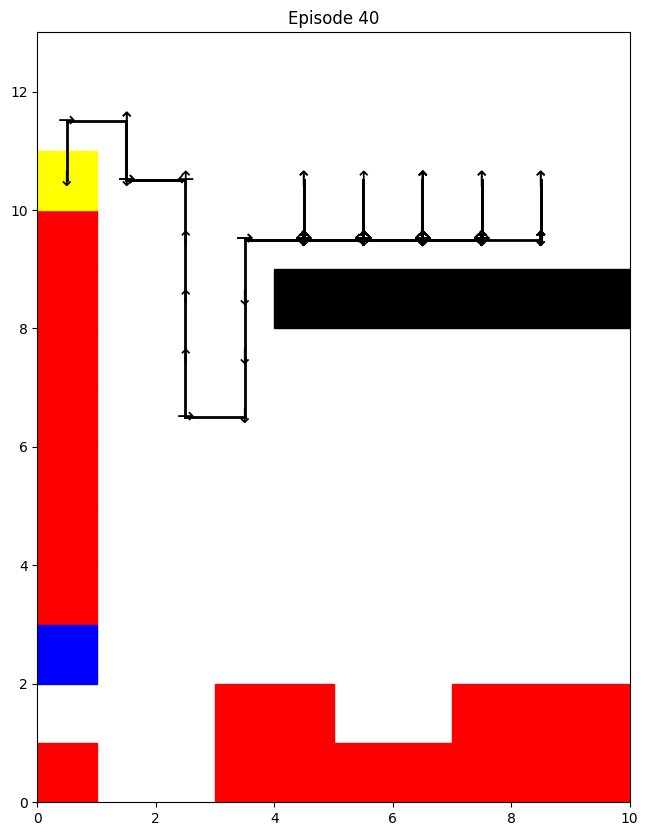

Sarsa Episode 80


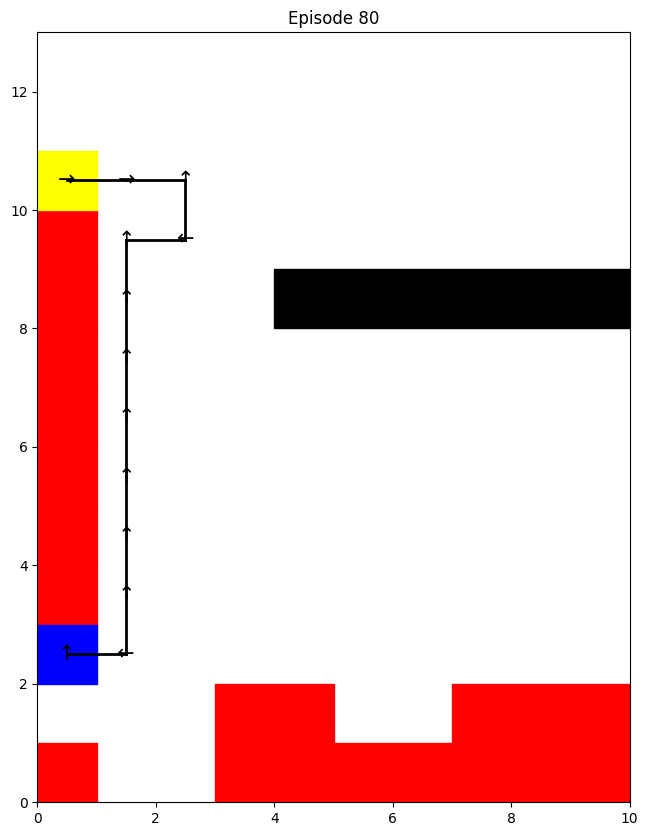

Sarsa Episode 120


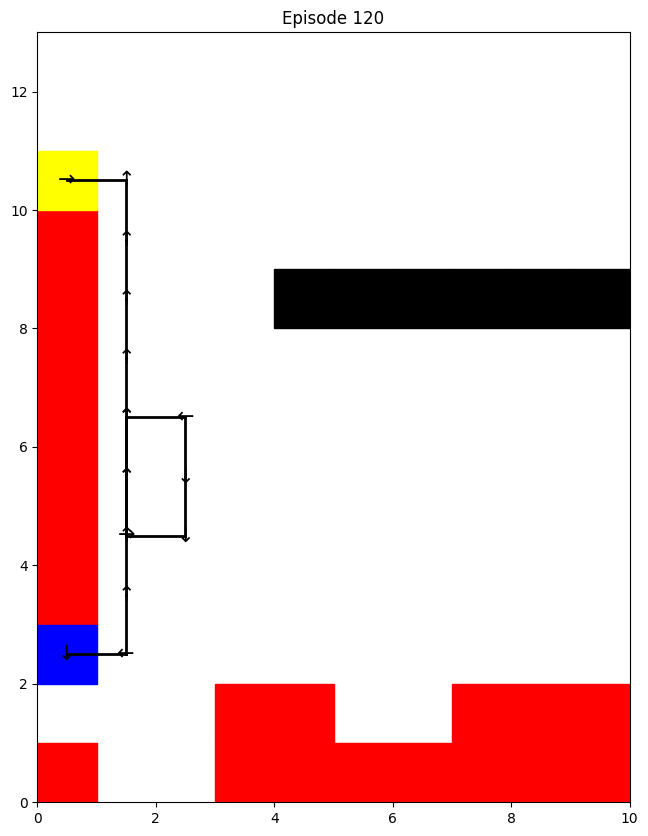

Sarsa Episode 160


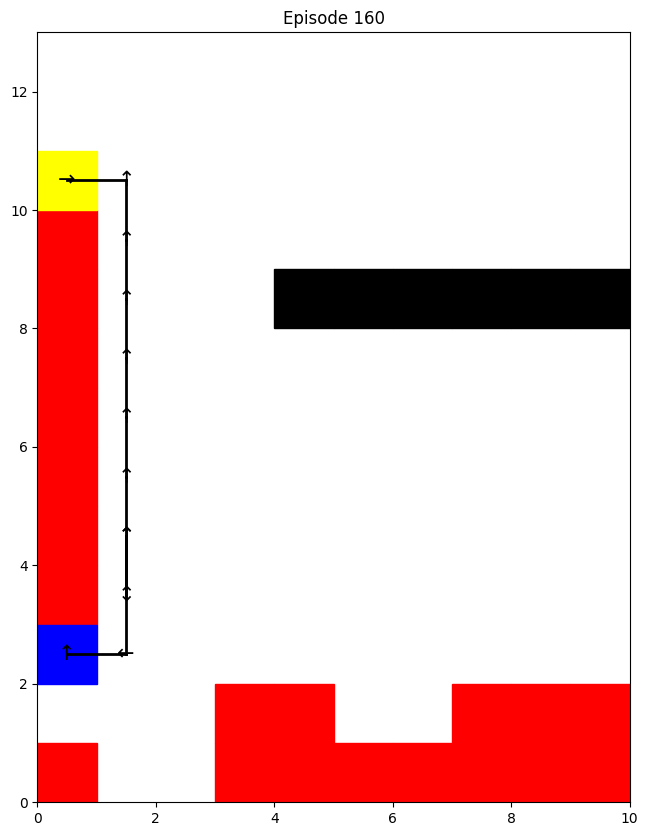

Sarsa Episode 200


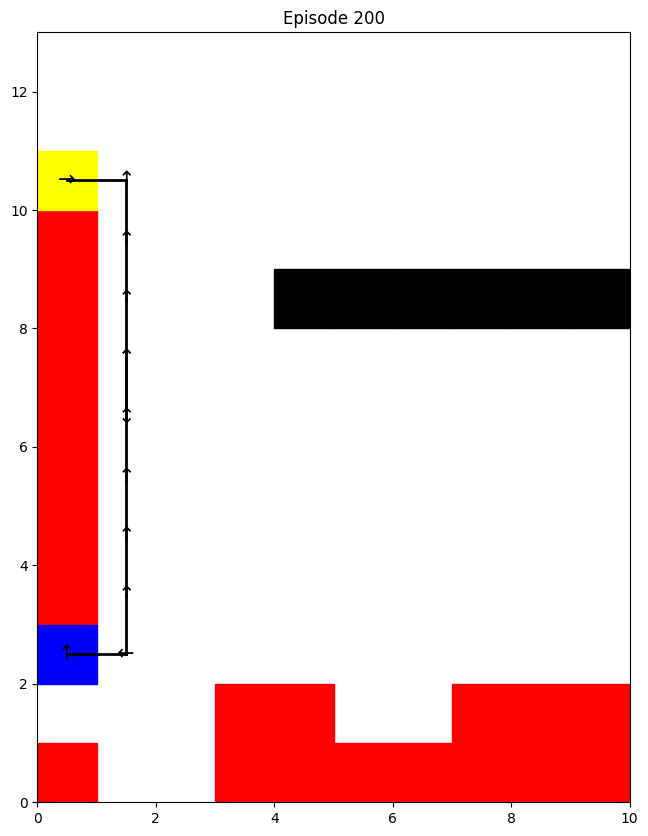

Sarsa Episode 240


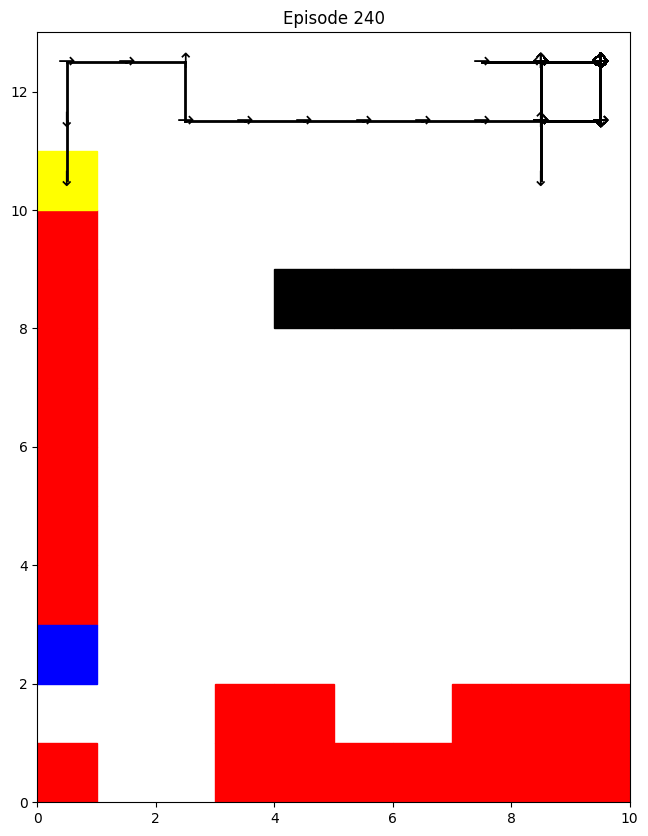

Sarsa Episode 280


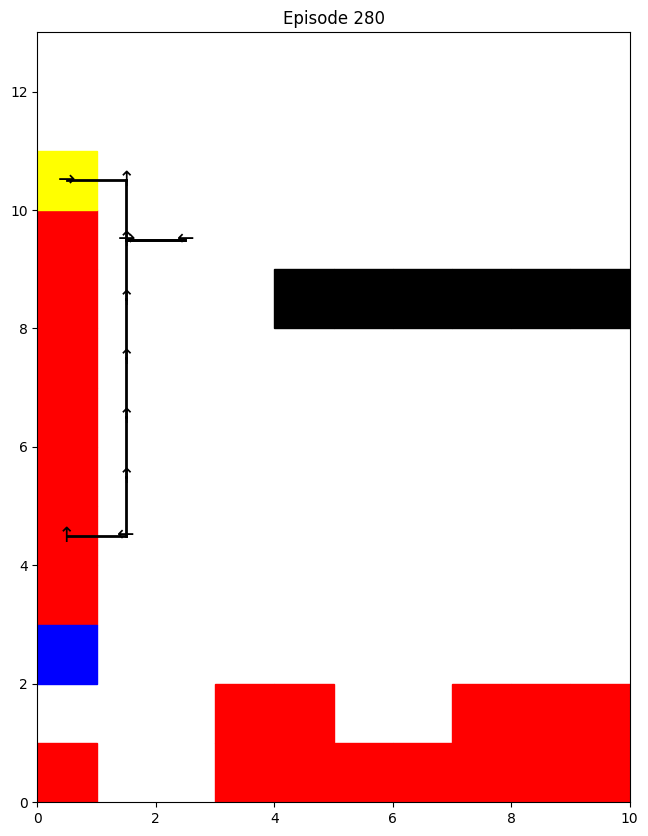

Sarsa Episode 320


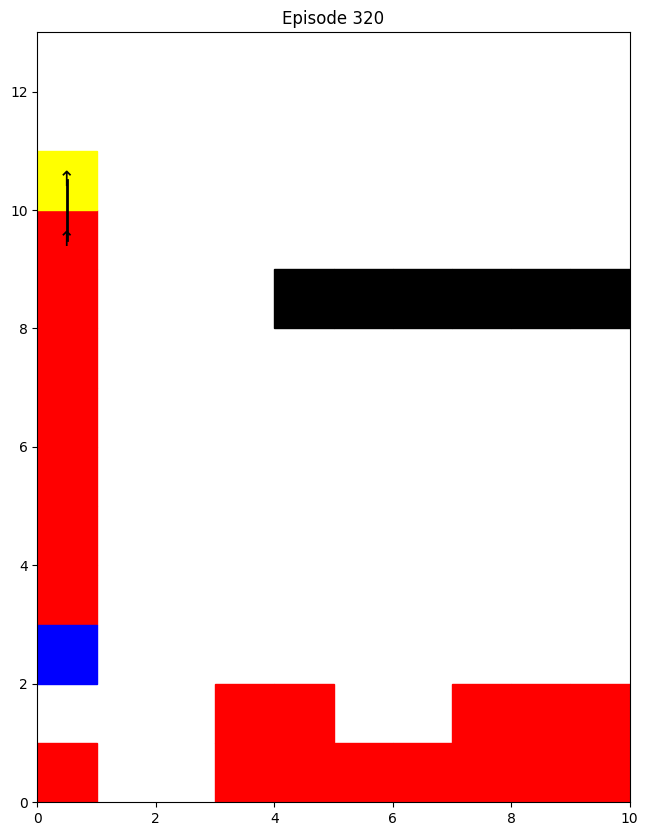

Sarsa Episode 360


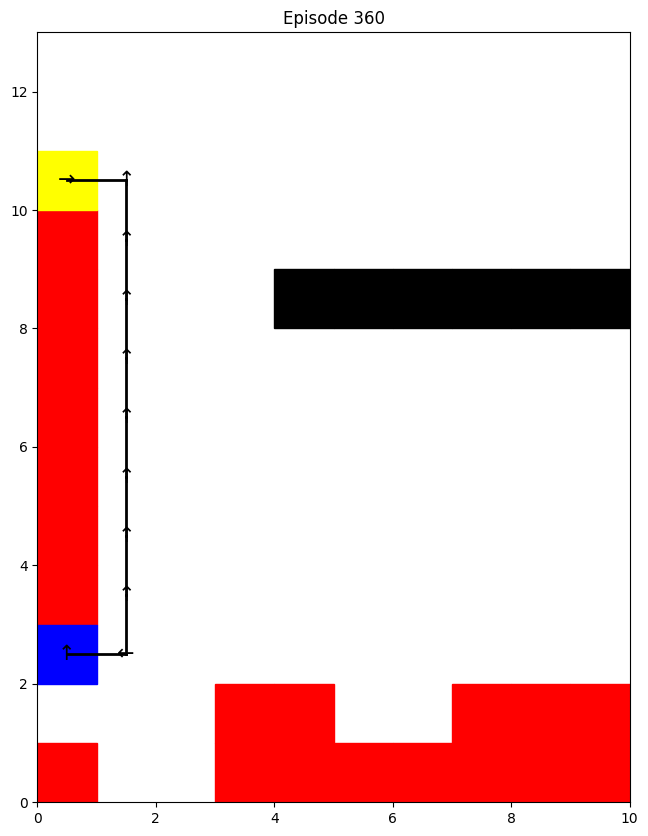

Sarsa Episode 400


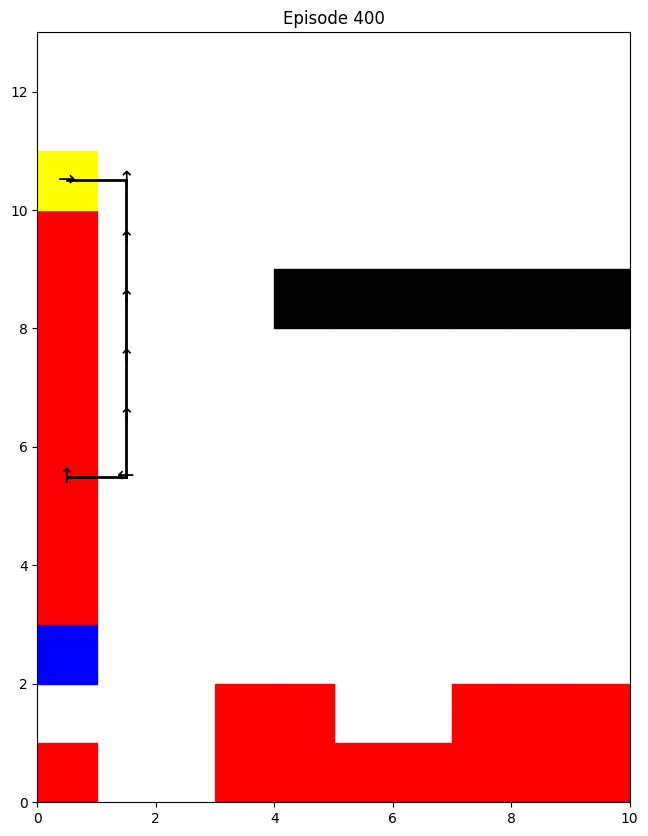

Sarsa Episode 440


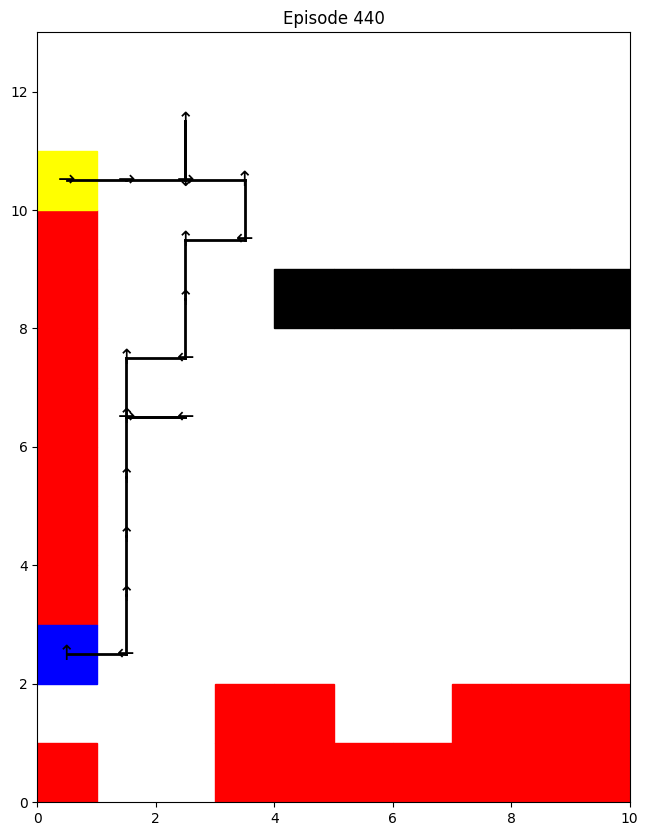

Sarsa Episode 480


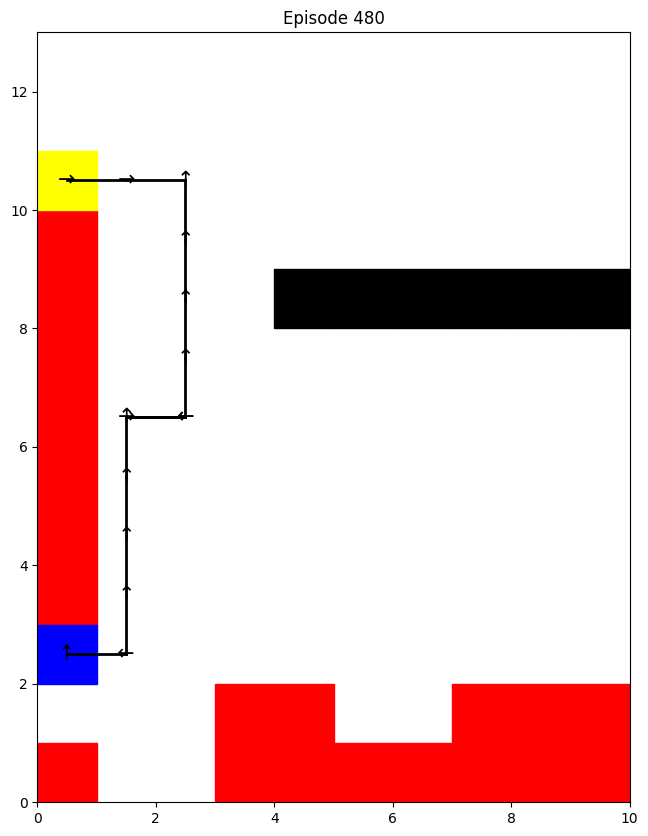

Sarsa Episode 520


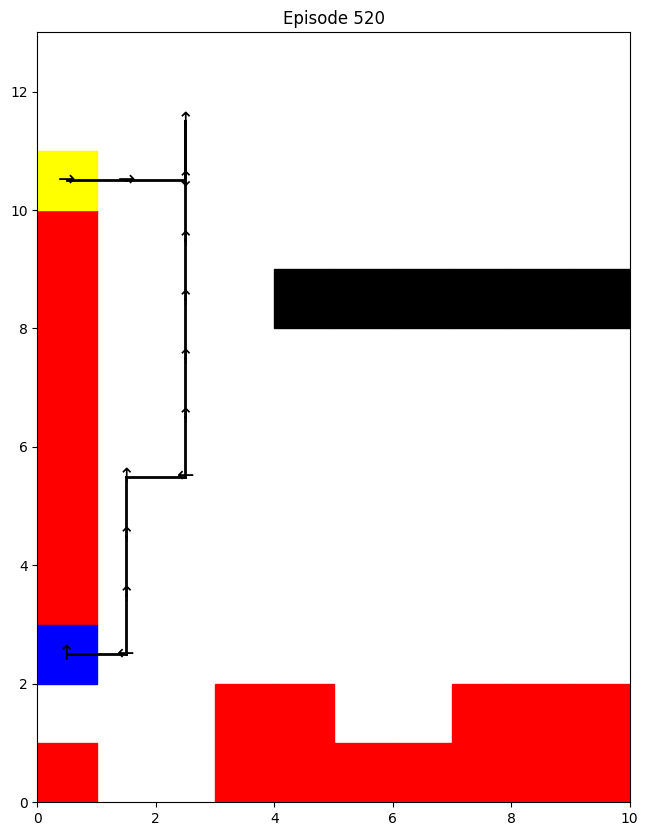

Sarsa Episode 560


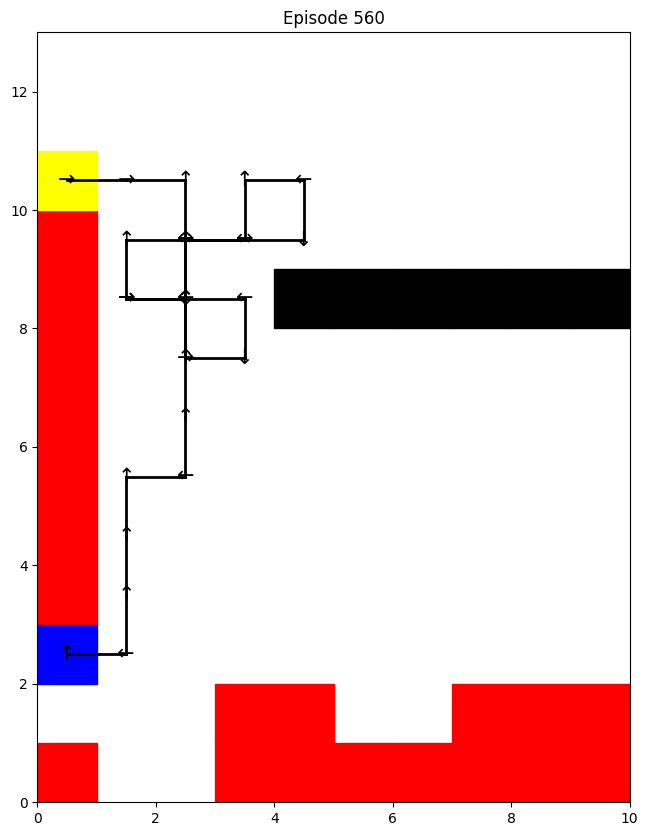

Sarsa Episode 600


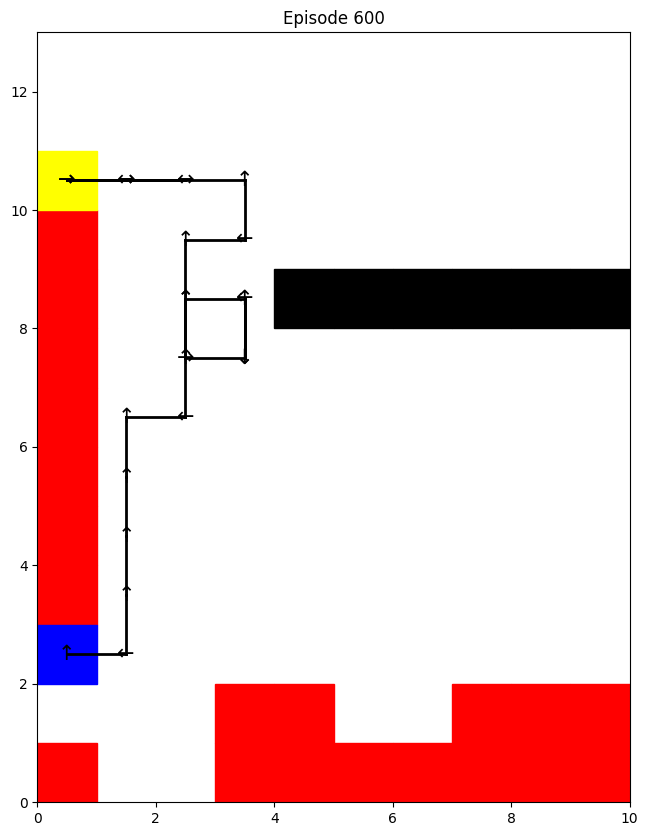

Sarsa Episode 640


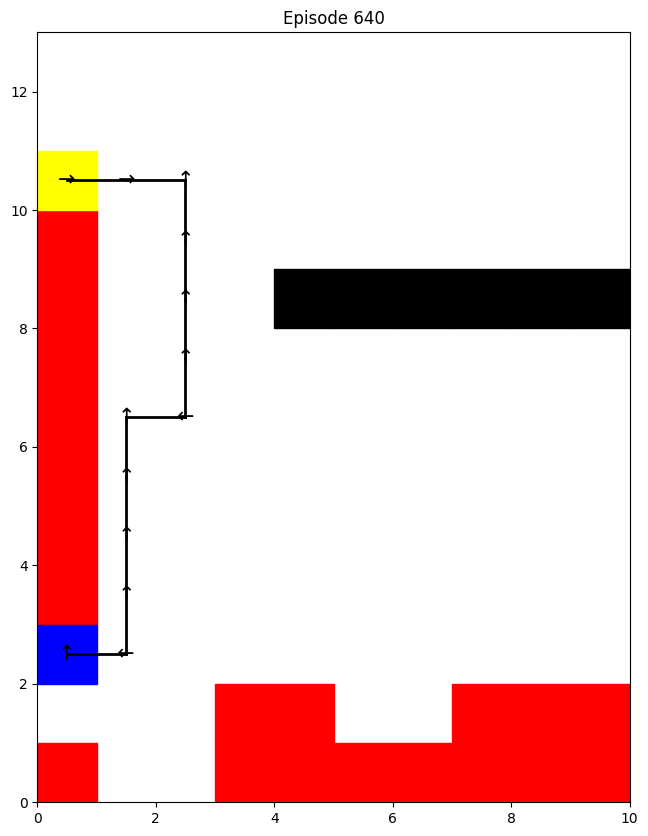

Sarsa Episode 680


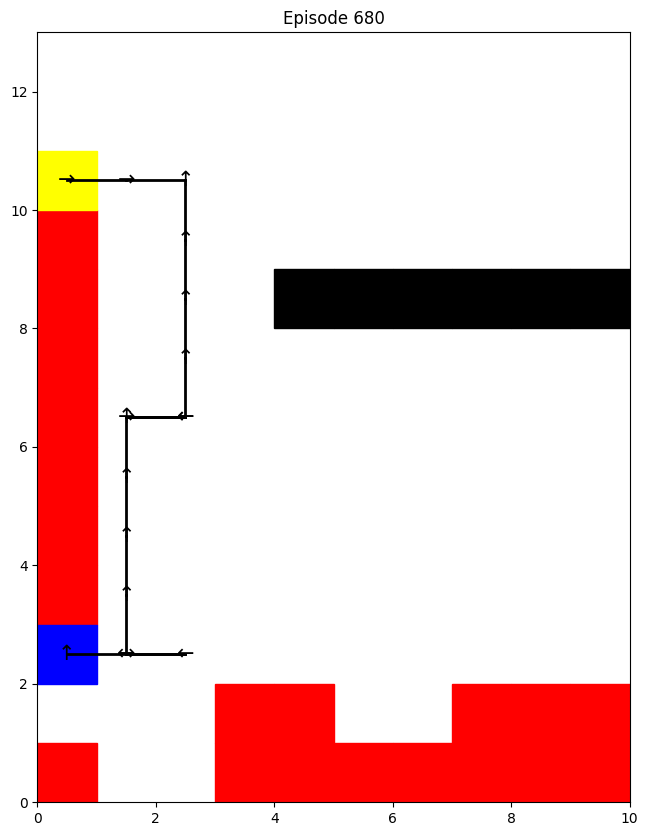

Sarsa Episode 720


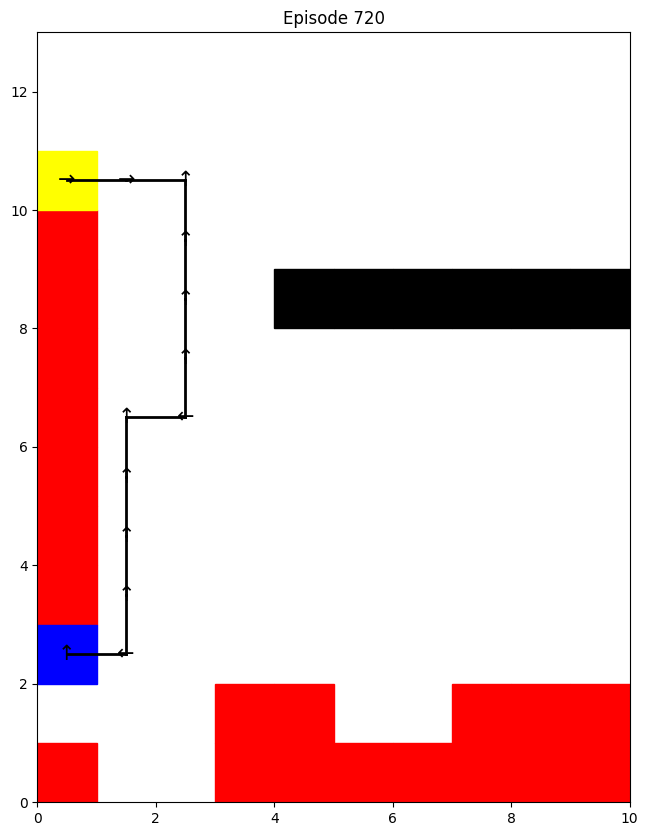

Sarsa Episode 760


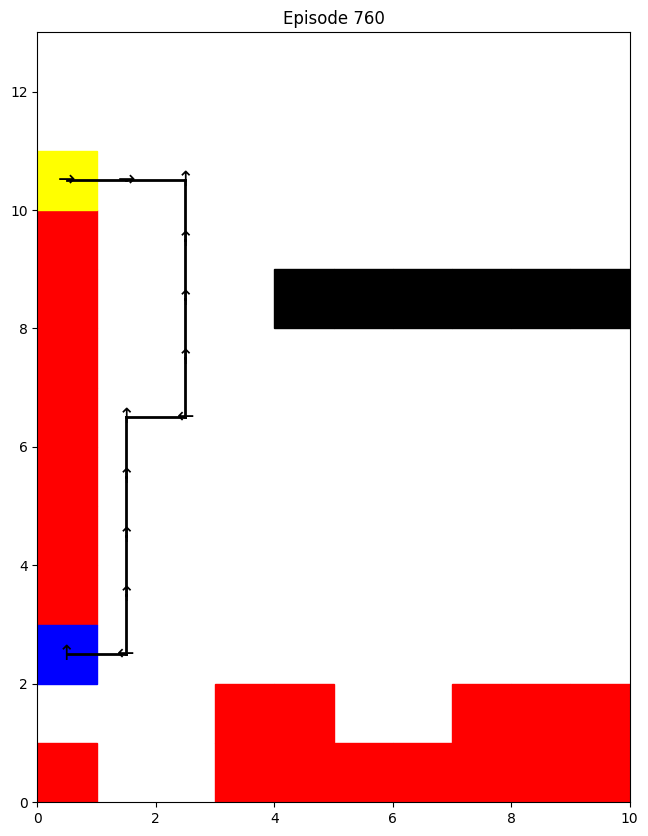

Sarsa Episode 800


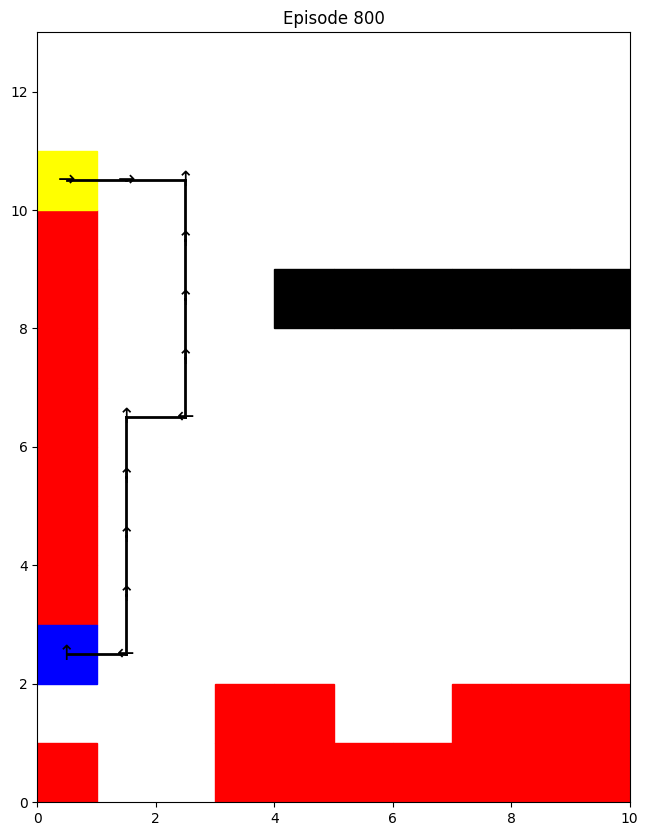

Sarsa Episode 840


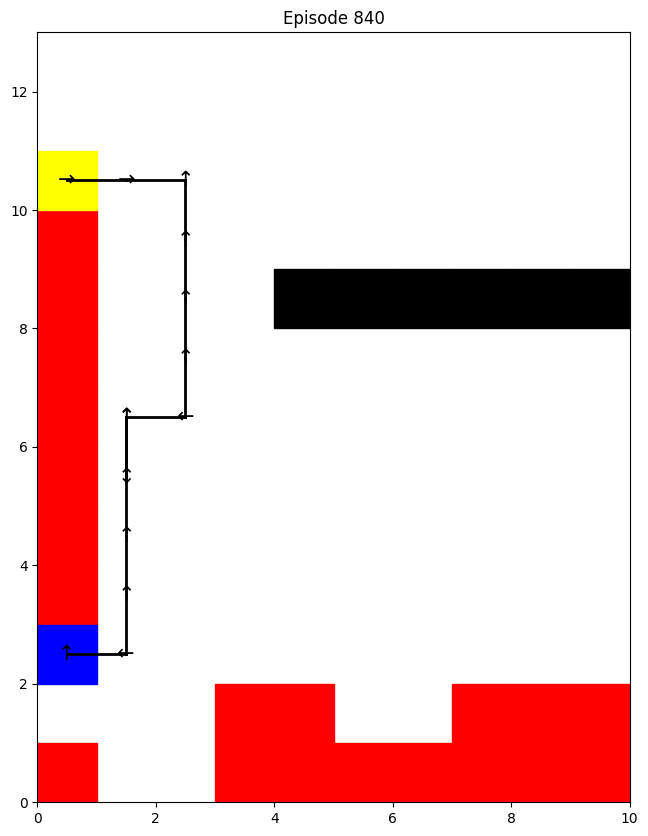

Sarsa Episode 880


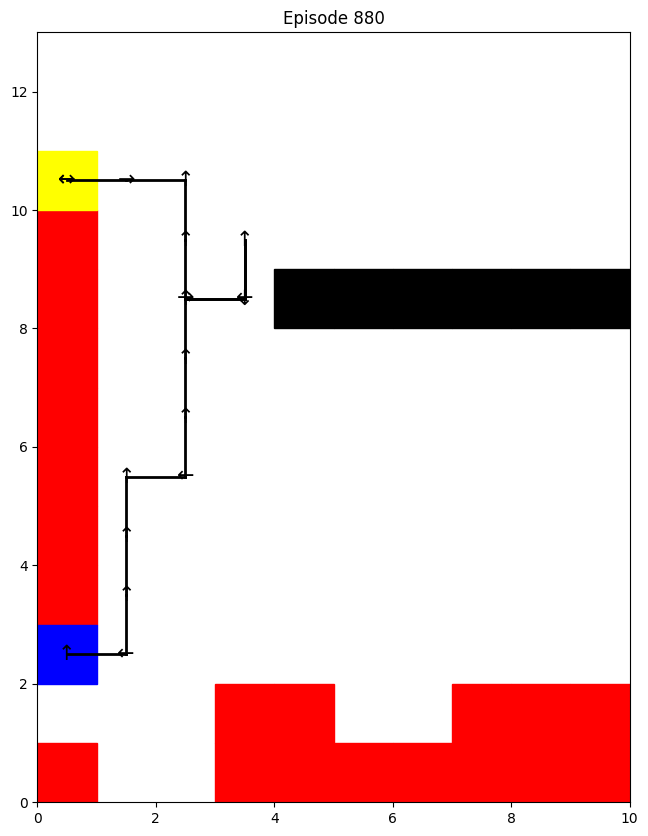

Sarsa Episode 920


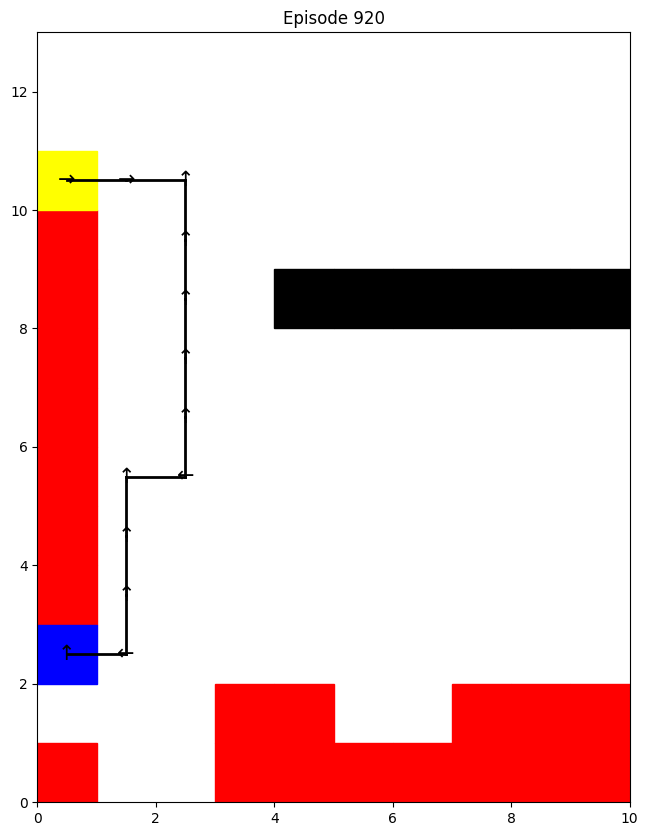

Sarsa Episode 960


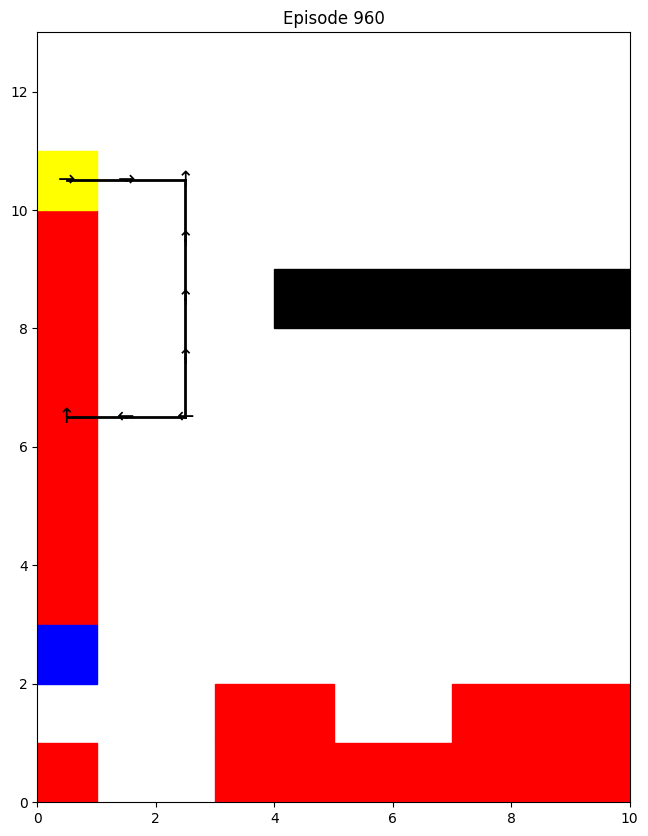

Sarsa Episode 1000


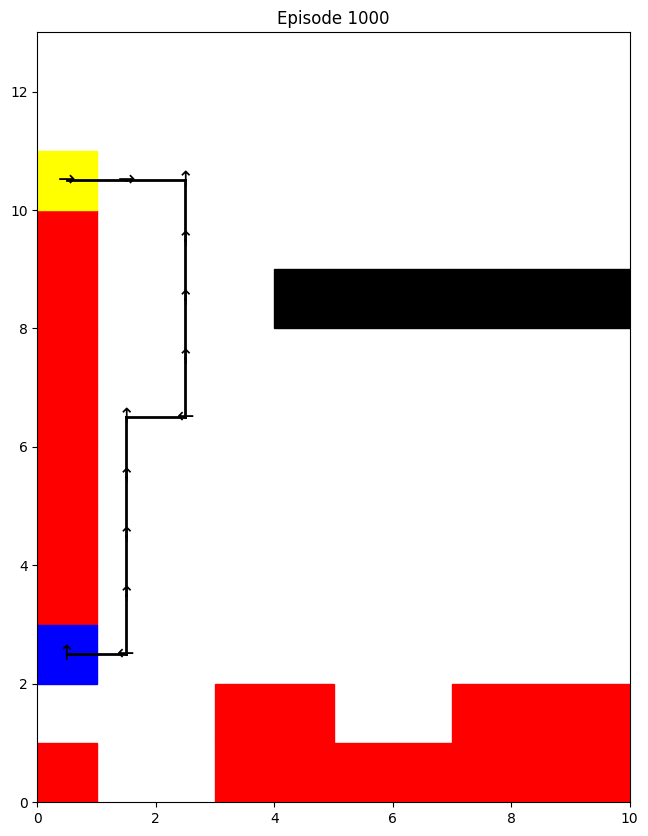

Sarsa Episode 1040


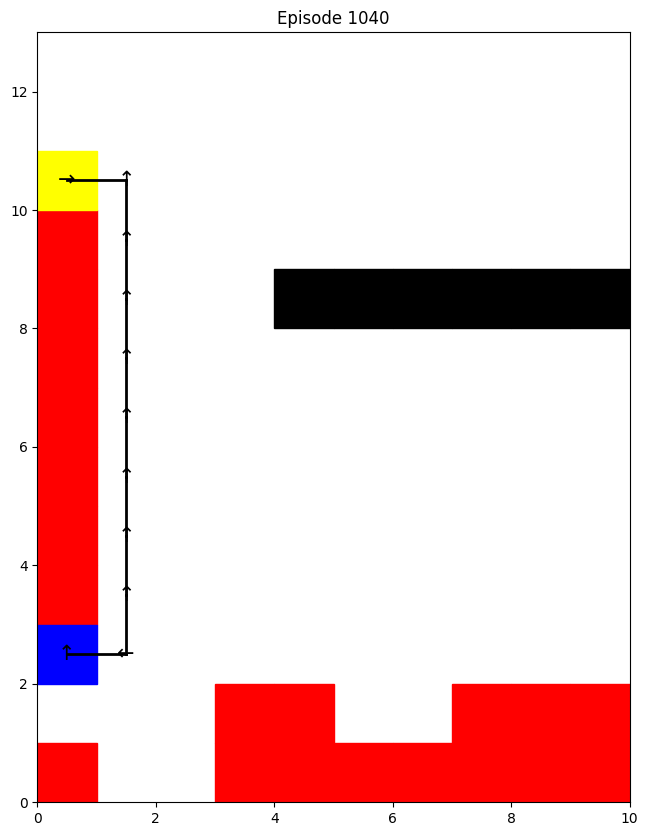

Sarsa Episode 1080


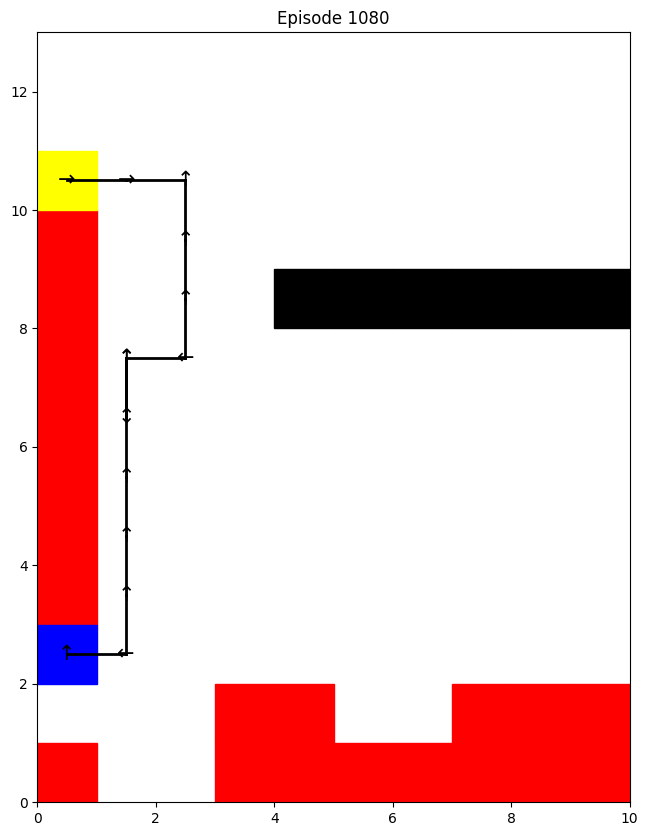

Sarsa Episode 1120


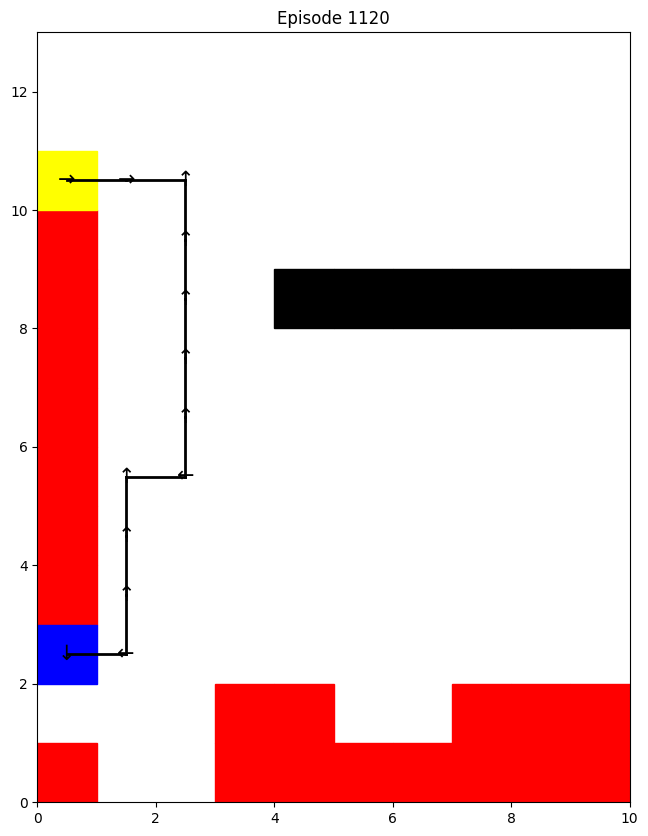

Sarsa Episode 1160


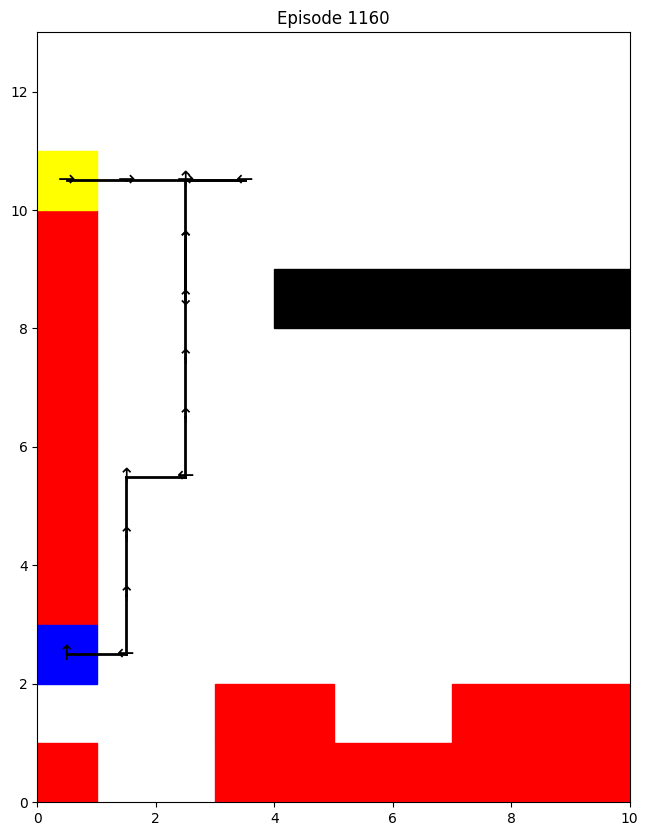

Sarsa Episode 1200


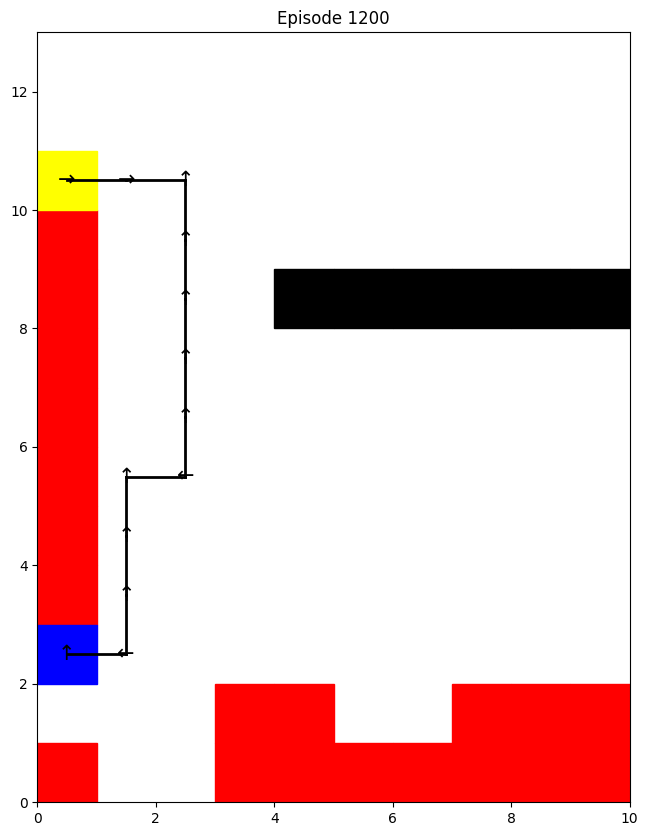

Sarsa Episode 1240


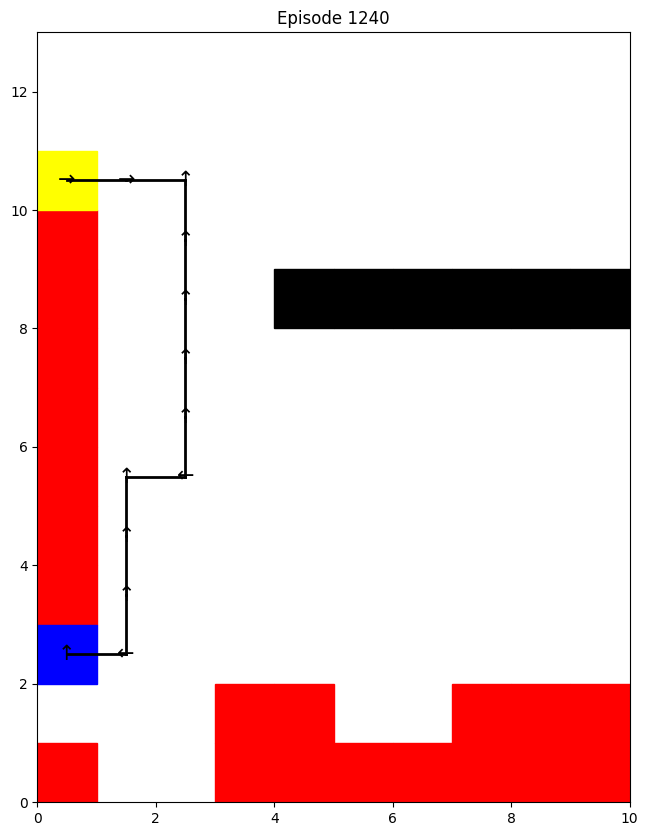

Sarsa Episode 1280


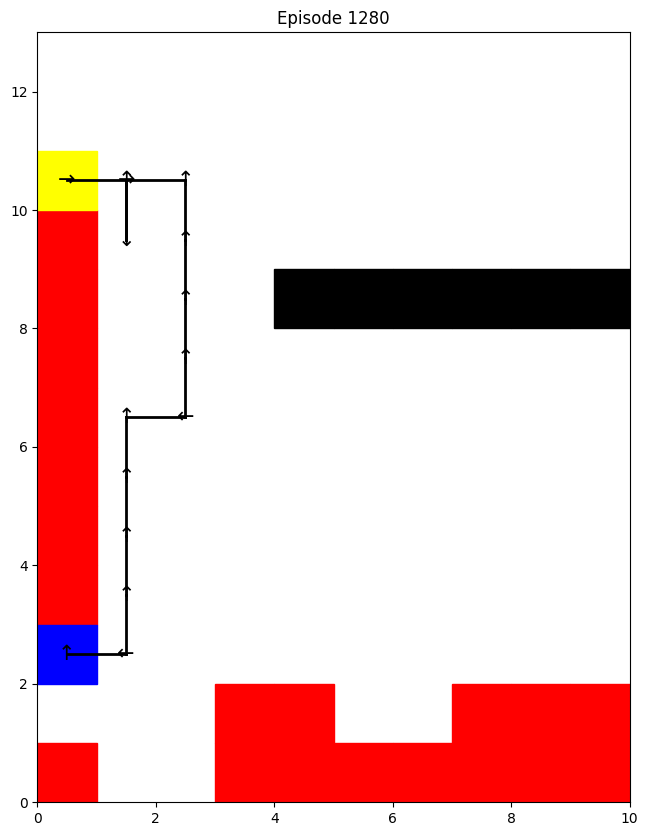

Sarsa Episode 1320


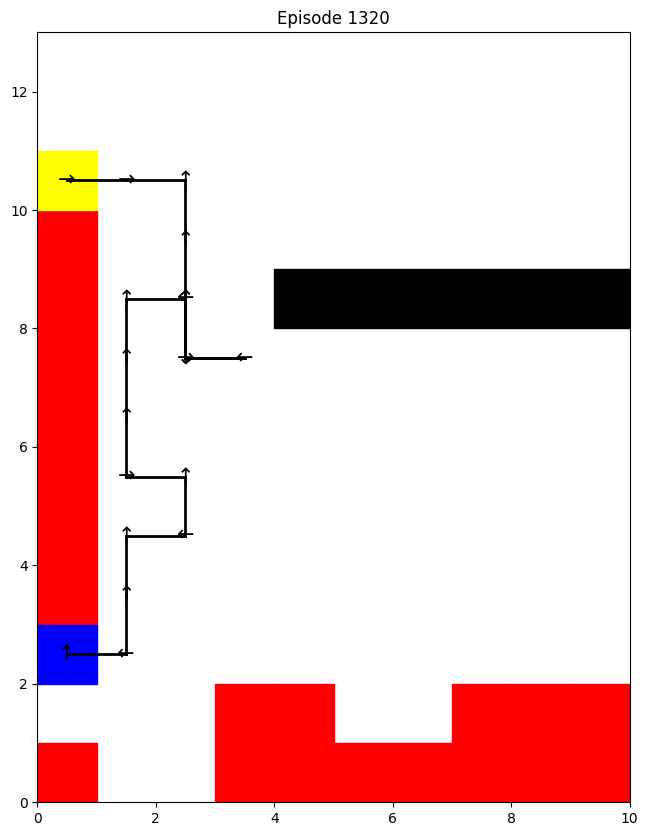

Sarsa Episode 1360


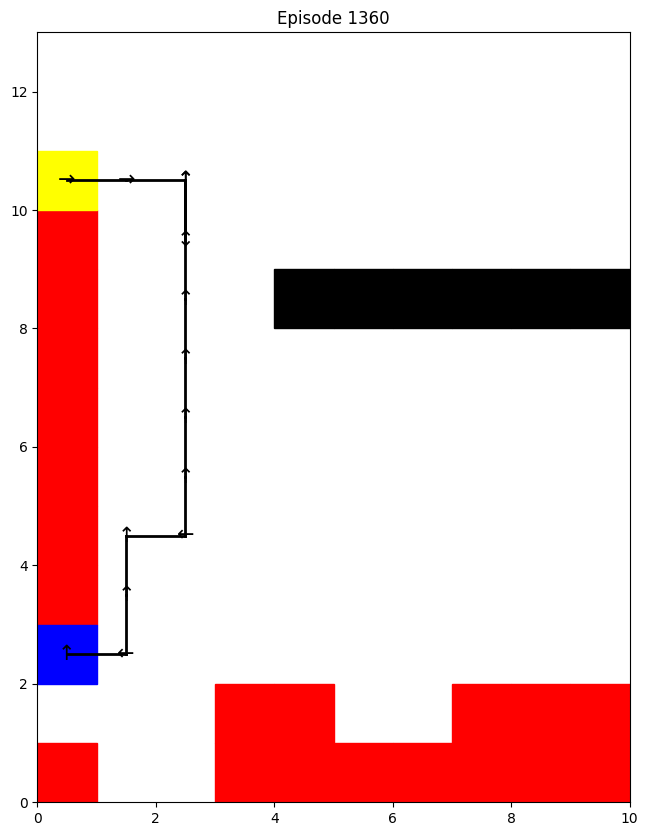

Sarsa Episode 1400


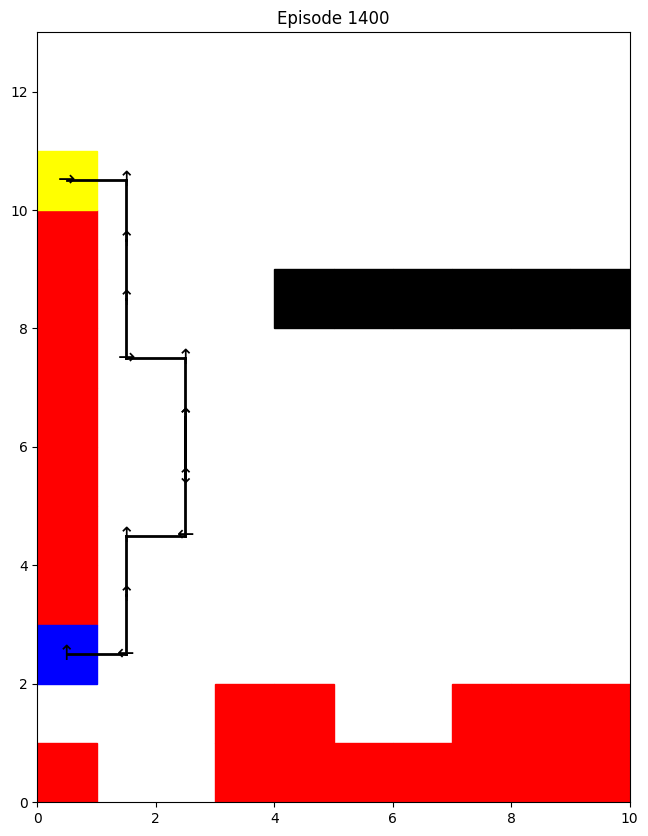

Sarsa Episode 1440


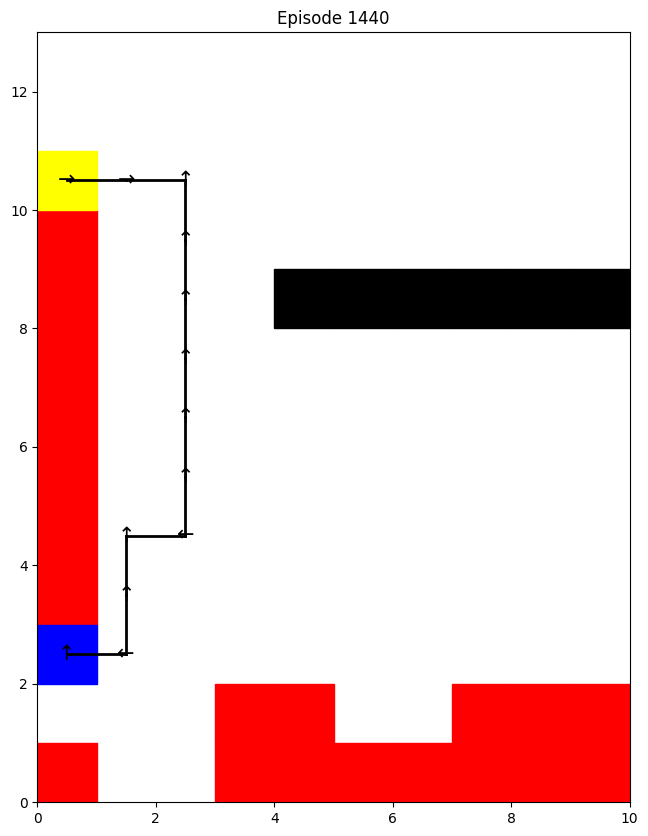

Sarsa Episode 1480


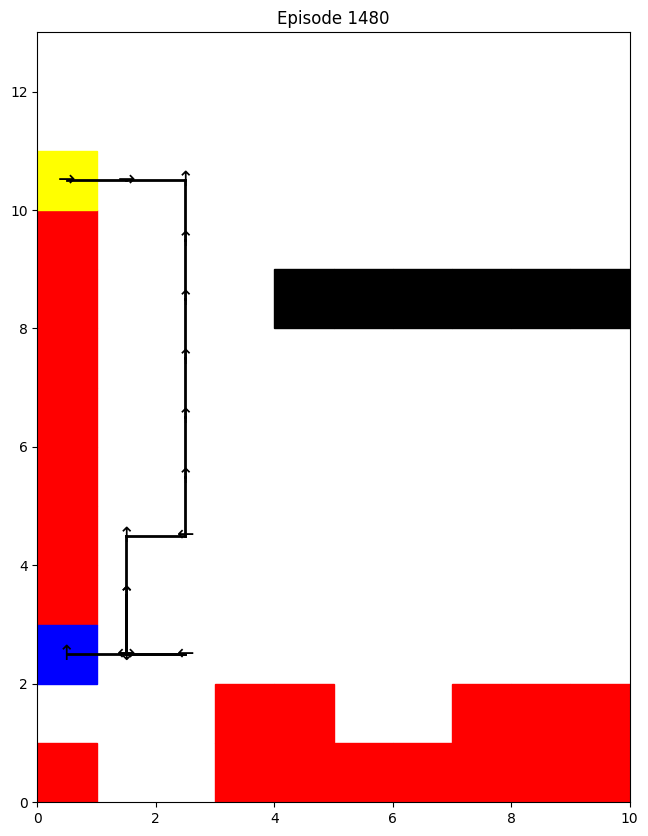

Sarsa Episode 1520


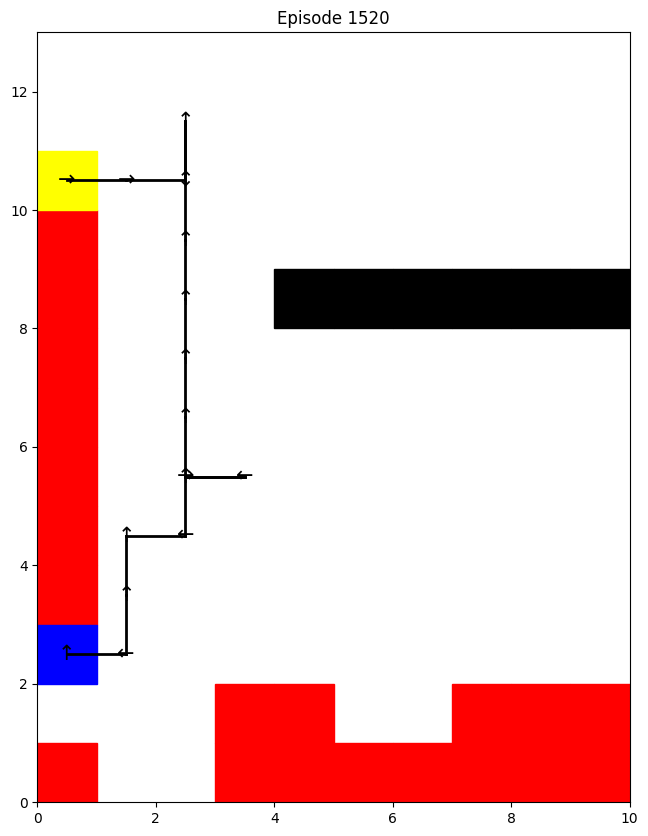

Sarsa Episode 1560


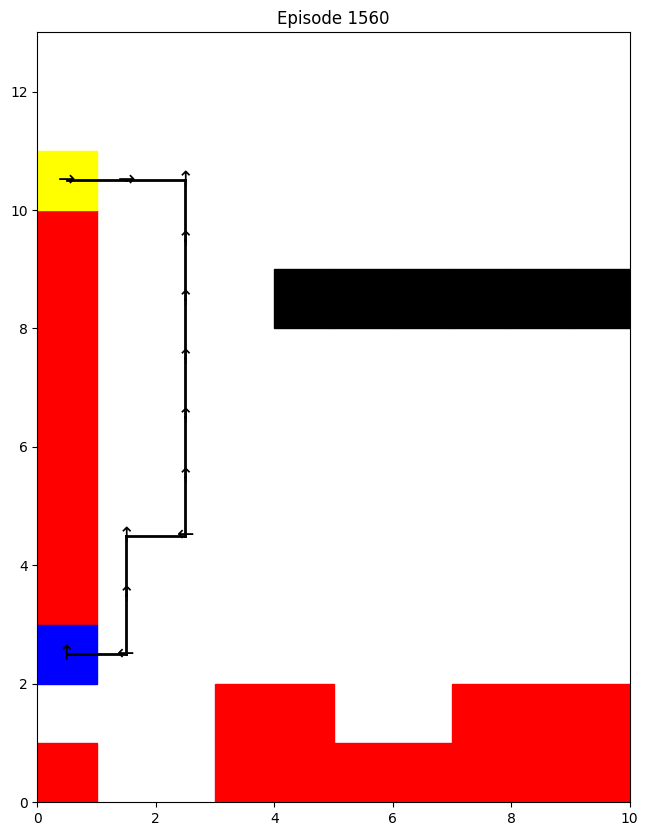

Sarsa Episode 1600


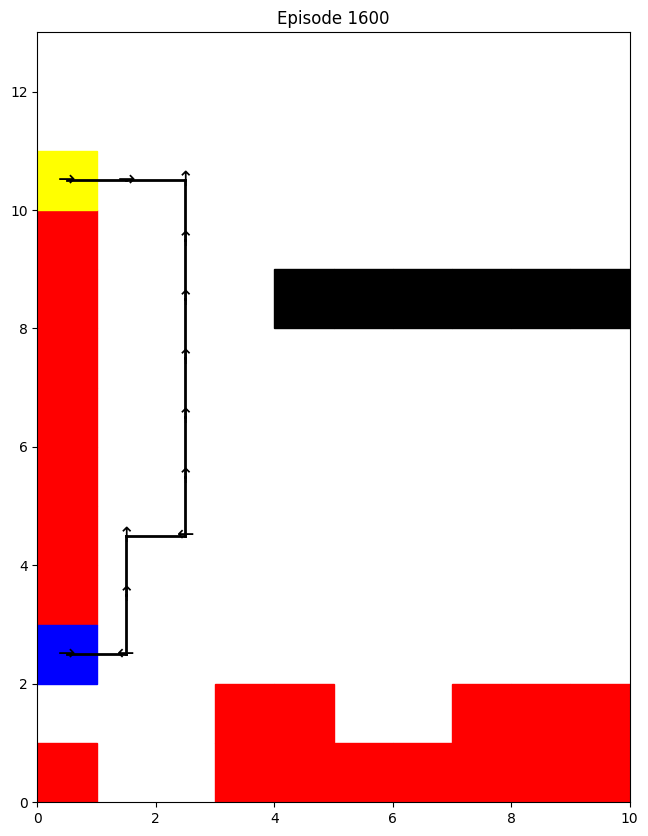

Sarsa Episode 1640


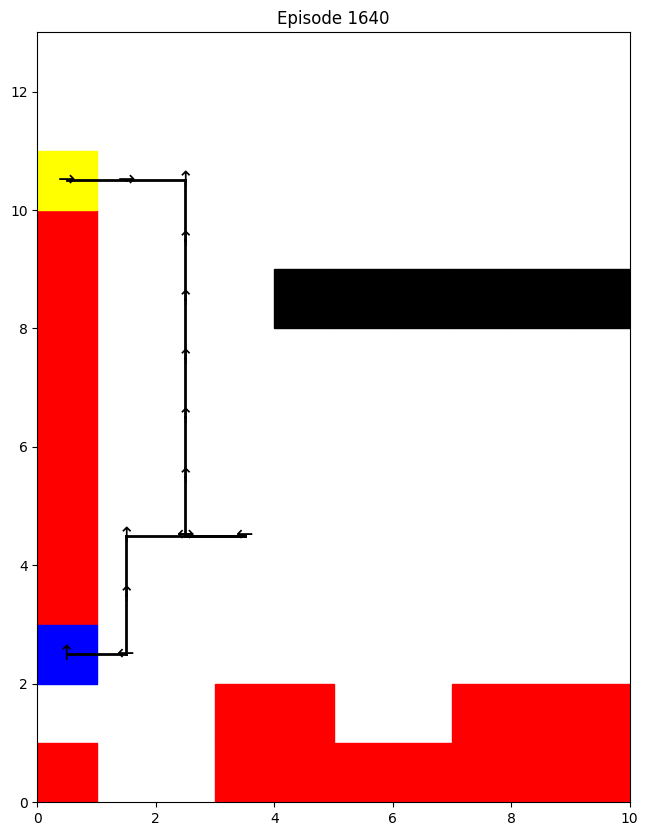

Sarsa Episode 1680


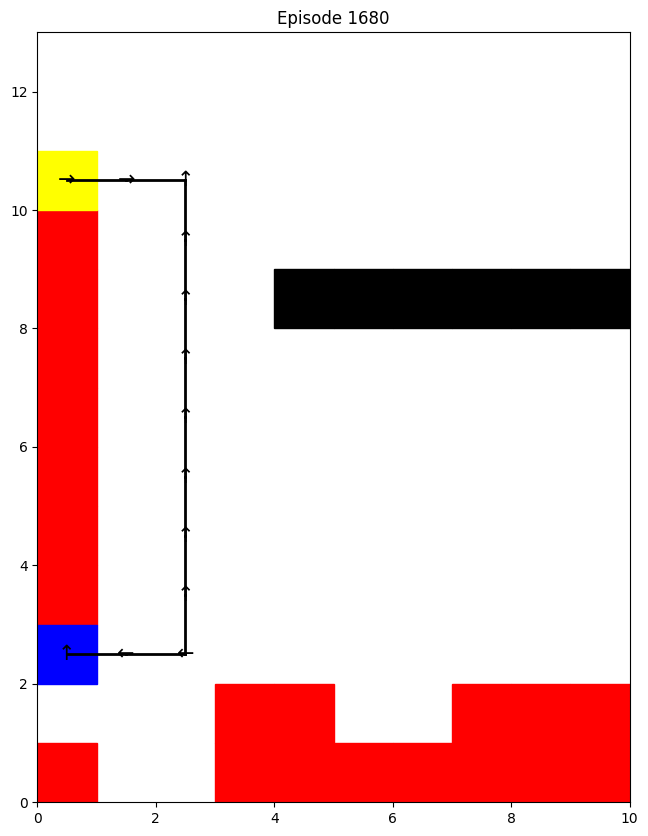

Sarsa Episode 1720


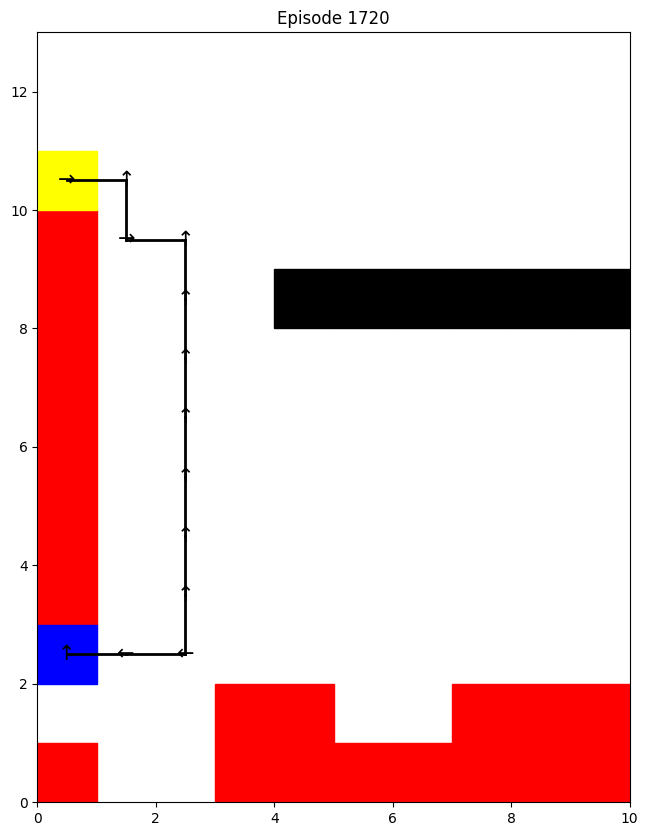

Sarsa Episode 1760


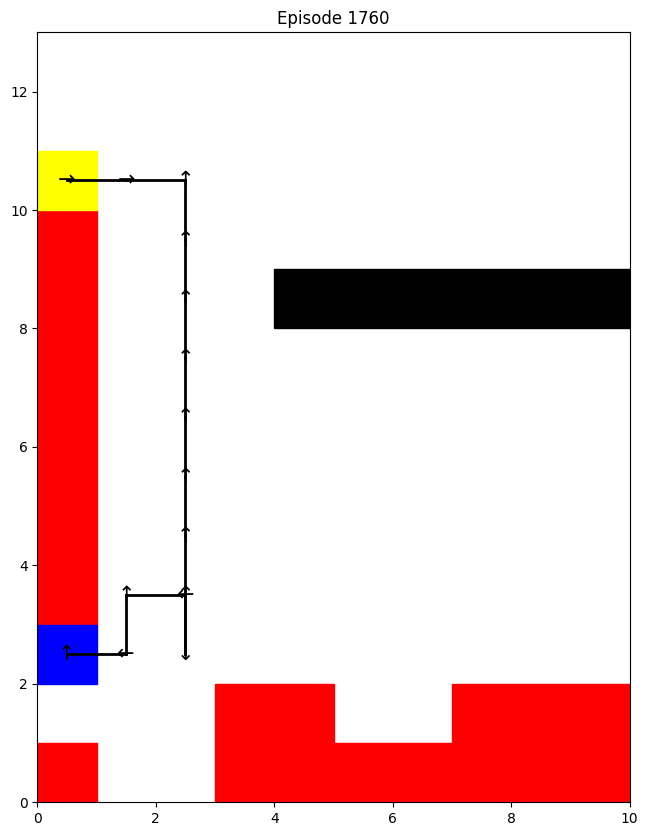

Sarsa Episode 1800


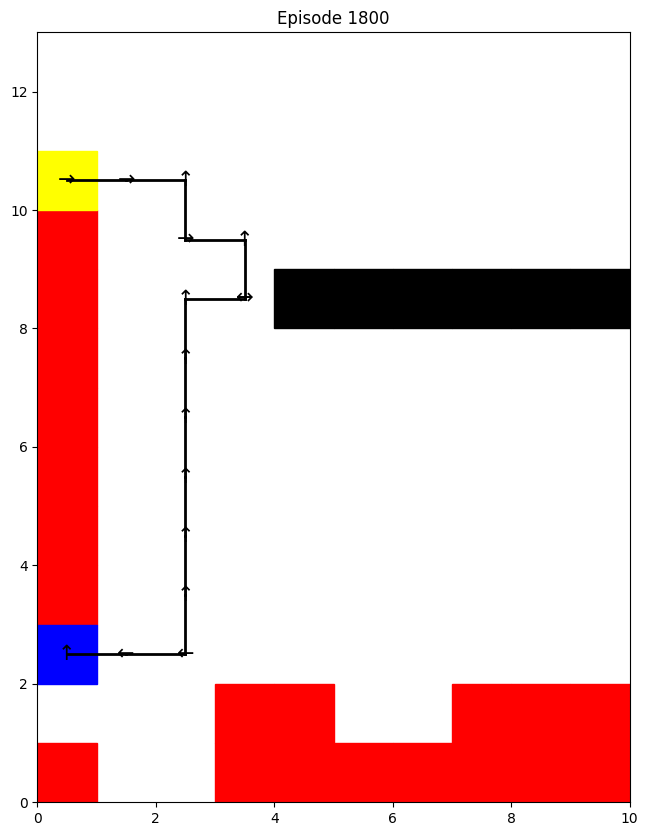

Sarsa Episode 1840


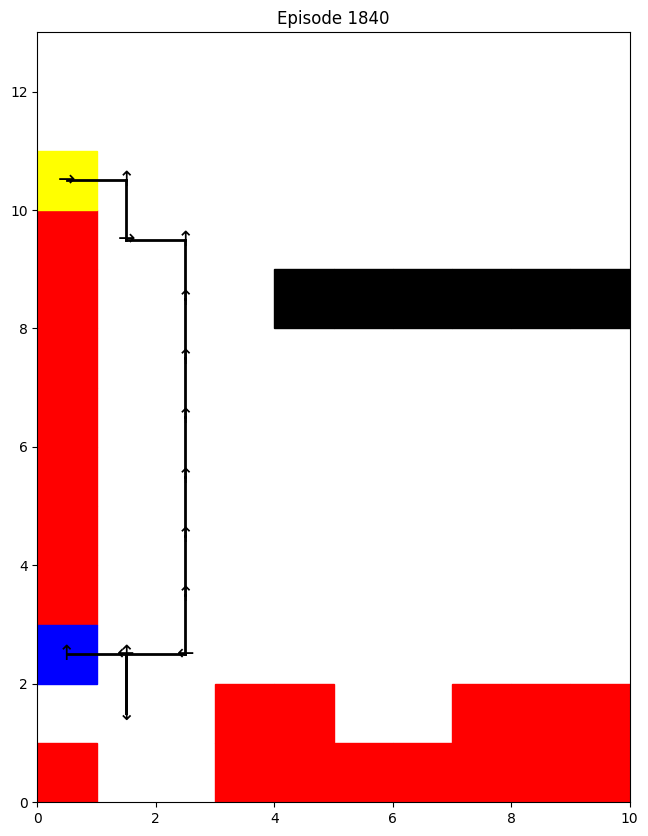

Sarsa Episode 1880


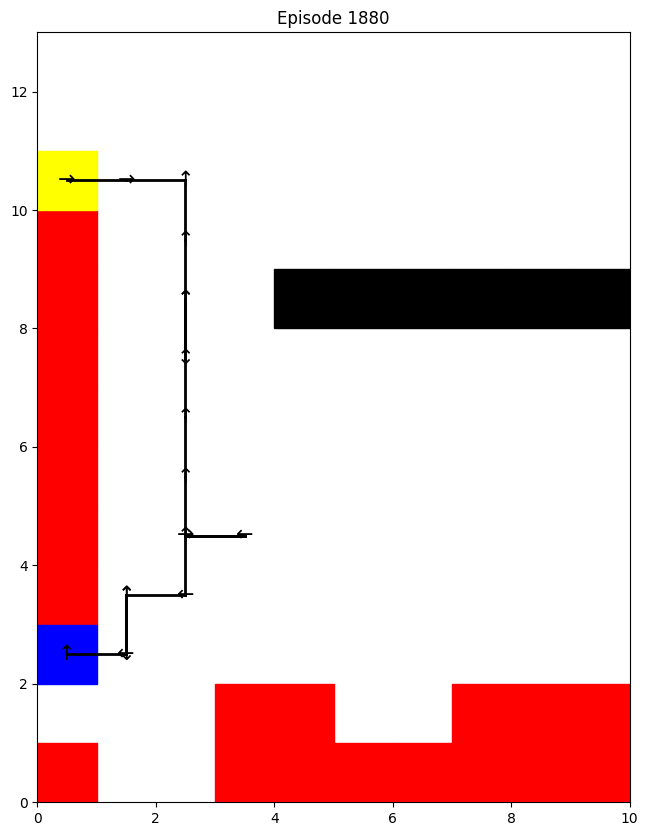

Sarsa Episode 1920


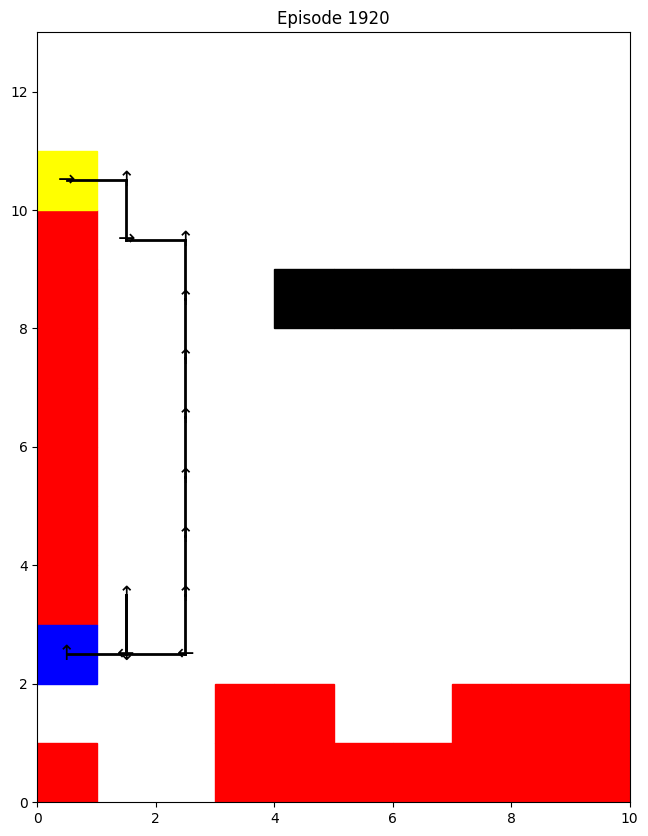

Sarsa Episode 1960


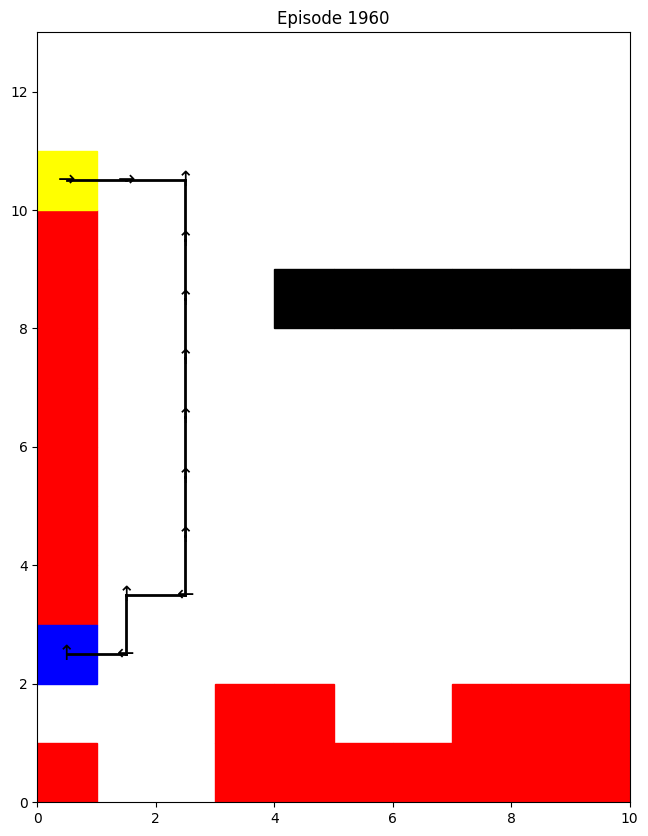

In [14]:
n = 0
while n < 50:
    print("Sarsa Episode " + str(n * 40))
    plot_episode_sequence(env1, episode_sequences_sarsa[n*40], episode_num=(n*40))
    n += 1

## Q-Learning

Best parameters for Q-learning: gamma=0.9, alpha=0.7, tau=0.3


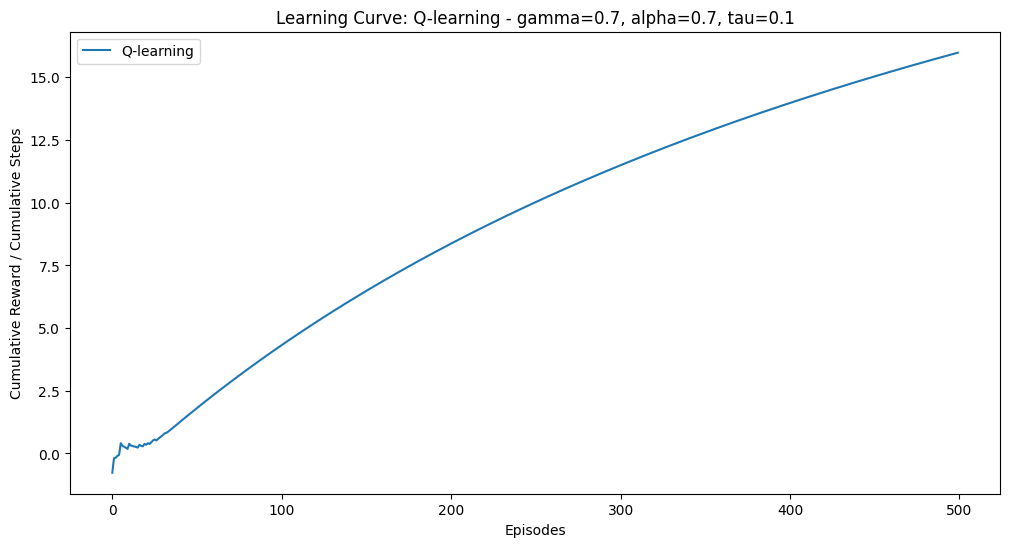

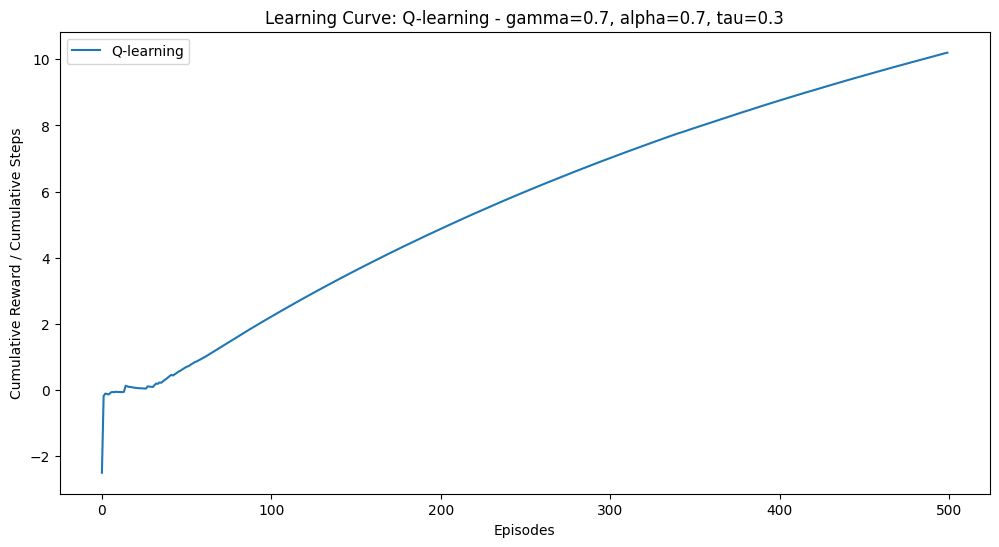

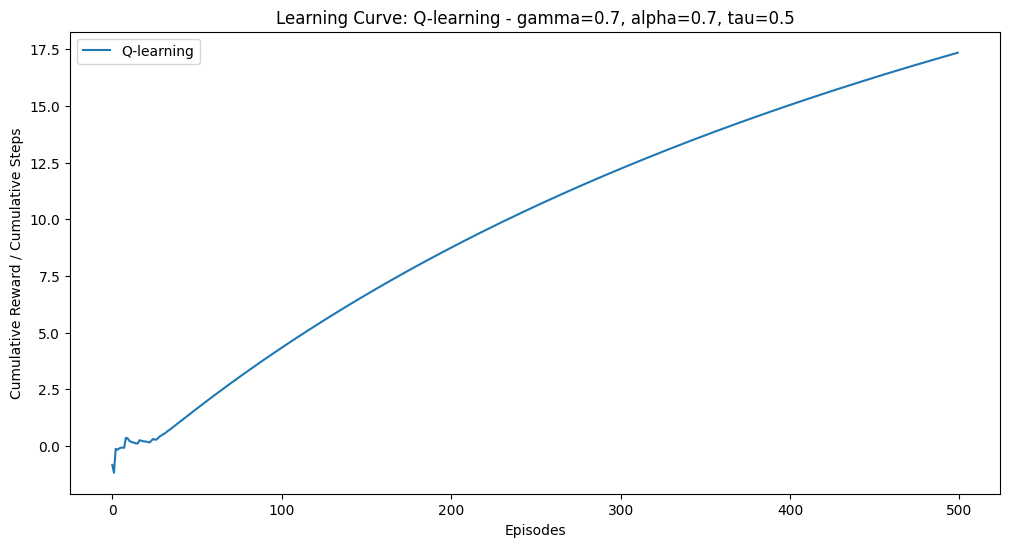

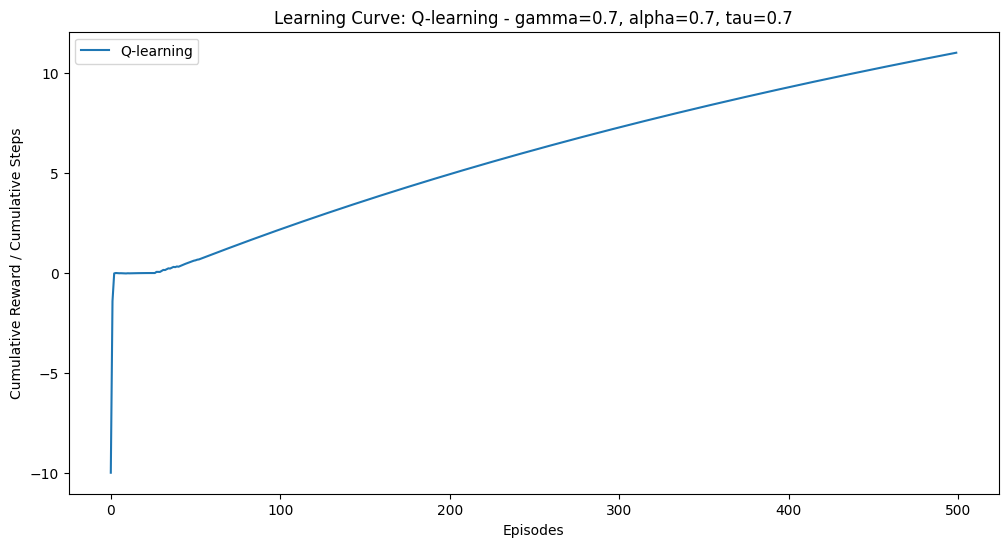

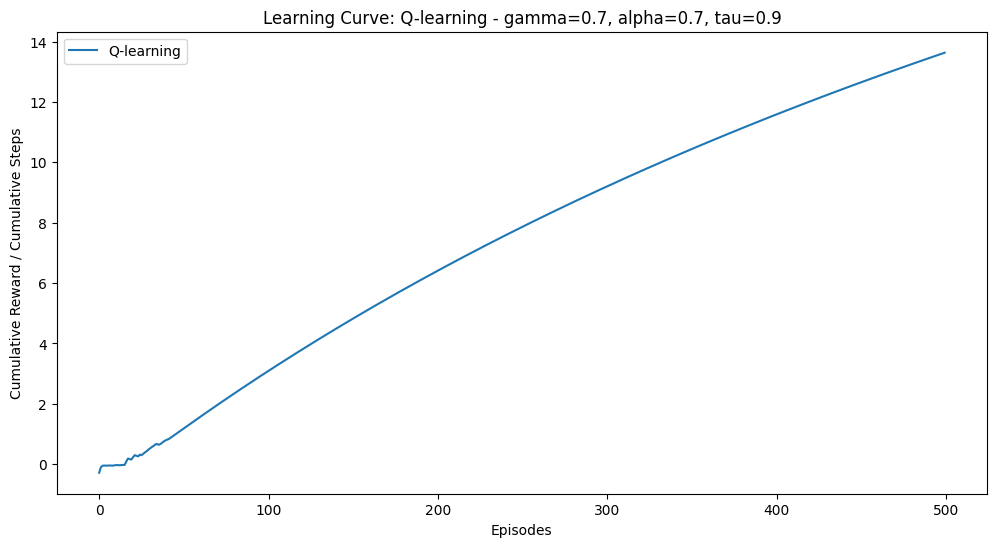

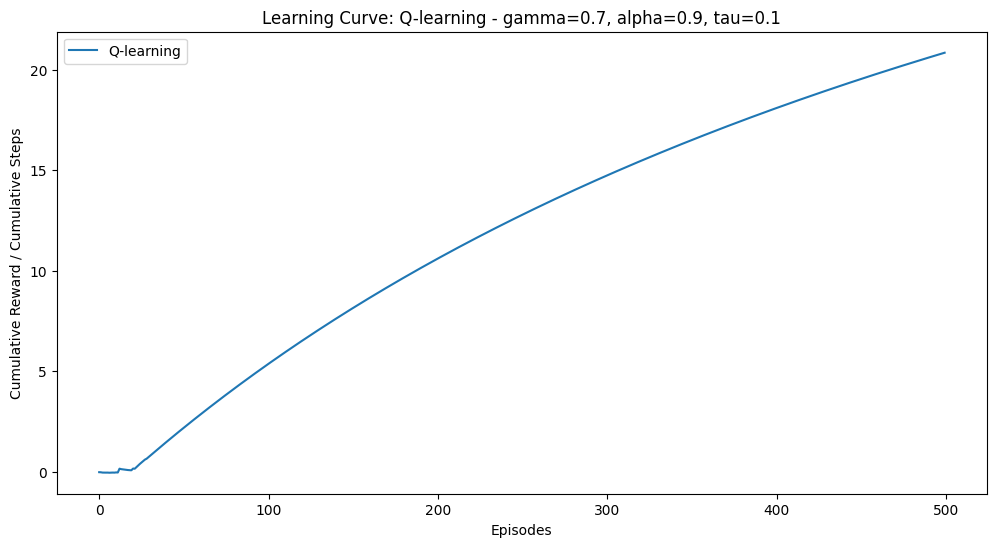

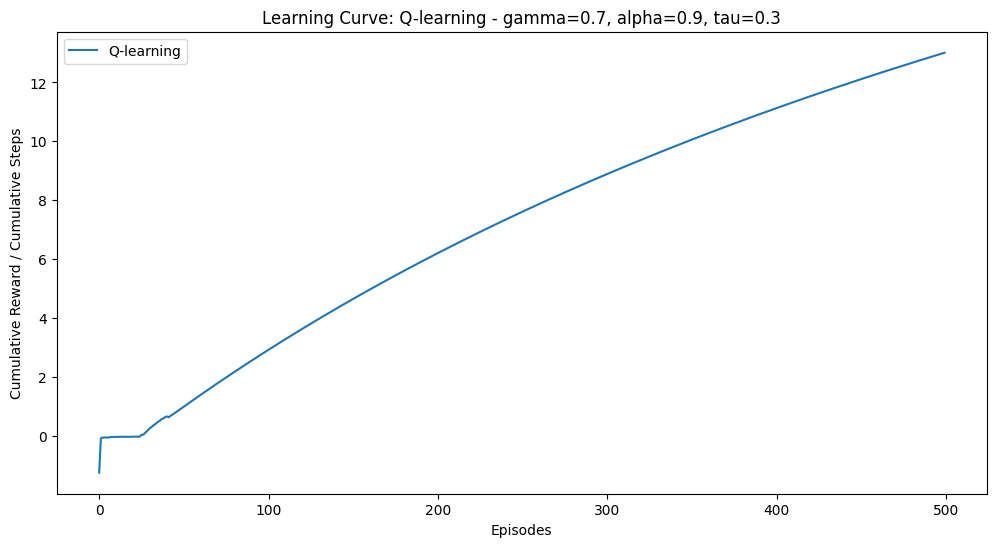

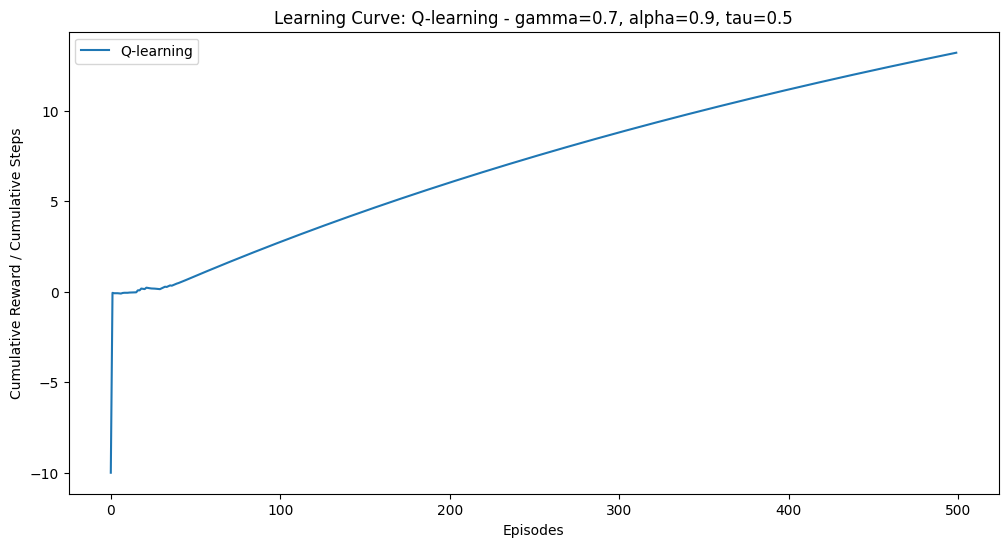

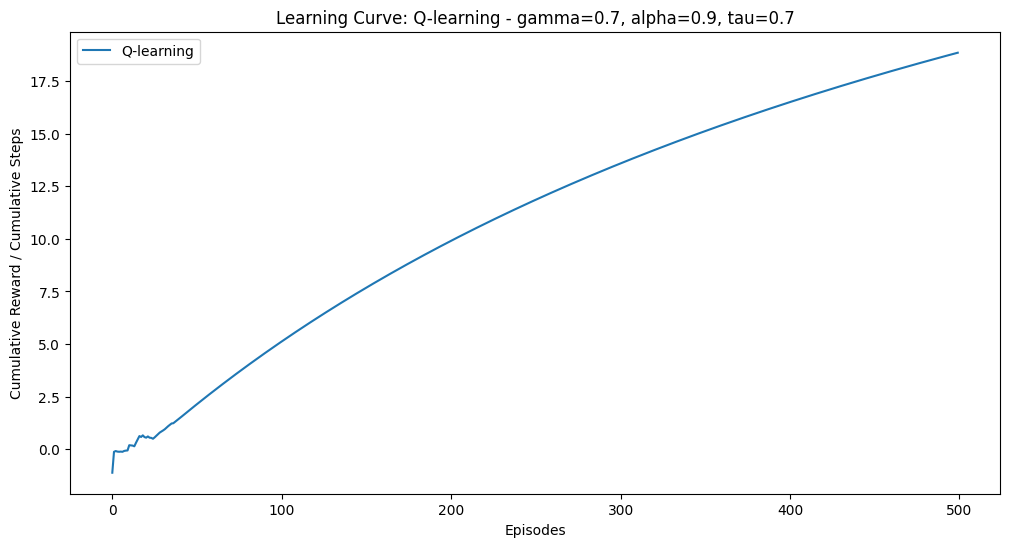

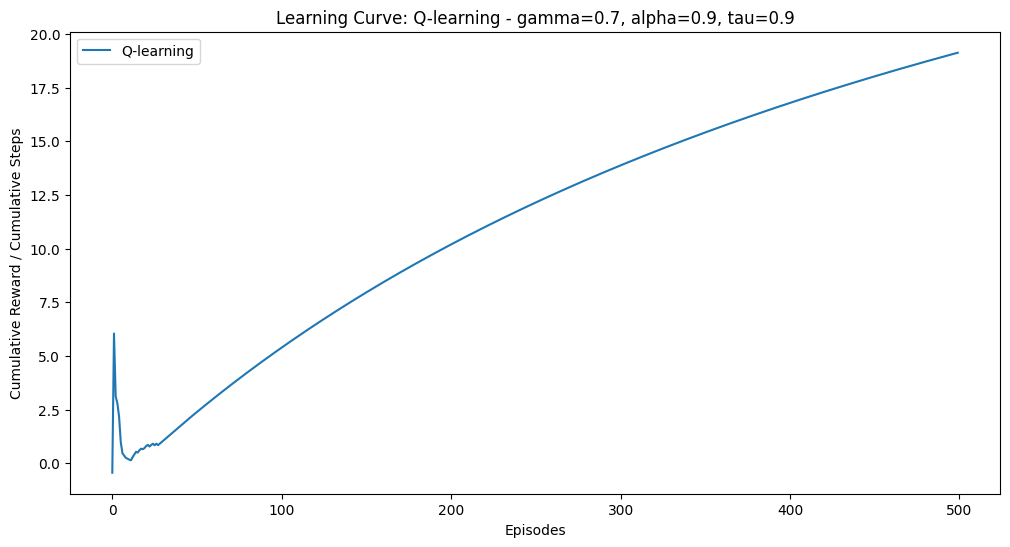

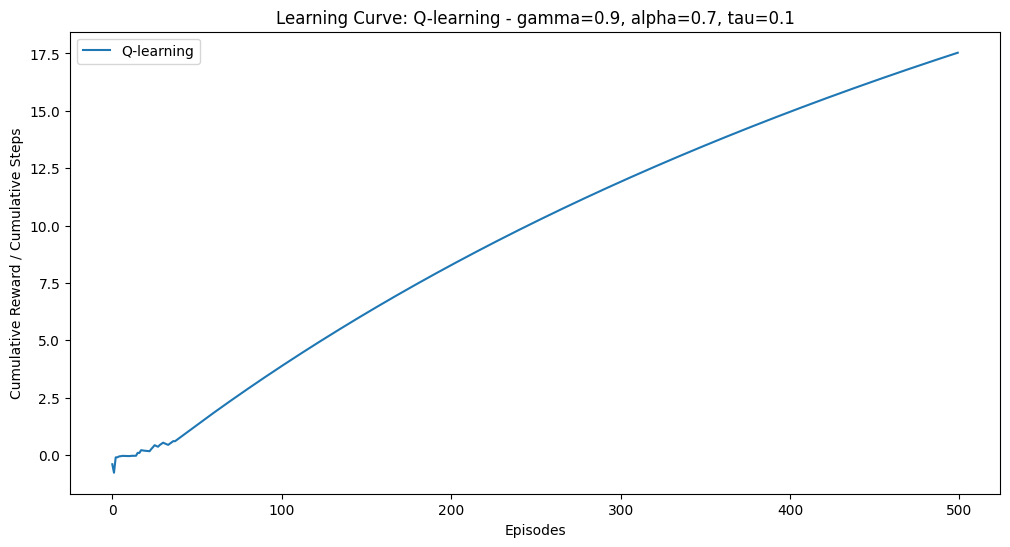

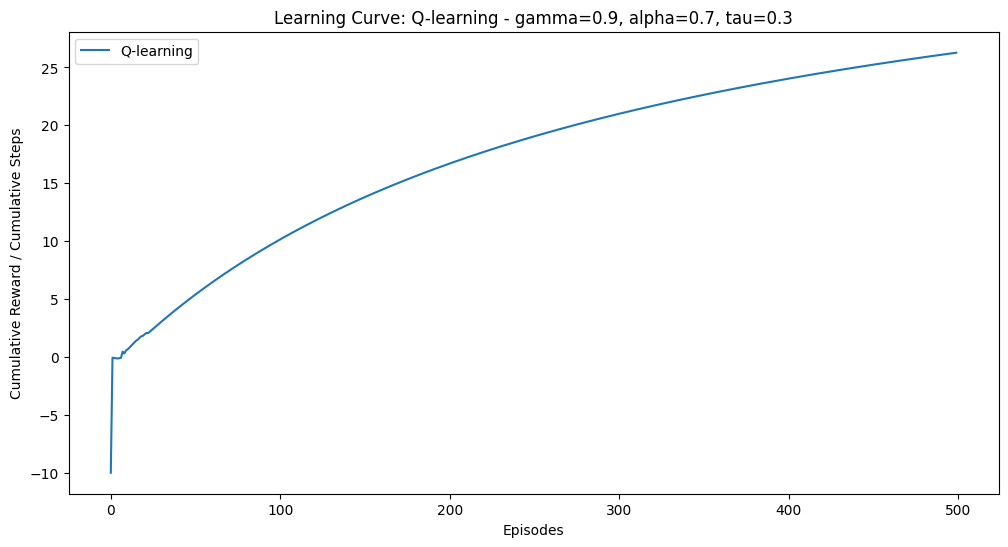

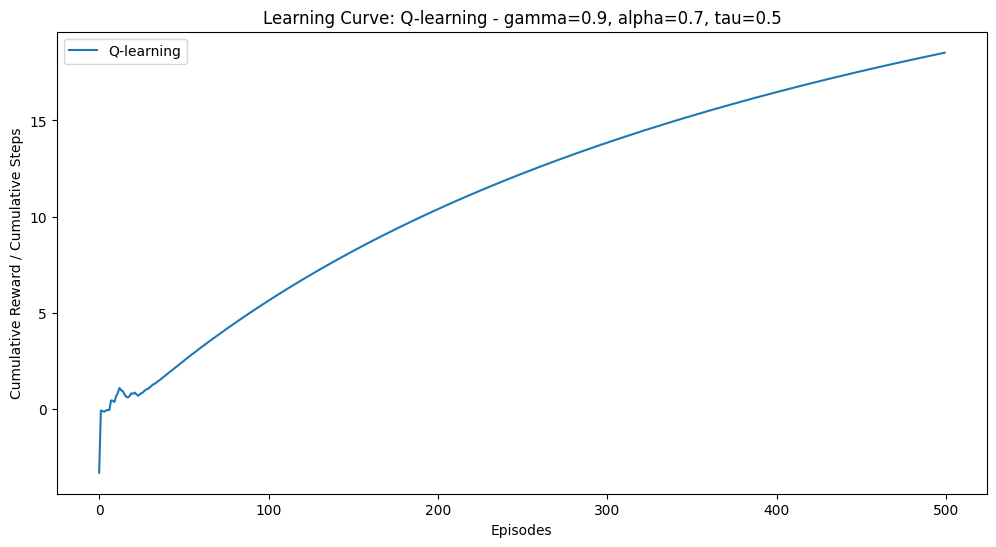

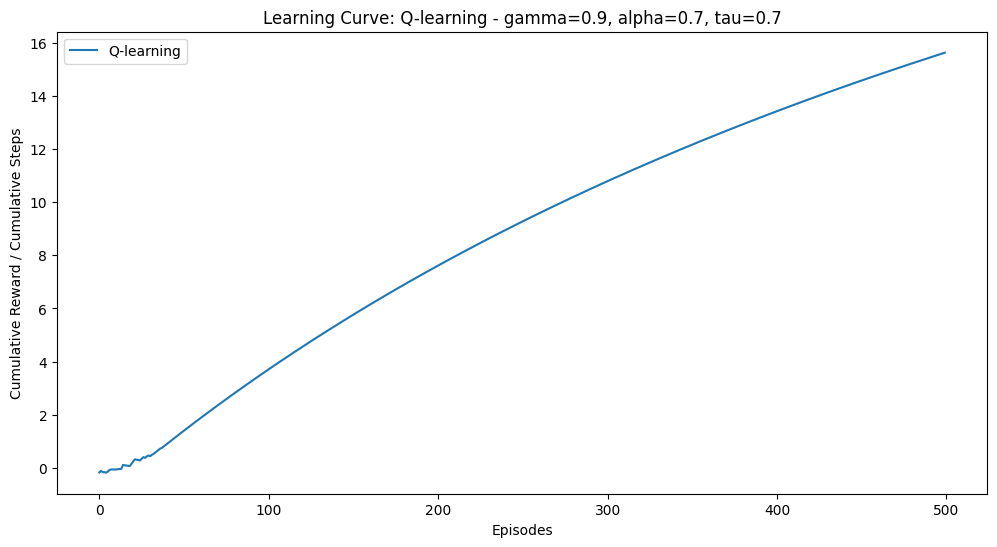

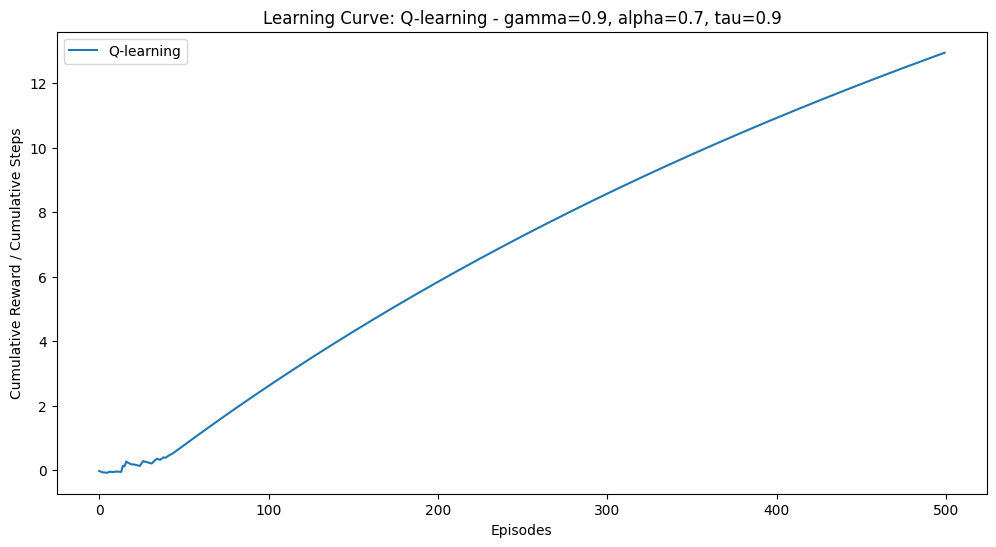

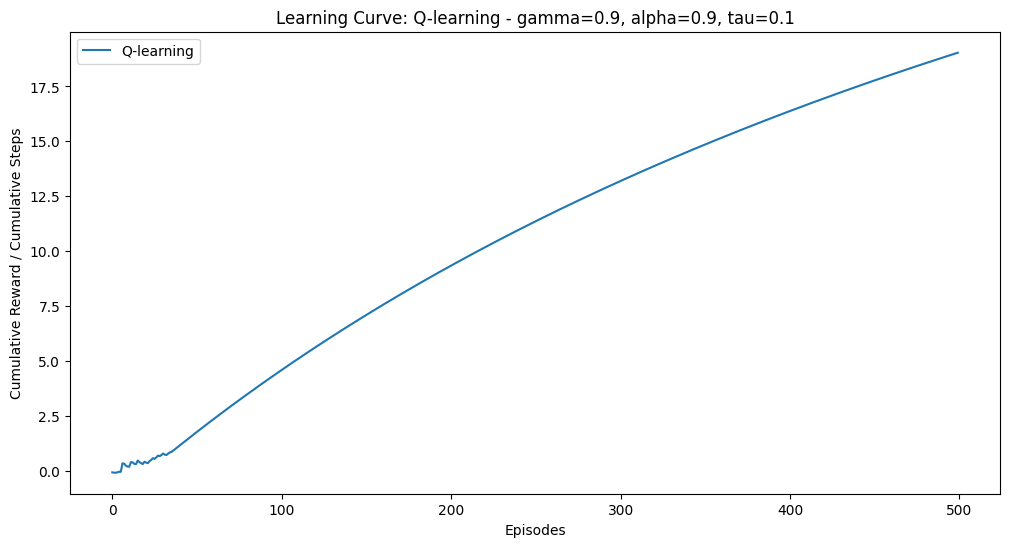

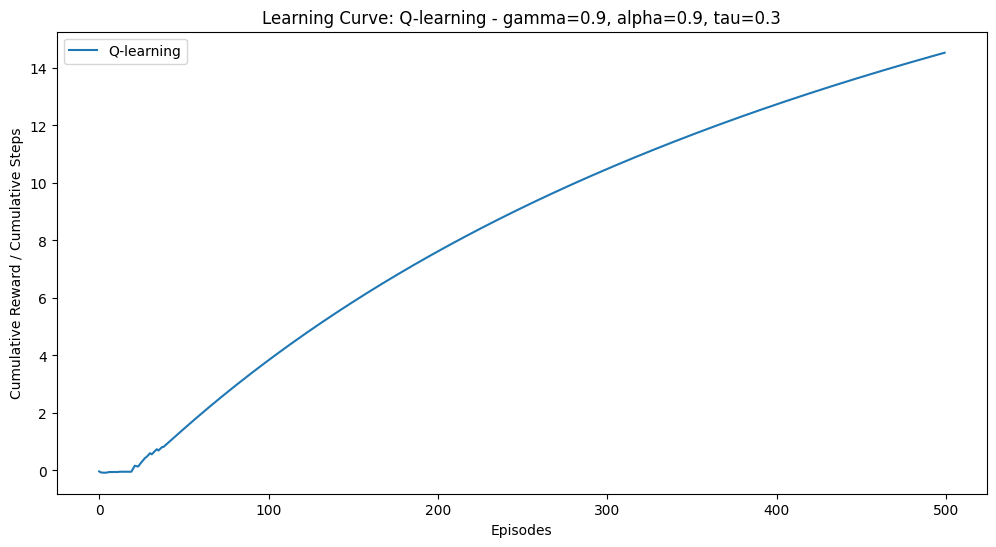

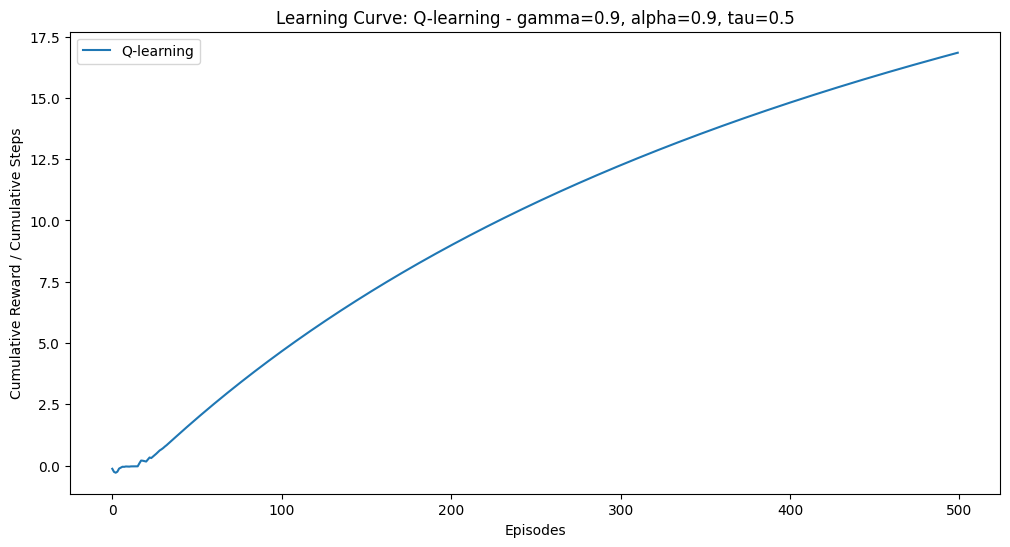

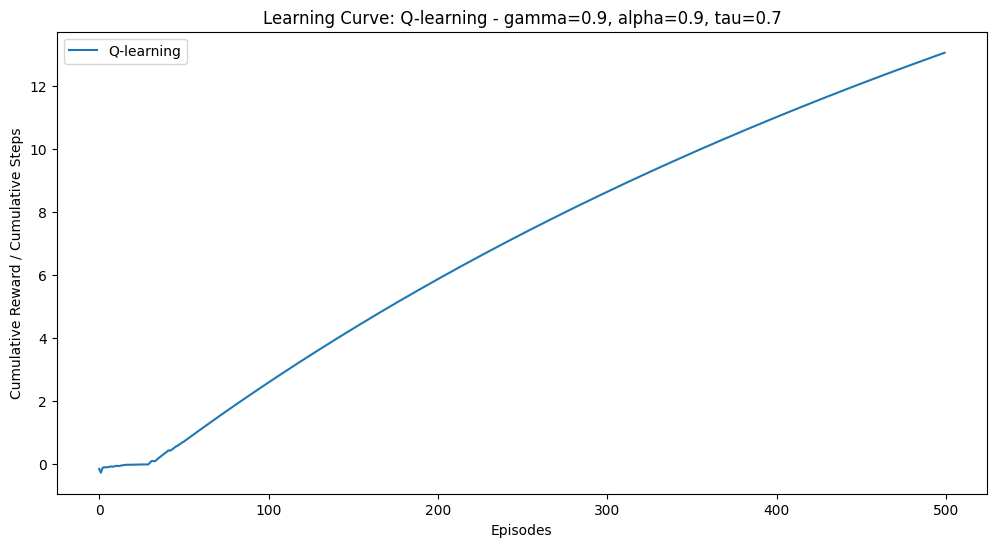

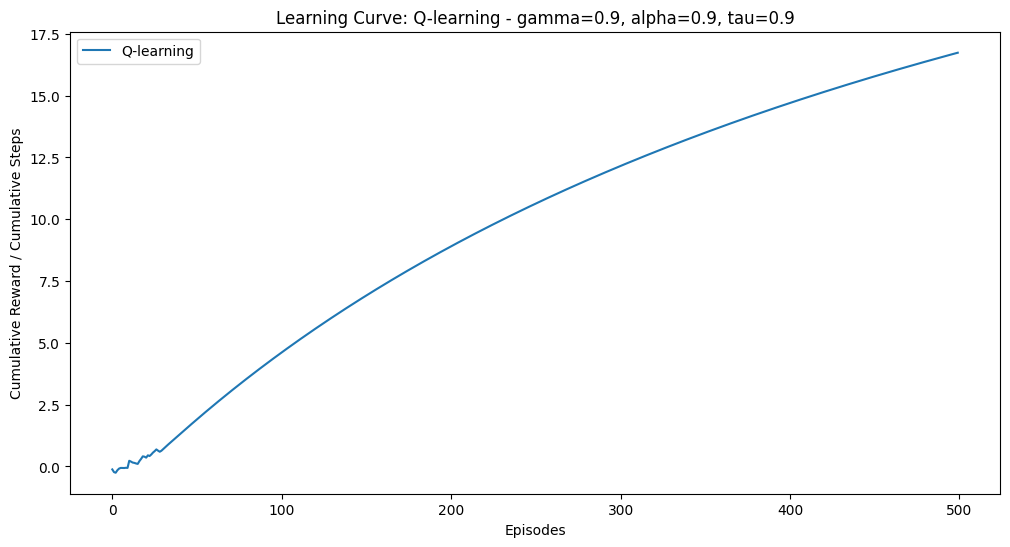

Average rewards for Q-Learning: 480.68
Time to converge for Q-Learning: 476 episodes
Stability for Q-Learning: 0.0


In [129]:
# Tune hyperparameters for Q-learning
best_params_q, performances_q = tune_hyperparameters(Q_agent, env1, n_episodes, gamma_values, alpha_values, tau_values)
print(f'Best parameters for Q-learning: gamma={best_params_q[0]}, alpha={best_params_q[1]}, tau={best_params_q[2]}')

# Plot learning curves for Q-learning
plot_learning_curves(performances_q, 'Q-learning')

q_agent = Q_agent()
policy_q, rewards_q, steps_q, episode_sequences_q = q_agent.solve(env1, n_episodes, *best_params_q)

# Average rewards
average_rewards_q = np.average(rewards_q)
print(f'Average rewards for Q-Learning: {average_rewards_q}')

# Time to converge
convergence_q = time_to_converge(rewards_q)
print(f'Time to converge for Q-Learning: {convergence_q} episodes')

# Stability
# Variance of the last 100 episodes
stability_q = np.var(rewards_q[-100:])
print(f'Stability for Q-Learning: {stability_q}')

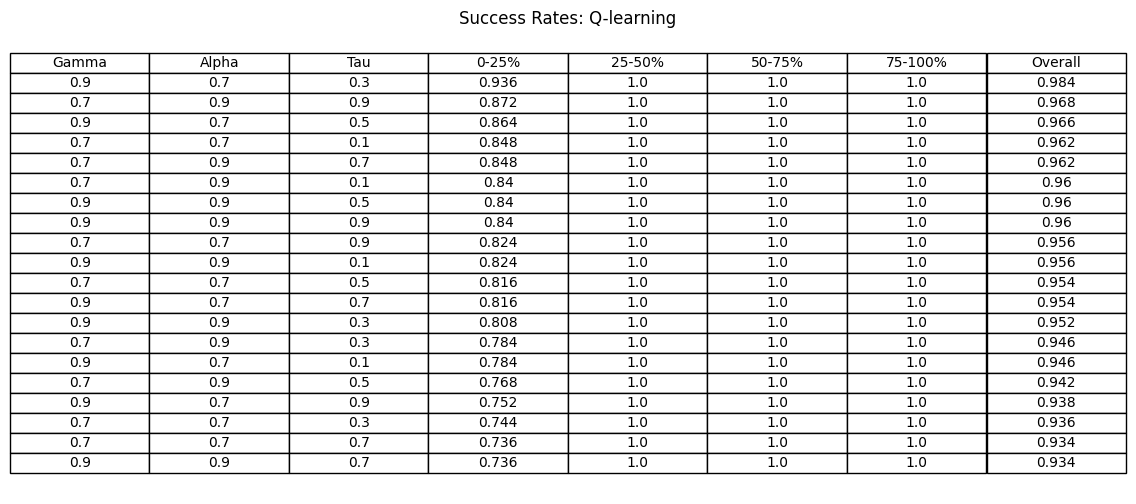

In [130]:
# Plot success rate tables for Q-learning
plot_success_table(performances_q, 'Q-learning')

## Q-Learning episode sequences

Q Episode 0


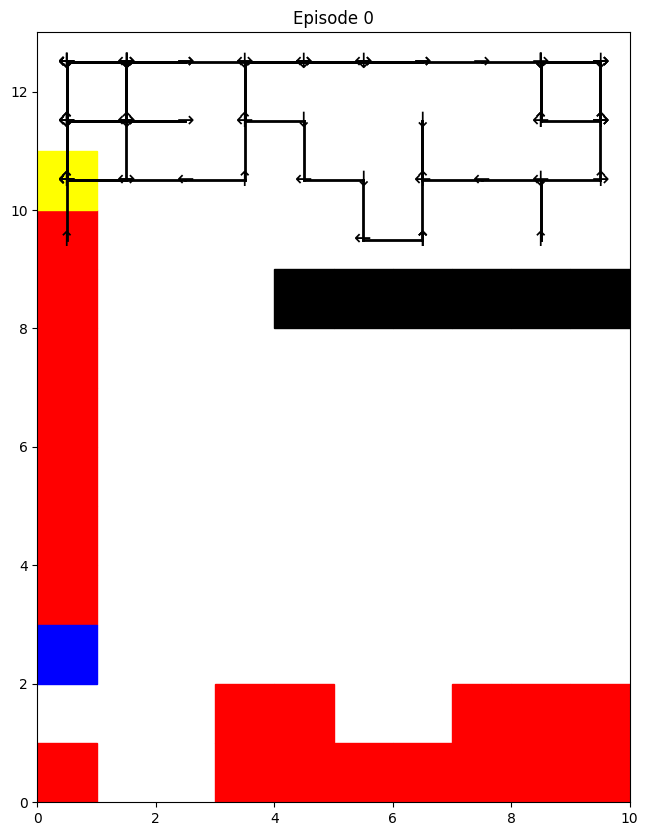

Q Episode 10


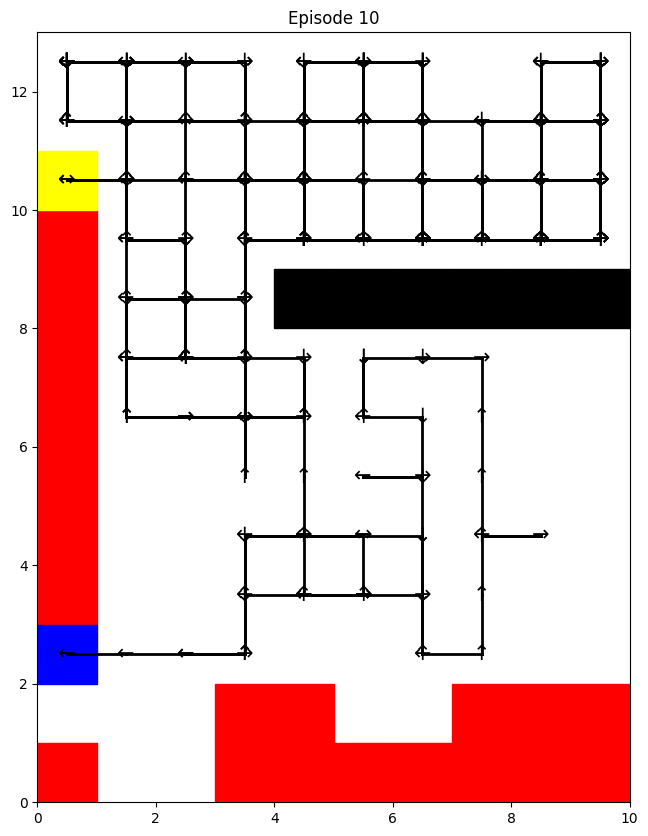

Q Episode 20


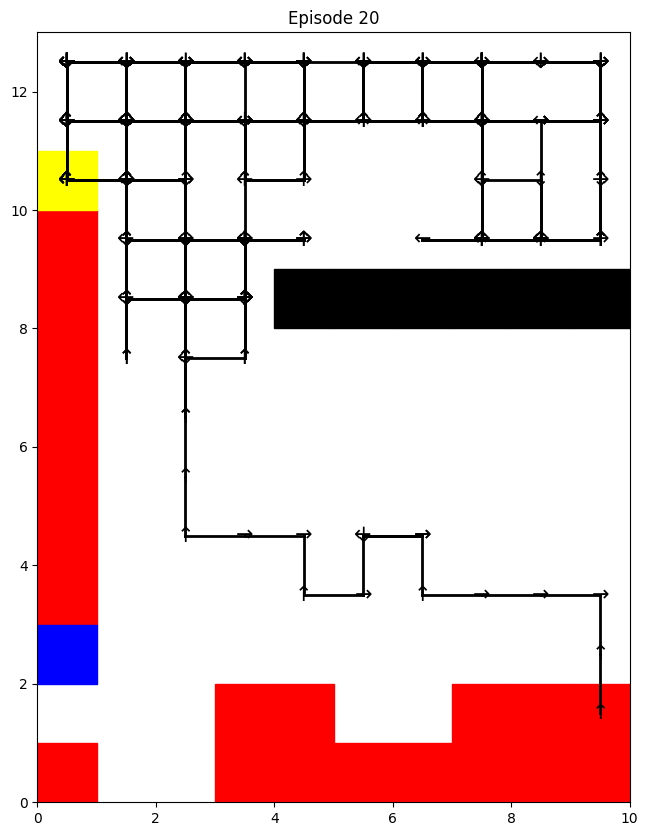

Q Episode 30


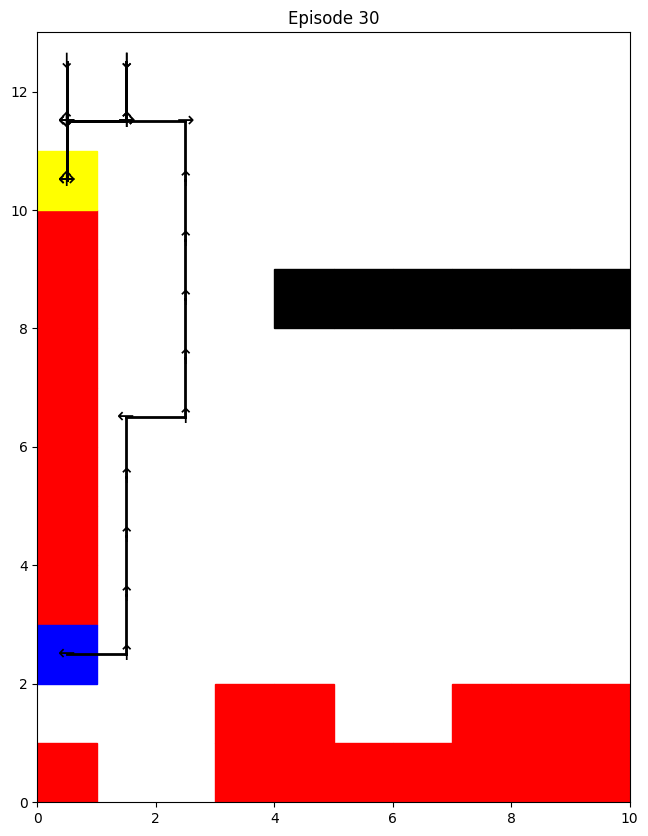

Q Episode 40


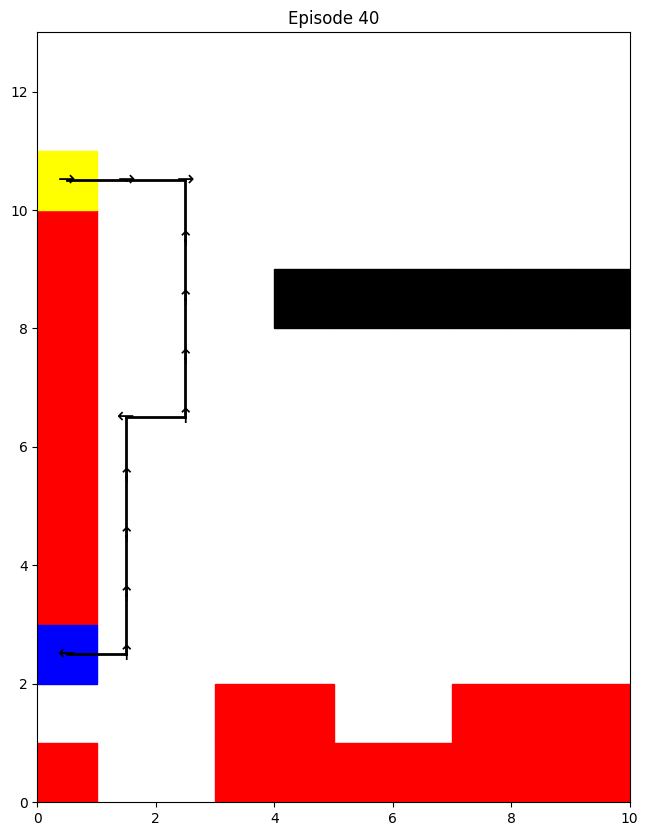

Q Episode 50


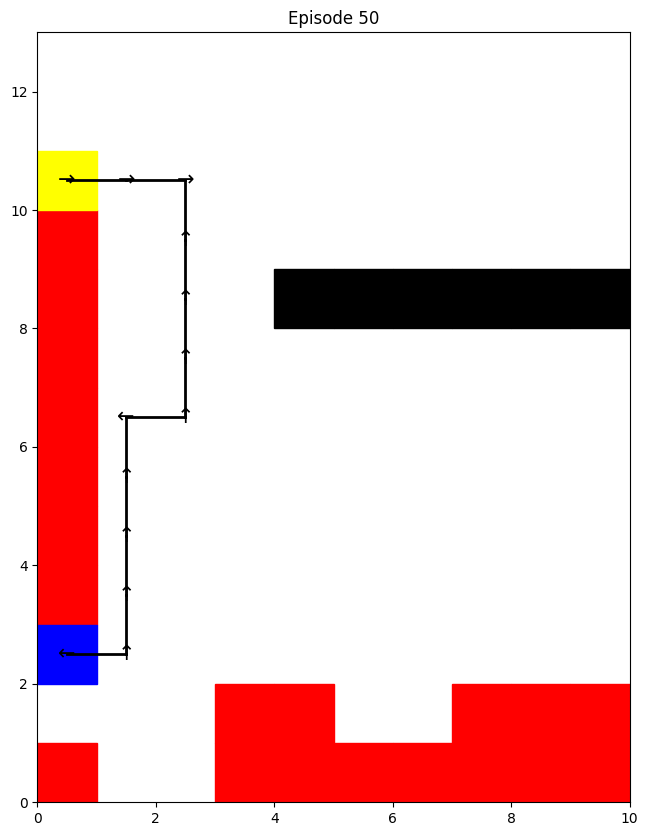

Q Episode 60


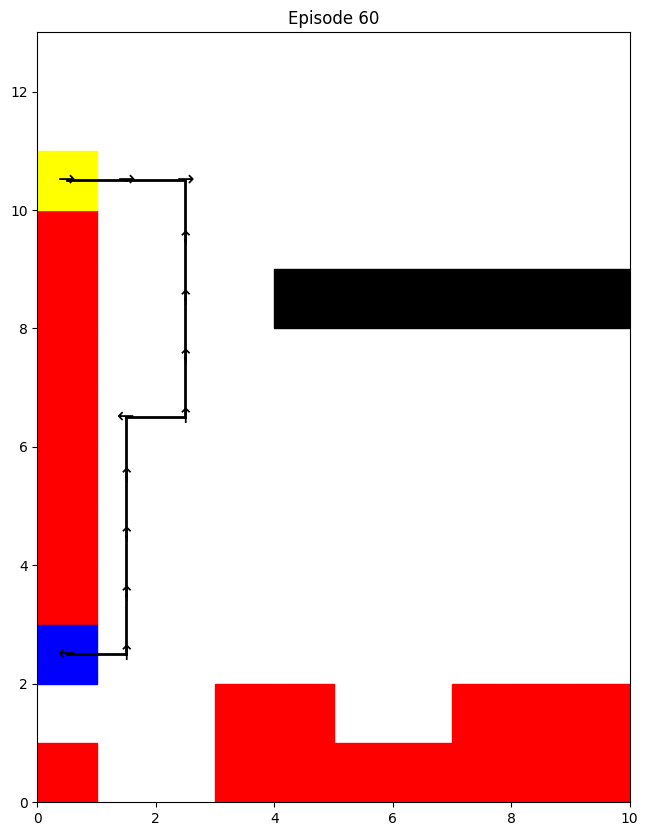

Q Episode 70


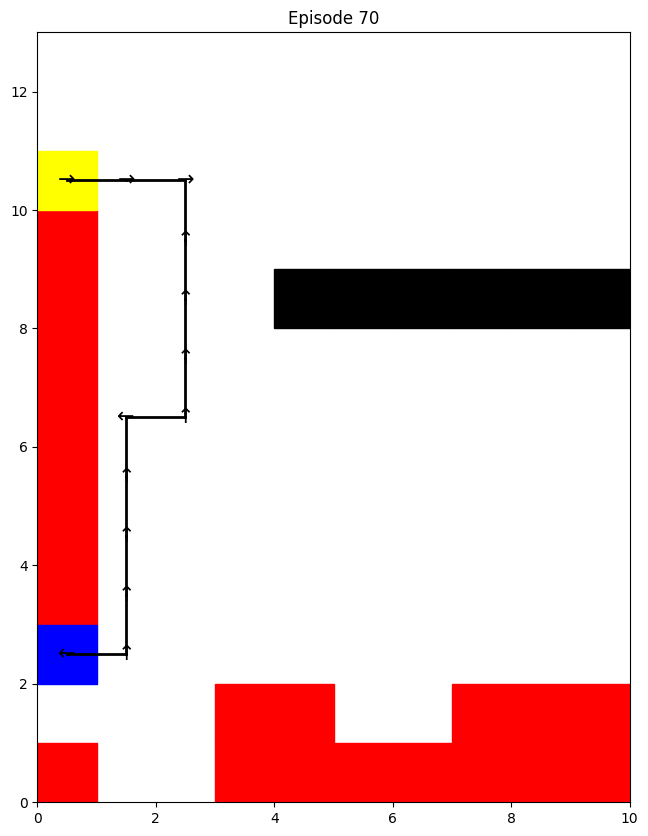

Q Episode 80


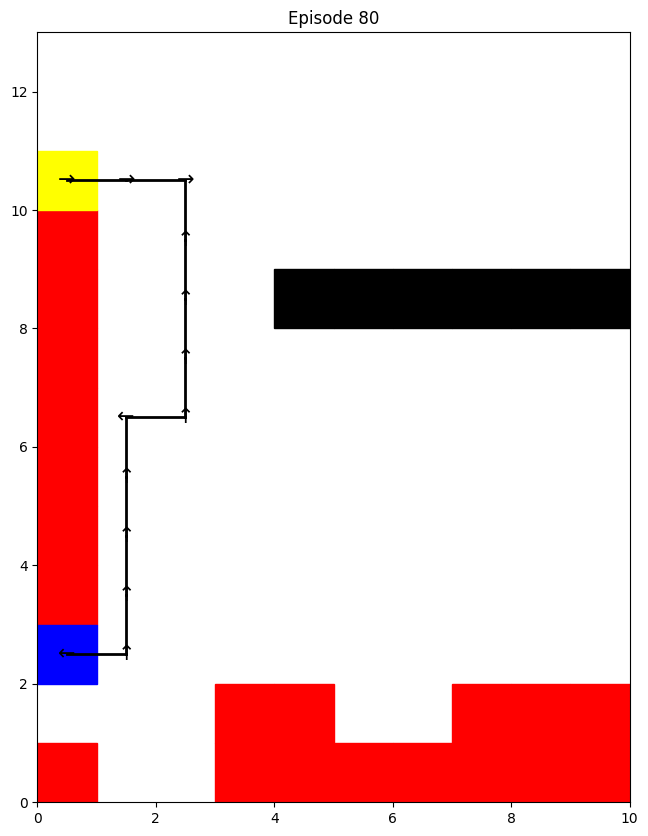

Q Episode 90


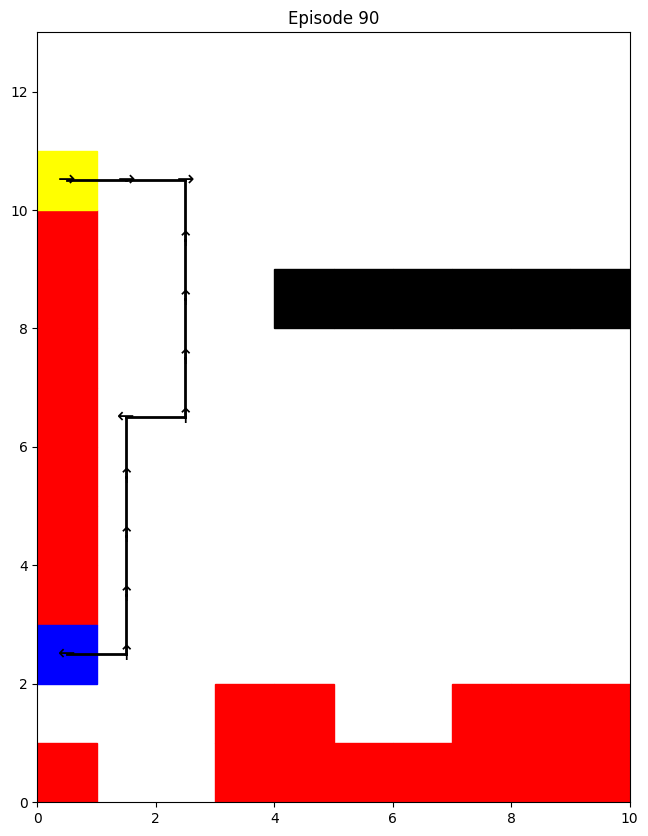

Q Episode 100


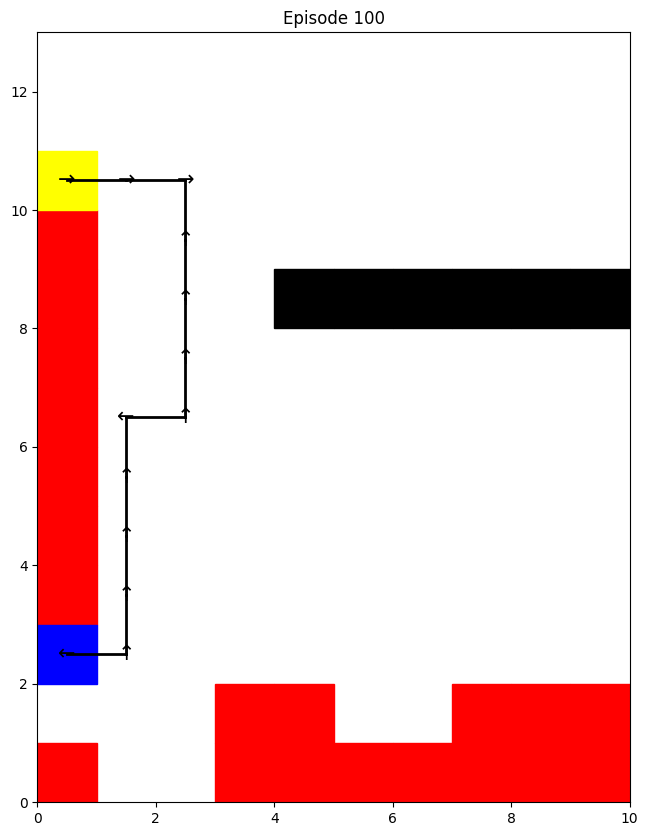

Q Episode 110


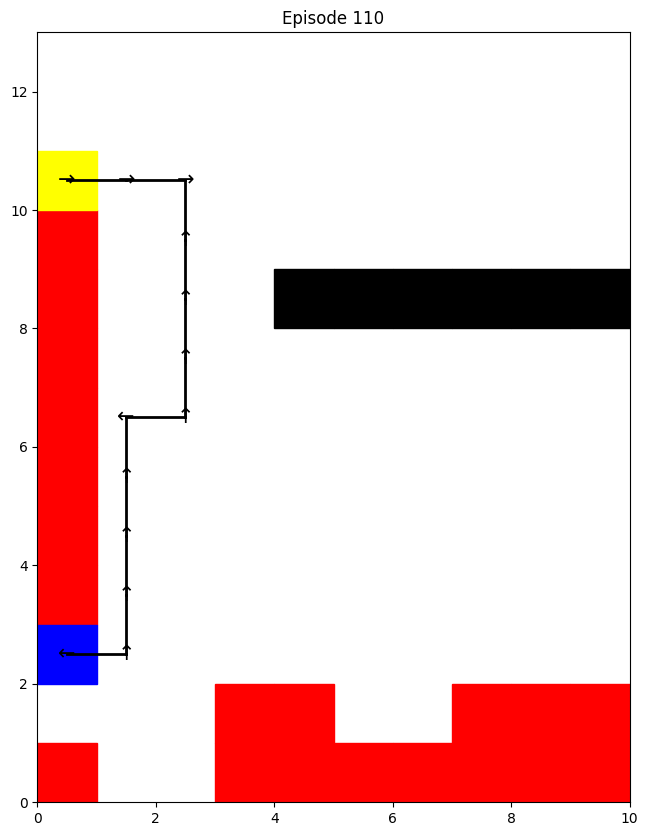

Q Episode 120


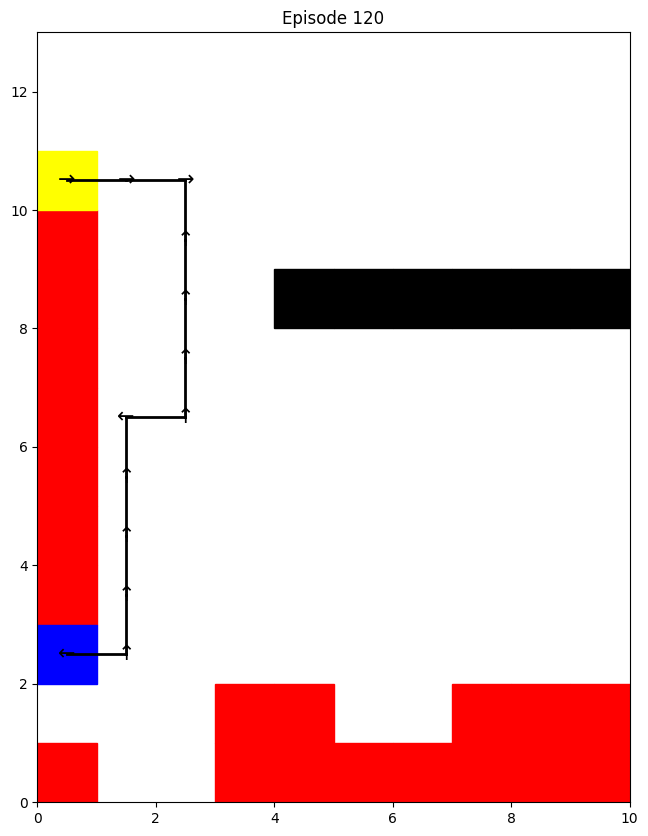

Q Episode 130


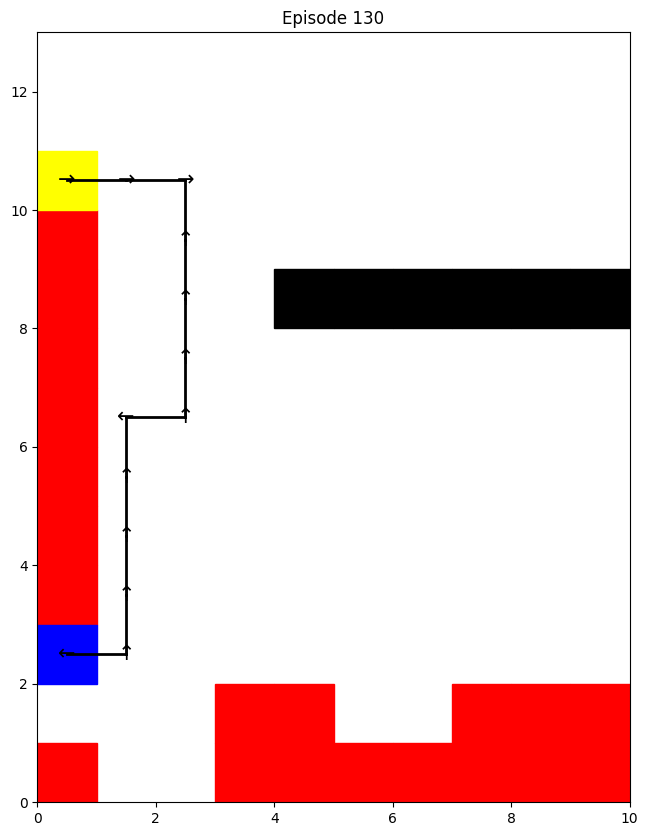

Q Episode 140


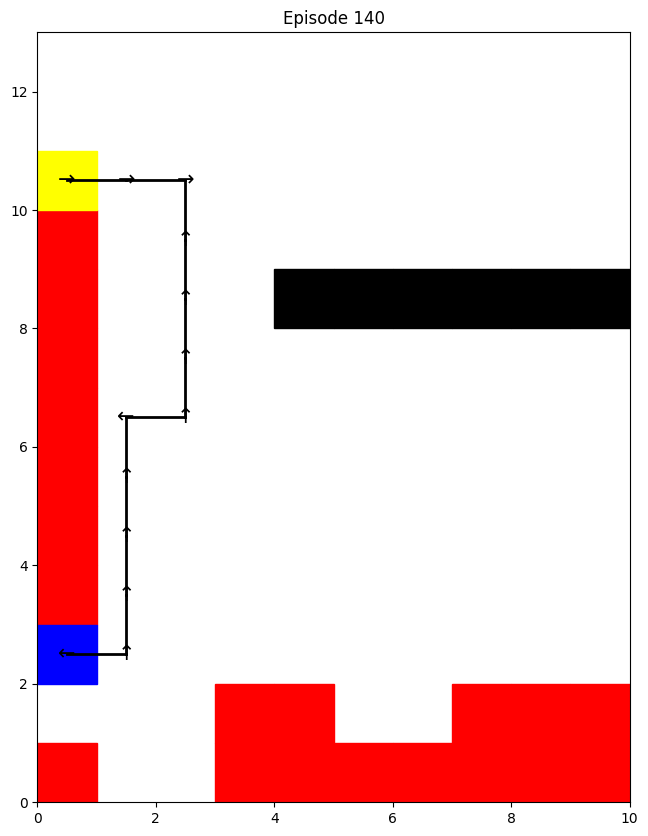

Q Episode 150


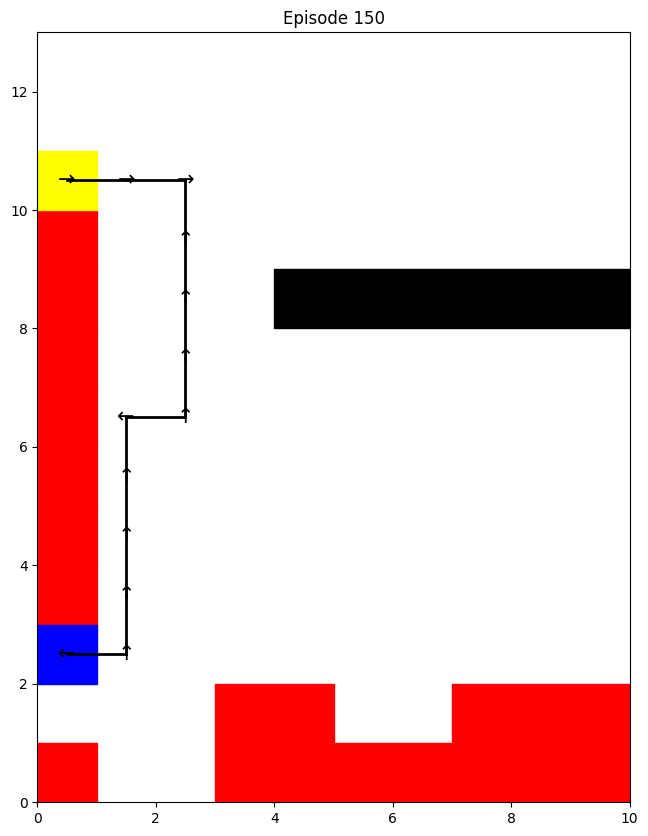

Q Episode 160


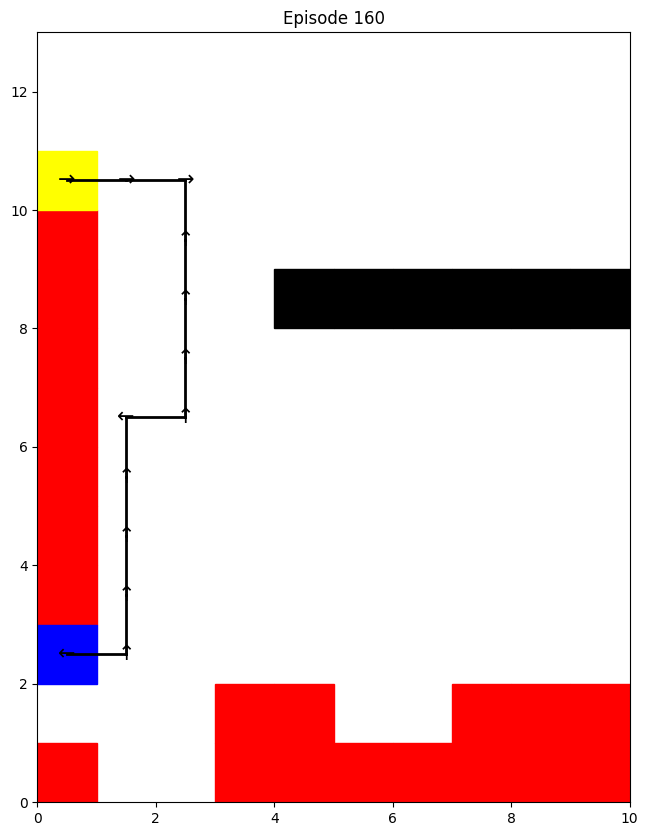

Q Episode 170


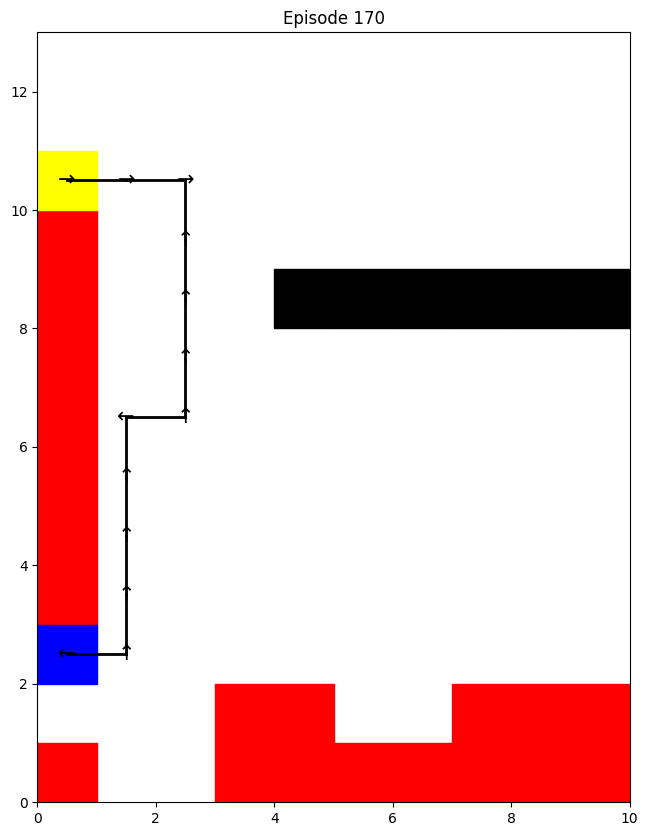

Q Episode 180


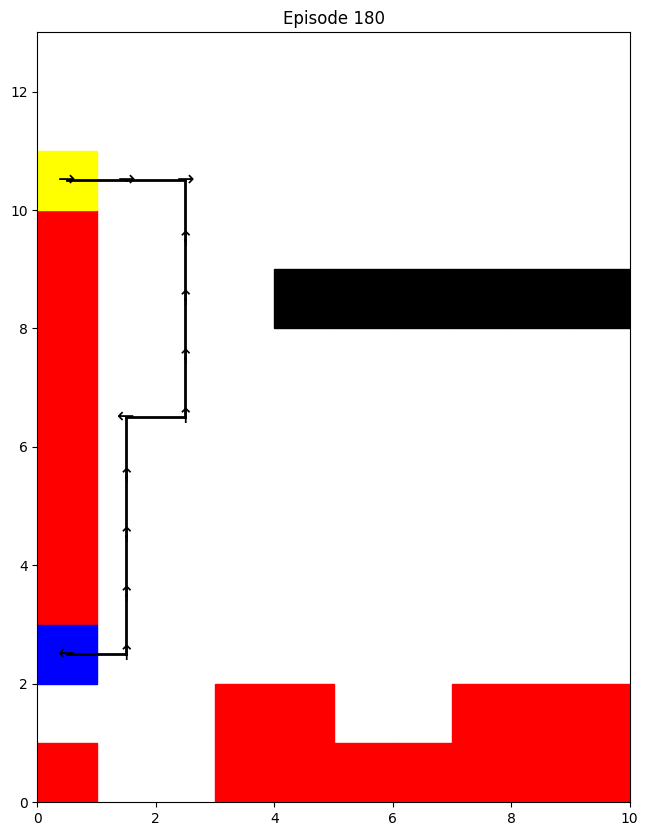

Q Episode 190


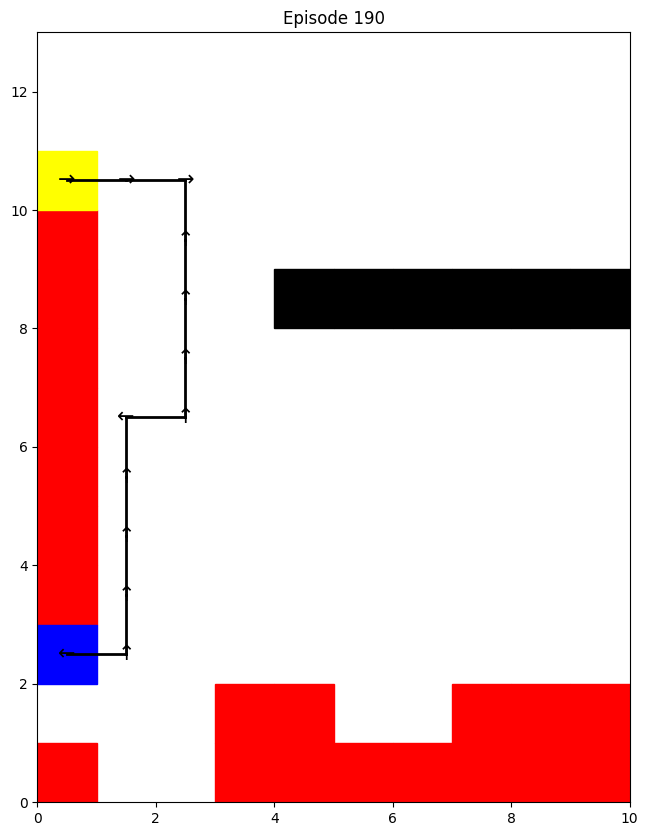

Q Episode 200


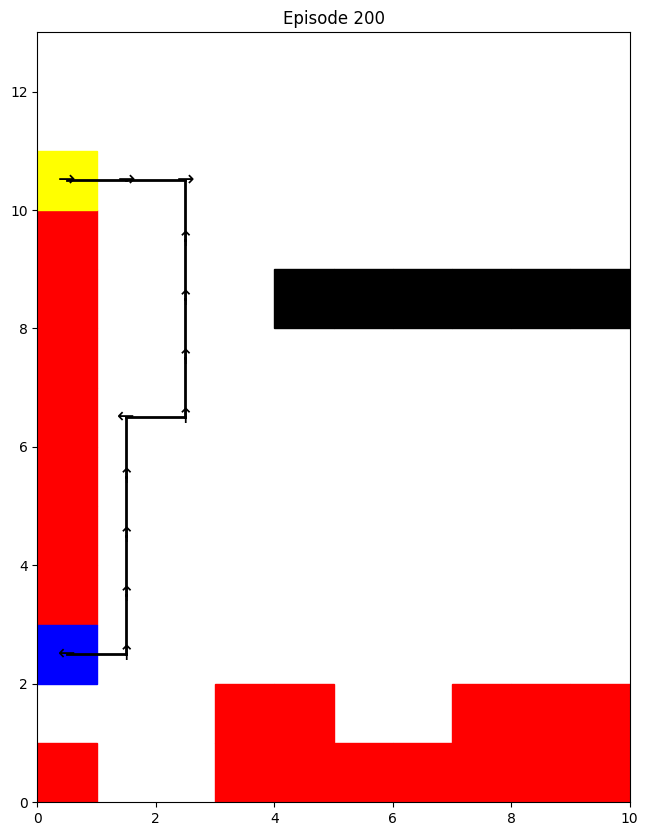

Q Episode 210


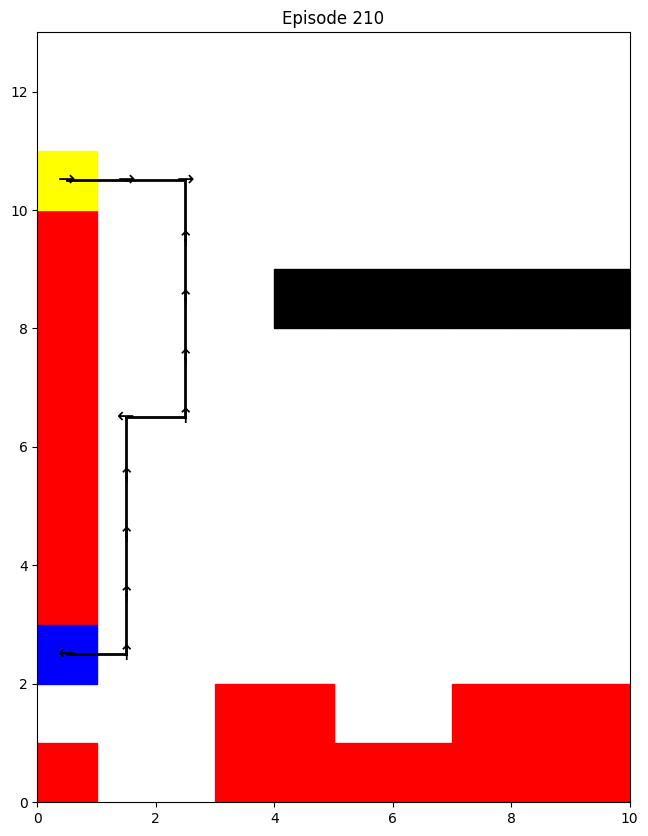

Q Episode 220


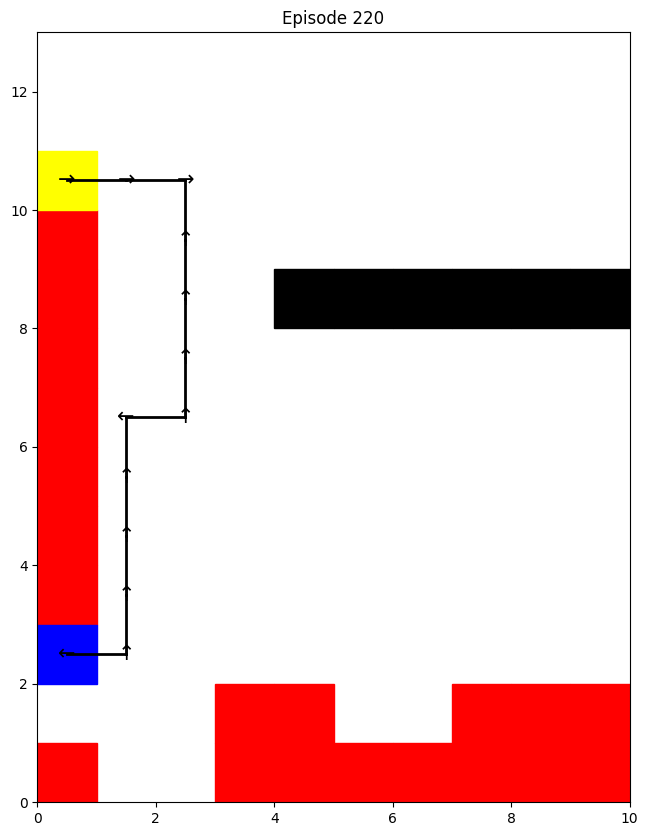

Q Episode 230


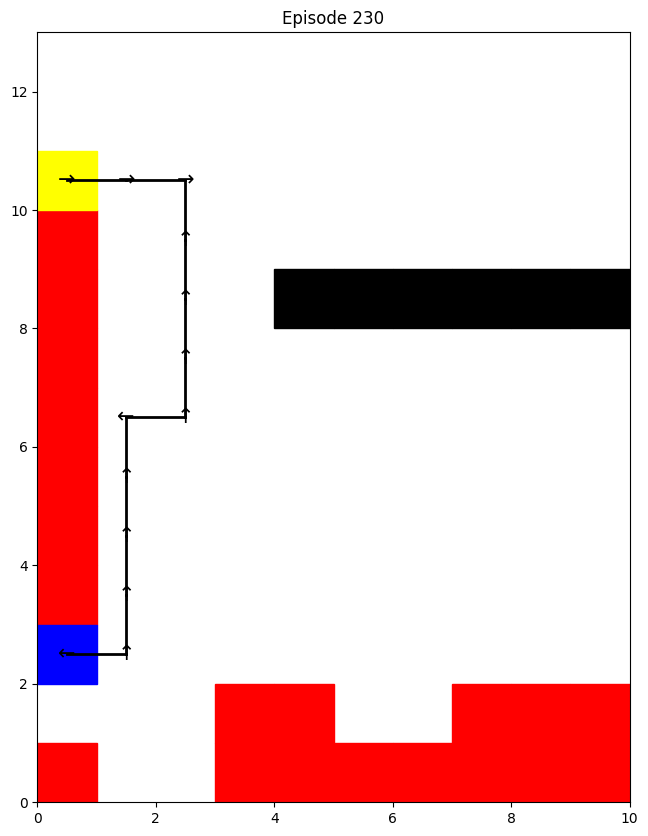

Q Episode 240


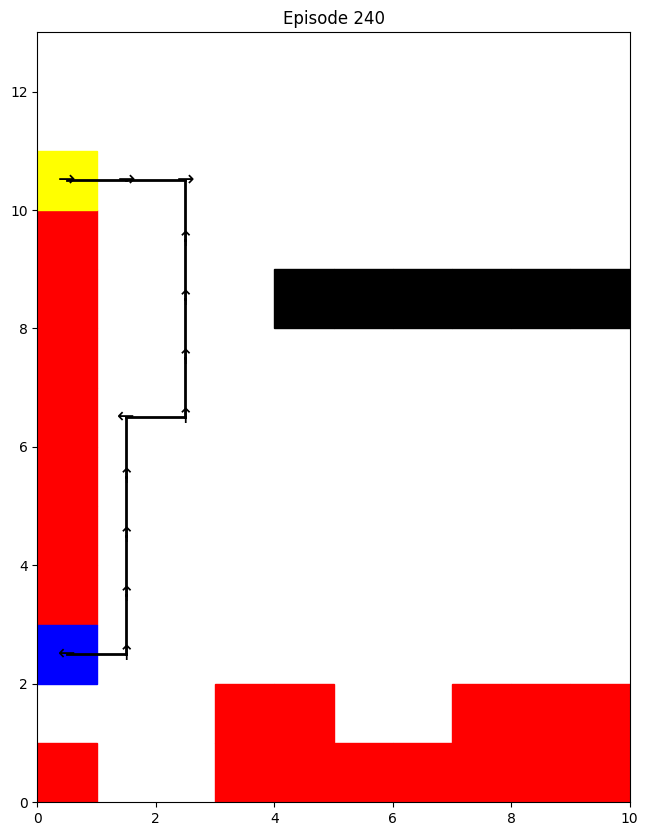

Q Episode 250


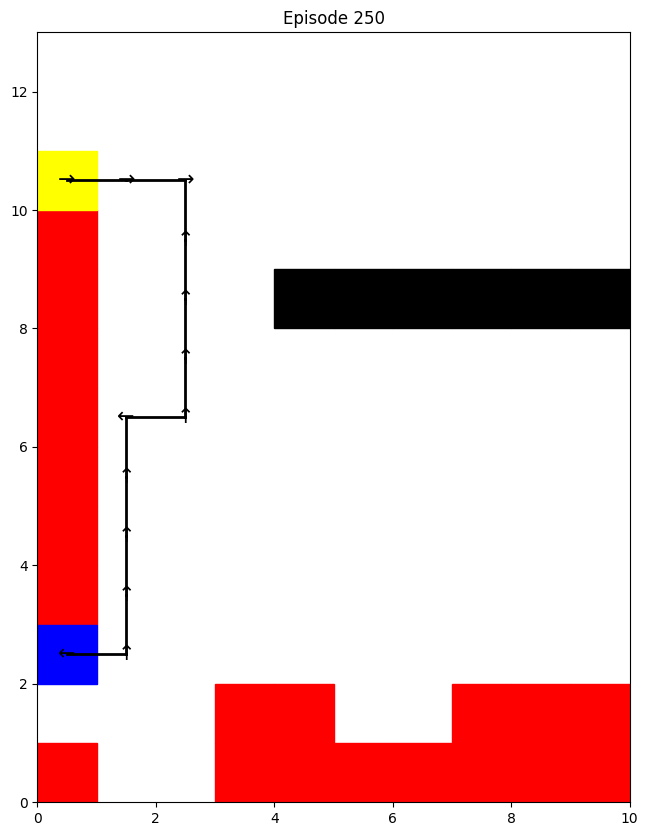

Q Episode 260


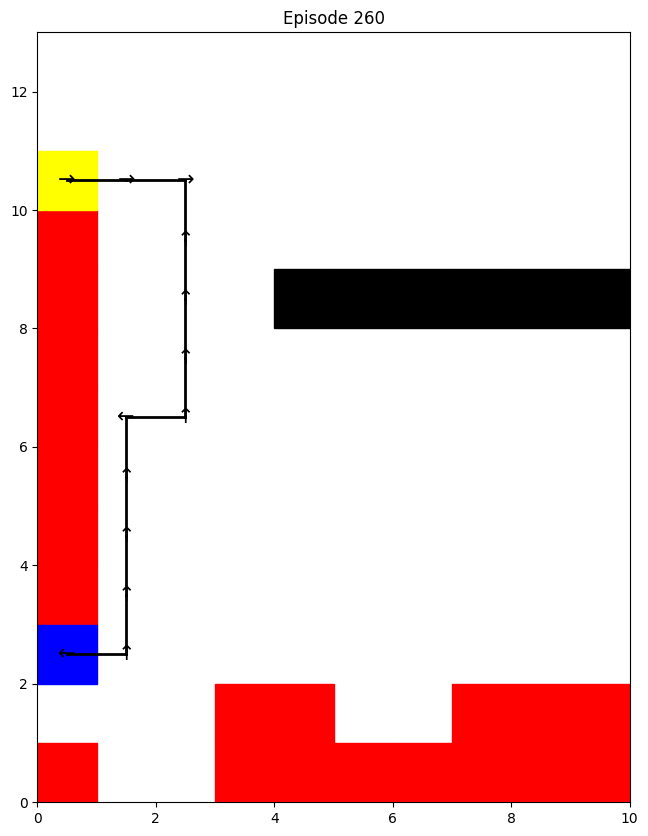

Q Episode 270


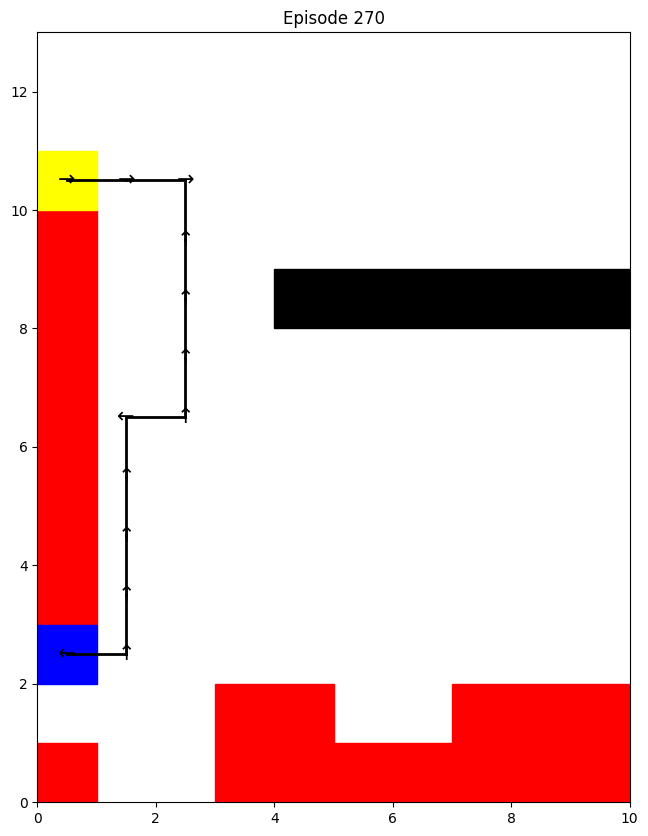

Q Episode 280


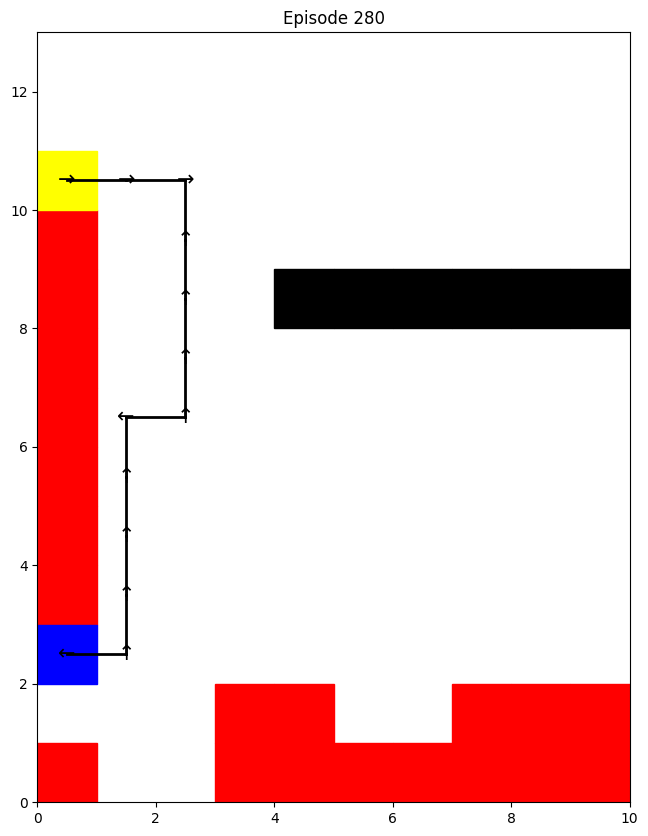

Q Episode 290


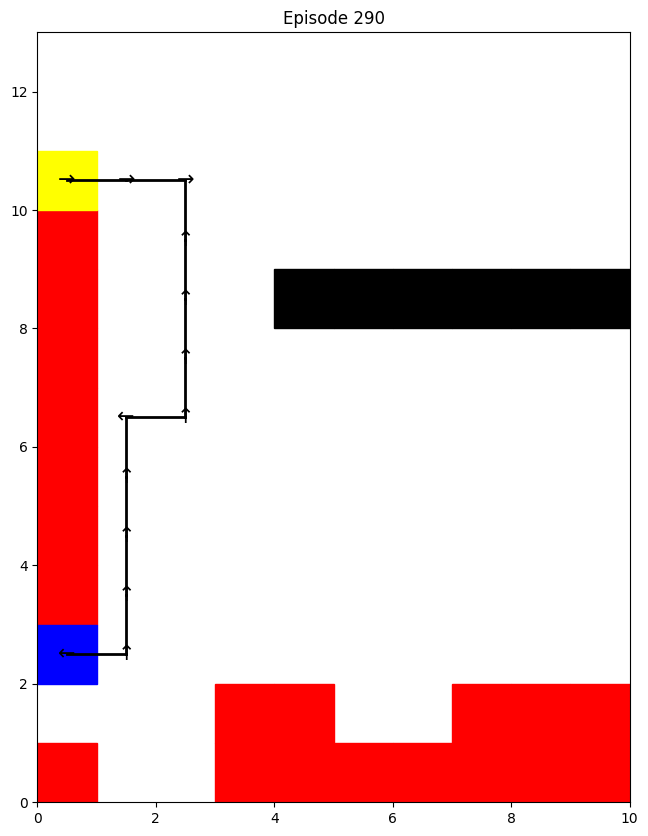

Q Episode 300


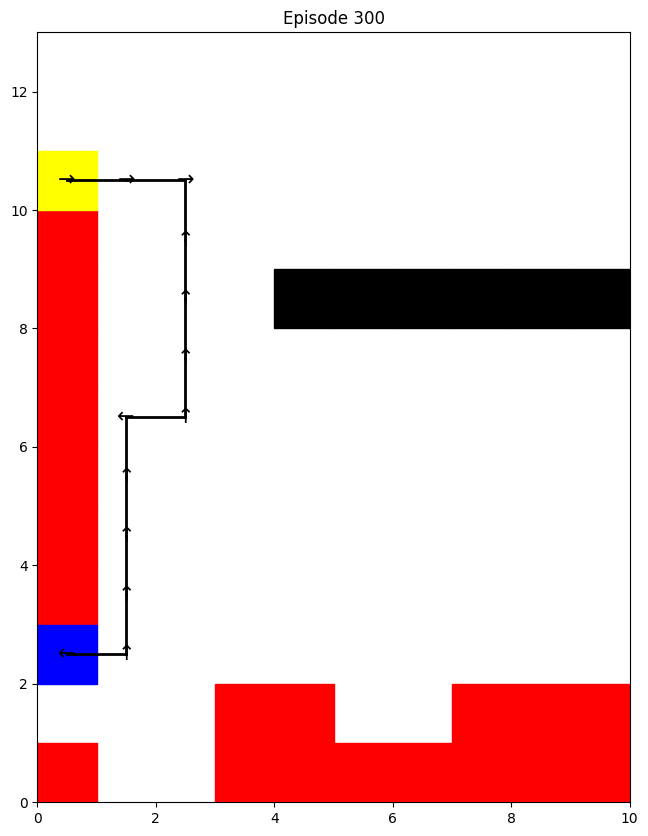

Q Episode 310


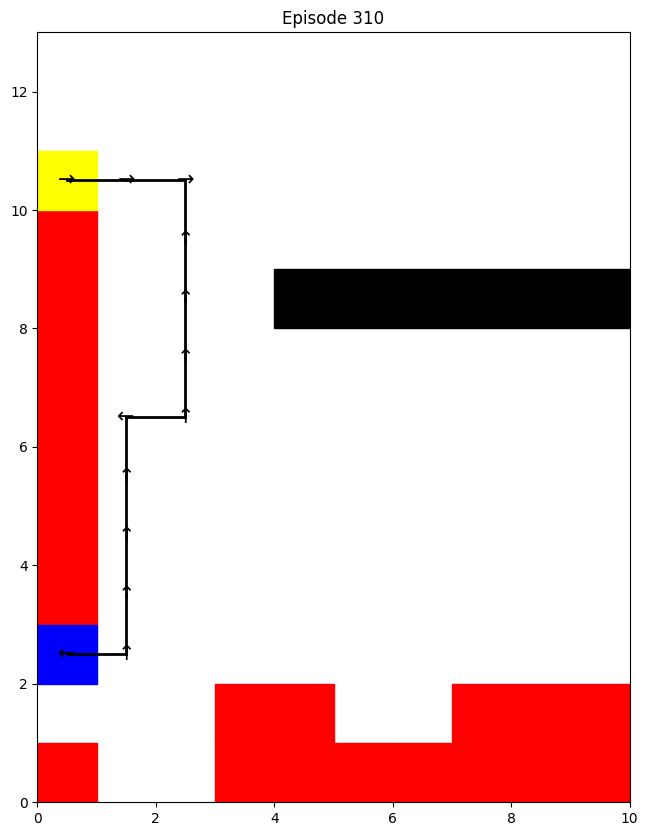

Q Episode 320


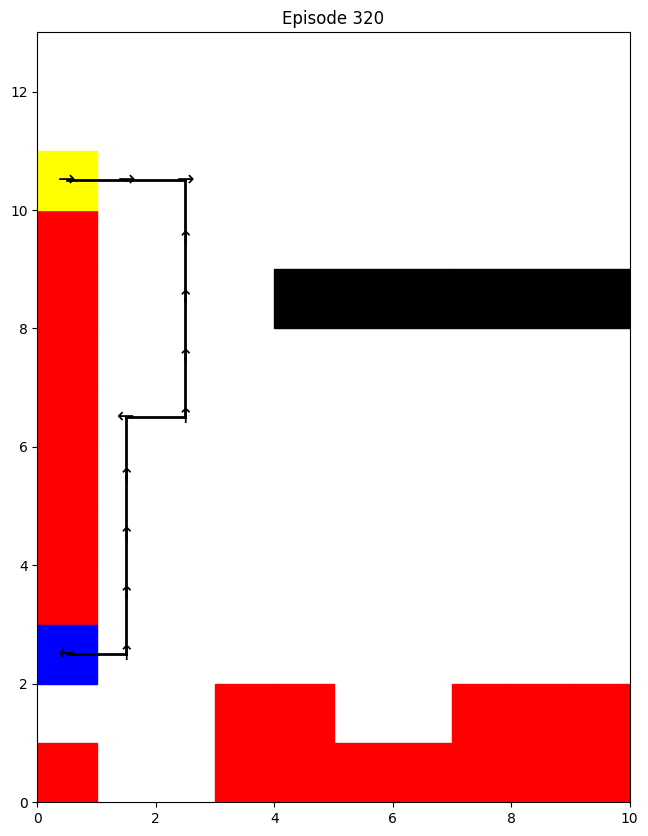

Q Episode 330


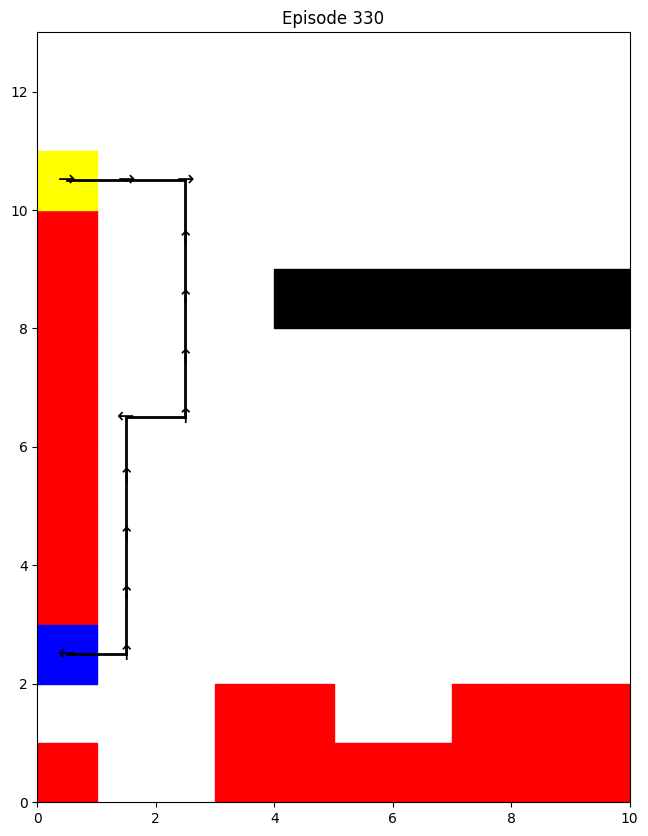

Q Episode 340


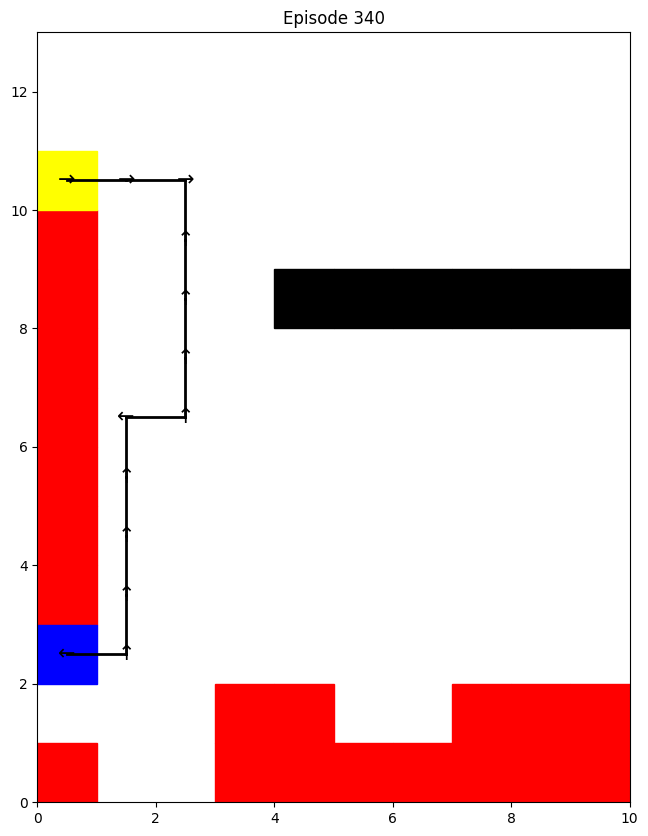

Q Episode 350


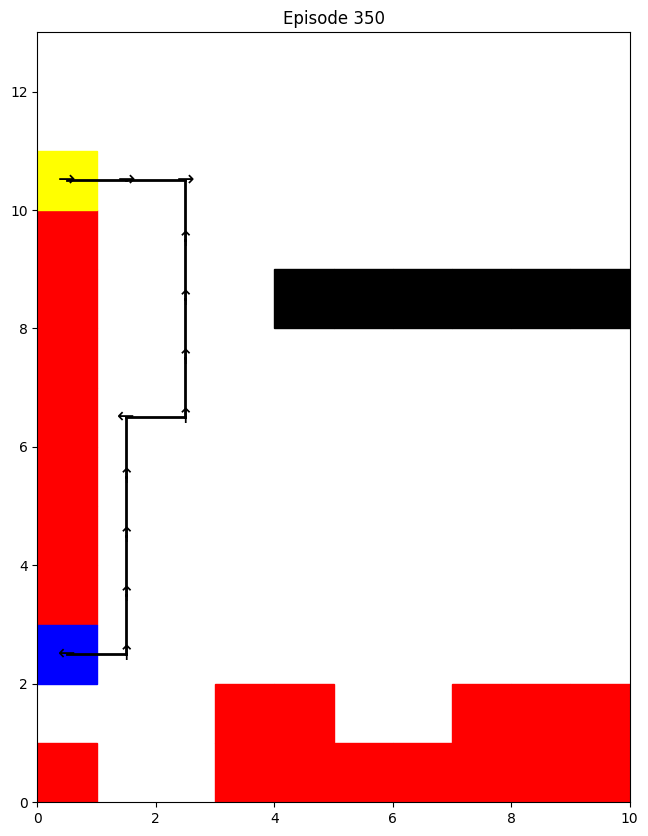

Q Episode 360


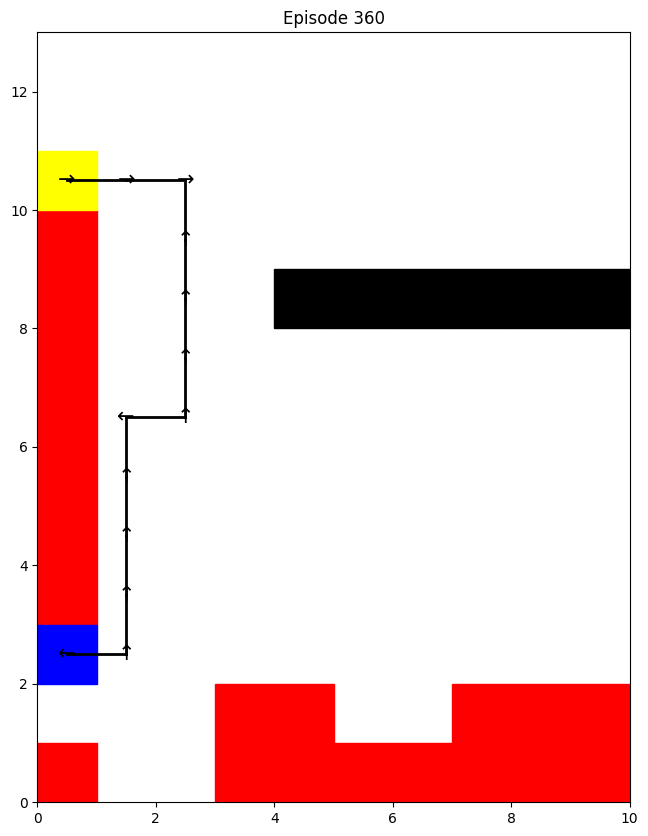

Q Episode 370


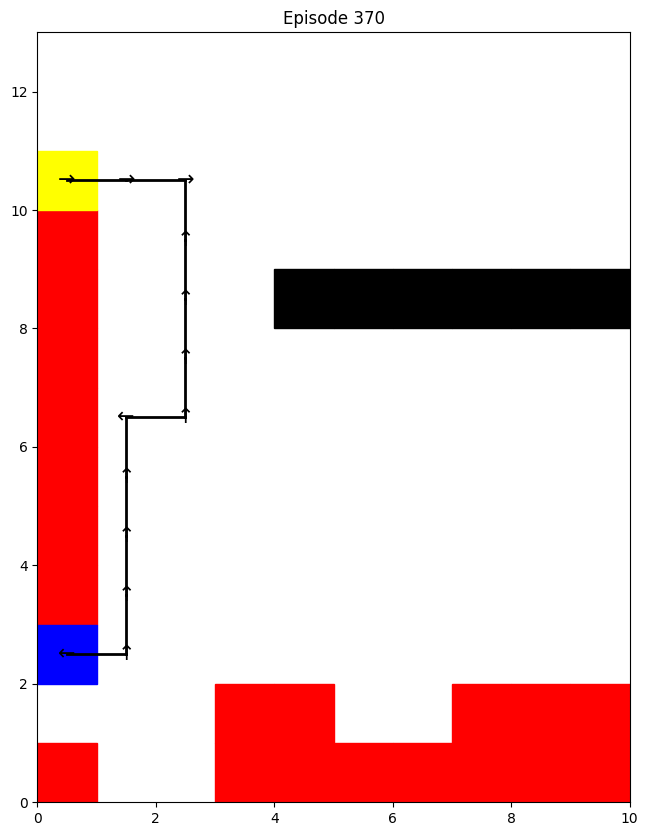

Q Episode 380


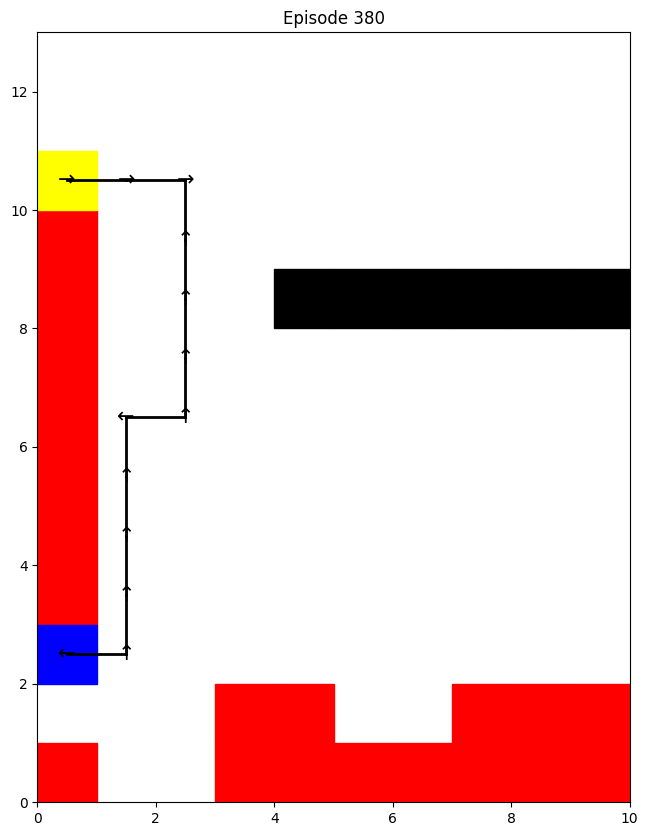

Q Episode 390


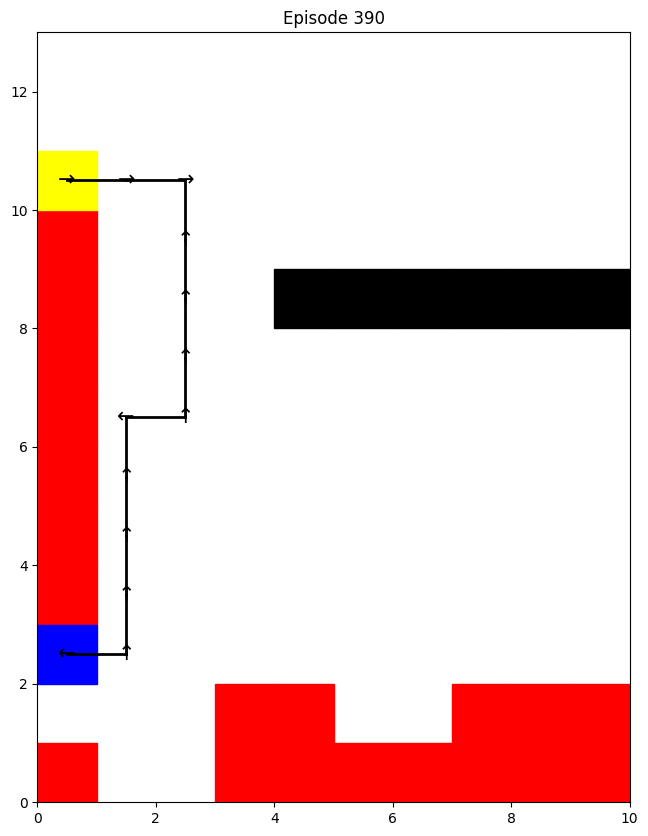

Q Episode 400


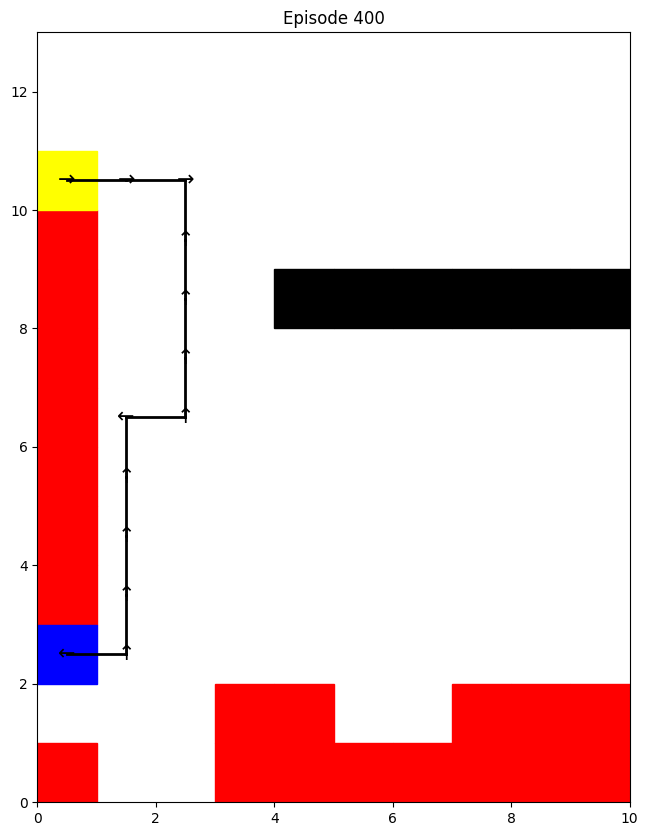

Q Episode 410


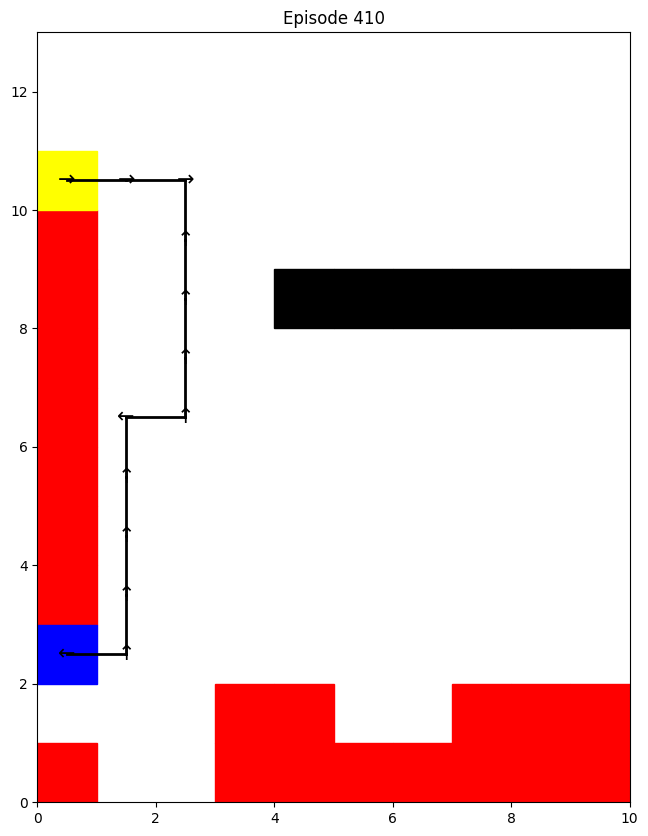

Q Episode 420


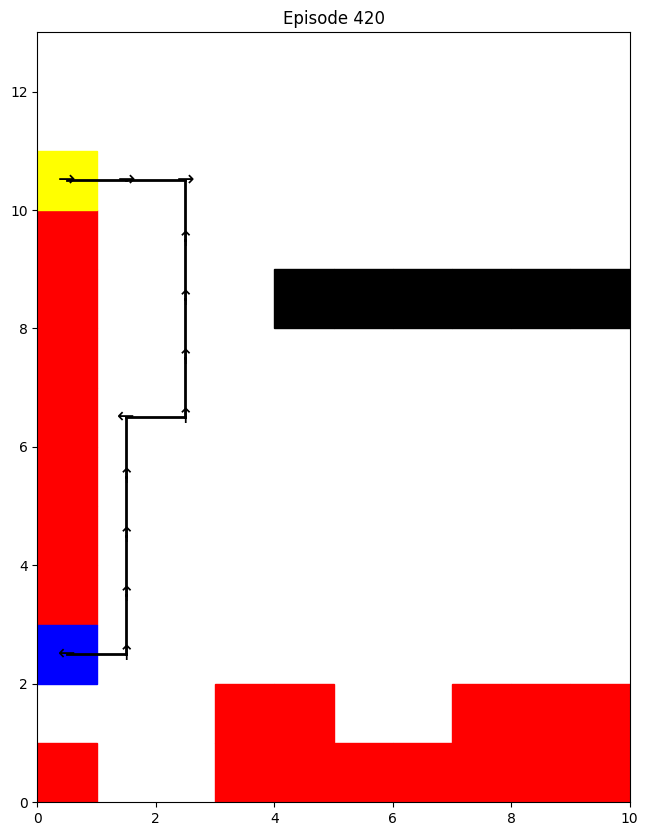

Q Episode 430


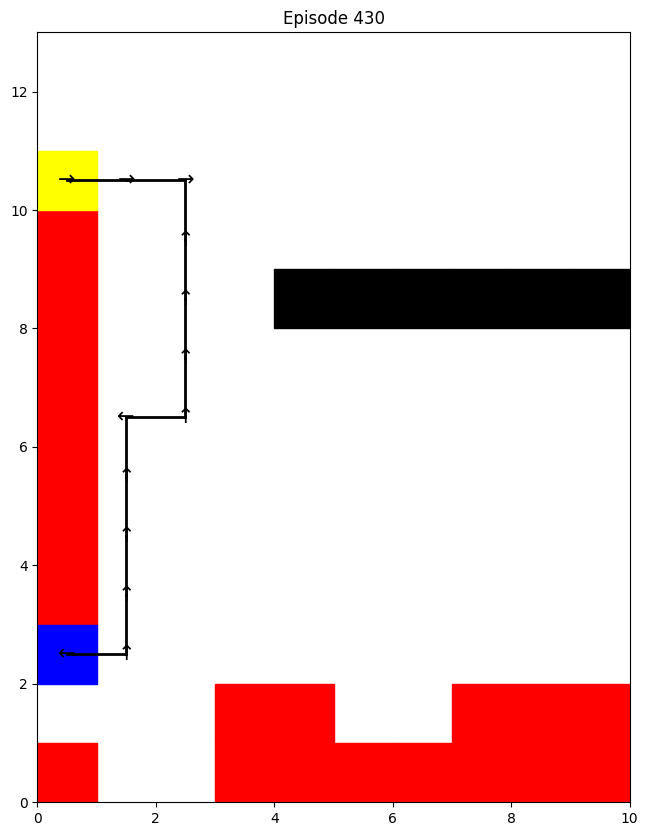

Q Episode 440


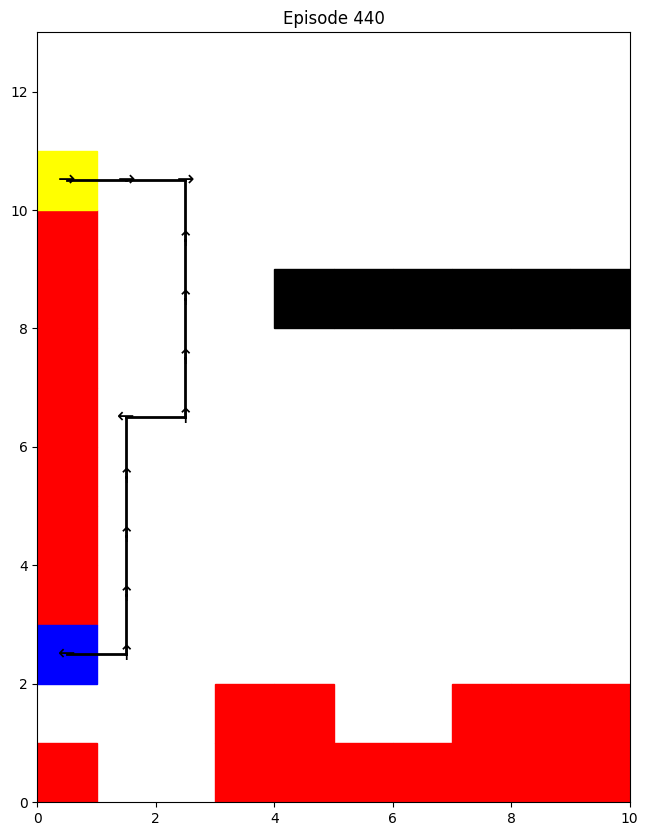

Q Episode 450


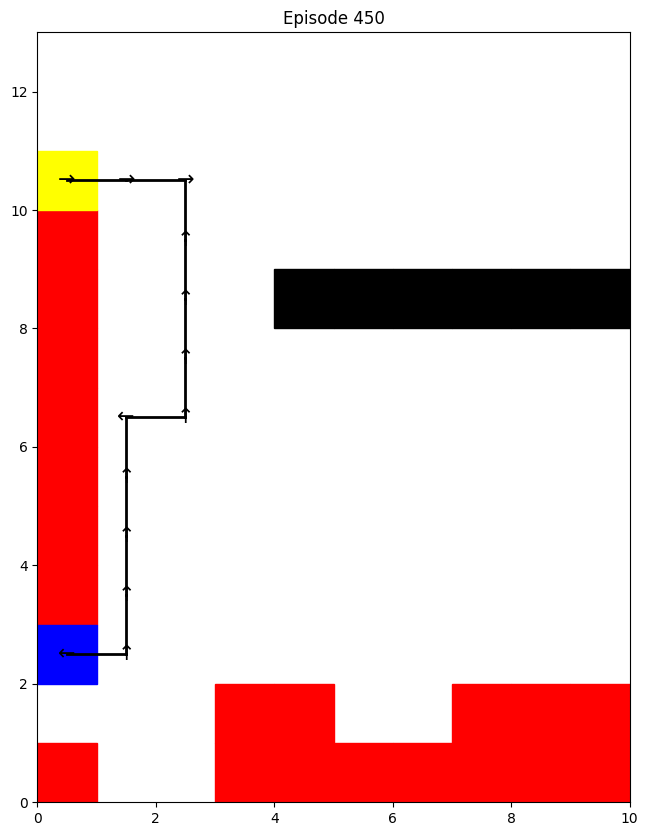

Q Episode 460


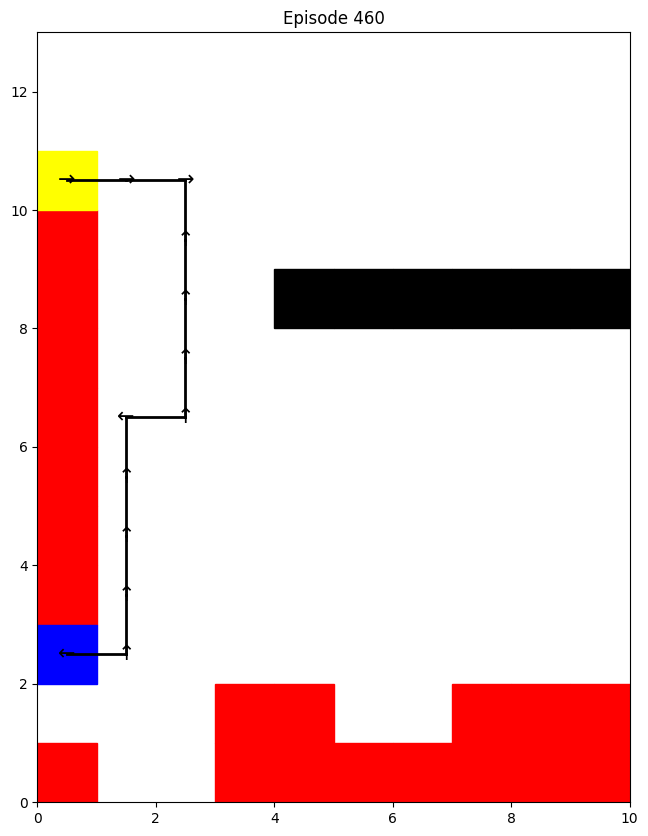

Q Episode 470


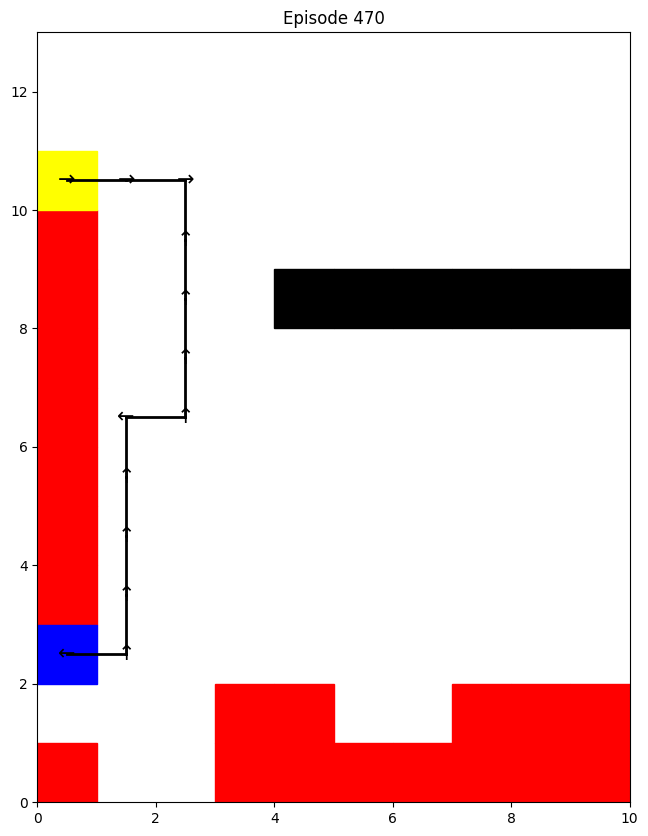

Q Episode 480


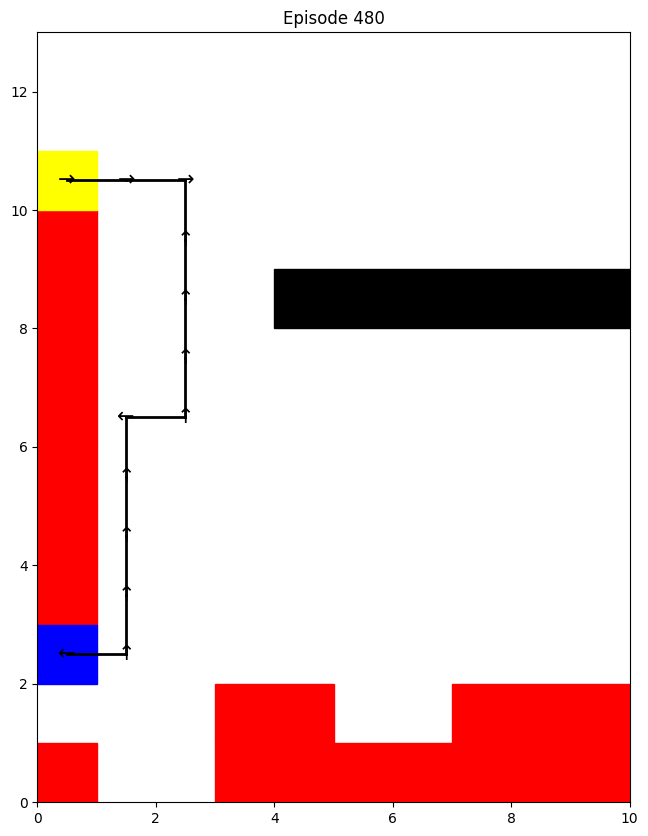

Q Episode 490


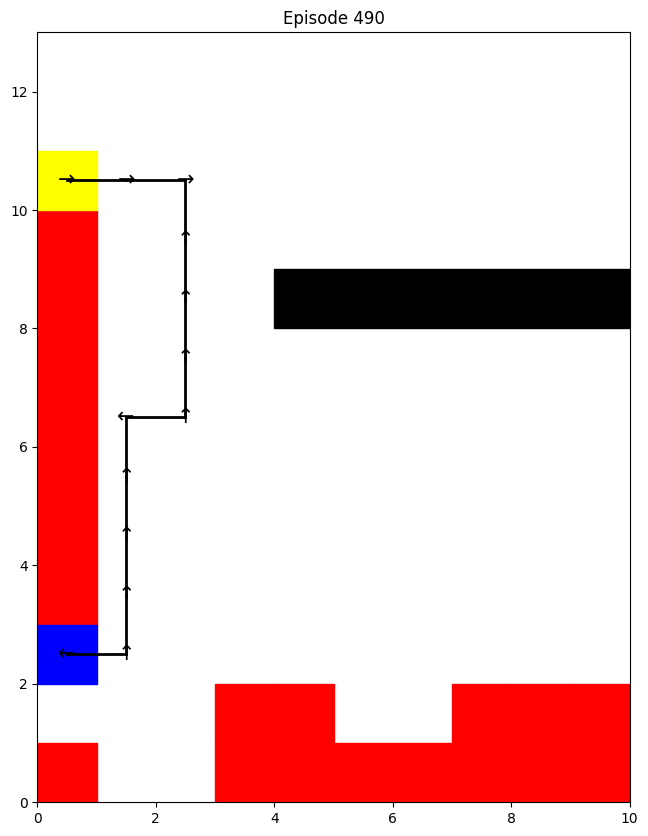

In [131]:
n = 0
while n < 50:
    print("Q Episode " + str(n * 10))
    plot_episode_sequence(env1, episode_sequences_q[n * 10], episode_num=(n * 10))
    n += 1

## Task 2 - Dual Targets with Stochastic Rewards

In [ ]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env2 = get_task2_gridworld()

In [ ]:
# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env2)

In [ ]:
# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env2)

In [ ]:
# Do your plots below! Include any new function definitions in this jupyter notebook!

## Task 3 - Stochastic Transitions and Rewards

In [ ]:
# This should be the definition of the gridworld for task 1. DO NOT CHANGE THIS
env3 = get_task3_gridworld()

In [ ]:
# Example of running SARSA
agent = SARSA_agent()
policy, total_rewards, total_steps = agent.solve(env3)

In [ ]:
# Example of running Q-Learning
agent = Q_agent()
policy, total_rewards, total_steps = agent.solve(env3)

In [ ]:
# Do your plots below! Include any new function definitions in this jupyter notebook!